## Credit Card Fraud Detection: Capstone Project (DA)

### Problem Statement
---
<pre>
The challenge in the banking sector is to effectively detect credit card fraud using machine learning methodologies.
This is not merely a trend but a crucial requirement for banks, as they strive to implement proactive monitoring systems and fraud prevention
mechanisms.
The utilization of machine learning enables these financial institutions to streamline the laborious process of manual reviews, mitigate costly
chargebacks and fees, and avoid the erroneous denial of legitimate transactions.
</pre>
---

### Business Goal
---
<pre>
Our main job is to create a fraud detection model that can find fake transactions by looking at how people have spent money in the past and conducting a cost-benefit analysis for business.
</pre>
---

### Objective
---
<pre>
Our primary objective is to leverage machine learning techniques to identify fraudulent transactions using historical customer transaction data across various merchants.
Our focus lies in comprehensively understanding transactional patterns and historical variables crucial for constructing an effective fraud detection model.

We aim to delve into the complexities of transactional data and explore methodologies for creating historical variables essential for refining our fraud detection model. Through a thorough analysis, we seek to clarify the significant business implications associated with fraudulent transactions. Furthermore, we try to offer strategic recommendations to the bank, proposing optimal measures to mitigate fraud risks effectively.
</pre>
---

### Data Dictionary
---
<pre>
Variables	Description

trans_date_trans_time	Transaction date and time
cc_num	                Credit card number
merchant                Merchant's name
category                Category of merchant
amt                     Amount of transaction
first	                First name
last	                Last name
gender	                Gender
street	                Street address
city	                City
state	                State
zip                     Zip code
lat                     Latitude location
long	                Longitude location
city_pop                City population
job                     Job
dob                     Date of birth
trans_num               Transaction number
unix_time               UNIX time of transaction
merch_lat               Merchant's latitude location
merch_long              Merchant's longitude location
is_fraud                Fraud flag - 0 : non-fraudulent, 1 : fraudulent
</pre>
---

### Step 1: Import required Python libraries and suppress warnings

In [1]:
# Importing required libraries and warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

from math import radians, sin, cos, sqrt, atan2

from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import recall_score, roc_auc_score, accuracy_score, confusion_matrix, classification_report, f1_score, precision_score,roc_curve,auc
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc

### Step 2: Reading and Understanding the Data

In [2]:
# Loading the fraudTrain csv file into a DataFrame

fraud_train = pd.read_csv('fraudTrain.csv')

# Displaying fiest few rows of DataFrame

fraud_train.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street            city state    zip  \
0    Banks      F                561 Perry Cove  Moravian Falls    NC  28654   
1     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160   
2  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252   
3    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632   
4   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433   

       lat      long  city_pop                                job         dob  \
0  36.0788  -81.1781      3495          Psychologist, counselling  1988-03-09   
1  48.8878 -118.2105       149  Special educational needs teacher  1978-06-21   
2  42.1808 -112.2620      4154        Nature conservation officer  1962-01-19   
3  46.2306 -112.1138      1939                    Patent attorney  1967-01-12   
4  38.4207  -79.4629        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [3]:
# Displaying summary information about the fraud_train DataFrame

fraud_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
# Generating descriptive statistics of the fraud_data DataFrame's numerical columns

fraud_train.describe(include='all')

Unnamed: 0 trans_date_trans_time        cc_num           merchant  \
count   1.296675e+06               1296675  1.296675e+06            1296675   
unique           NaN               1274791           NaN                693   
top              NaN   2019-04-22 16:02:01           NaN  fraud_Kilback LLC   
freq             NaN                     4           NaN               4403   
mean    6.483370e+05                   NaN  4.171920e+17                NaN   
std     3.743180e+05                   NaN  1.308806e+18                NaN   
min     0.000000e+00                   NaN  6.041621e+10                NaN   
25%     3.241685e+05                   NaN  1.800429e+14                NaN   
50%     6.483370e+05                   NaN  3.521417e+15                NaN   
75%     9.725055e+05                   NaN  4.642255e+15                NaN   
max     1.296674e+06                   NaN  4.992346e+18                NaN   

             category           amt        first     last   gender  \
count         1296675  1.296675e+06      1296675  1296675  1296675   
unique             14           NaN          352      481        2   
top     gas_transport           NaN  Christopher    Smith        F   
freq           131659           NaN        26669    28794   709863   
mean              NaN  7.035104e+01          NaN      NaN      NaN   
std               NaN  1.603160e+02          NaN      NaN      NaN   
min               NaN  1.000000e+00          NaN      NaN      NaN   
25%               NaN  9.650000e+00          NaN      NaN      NaN   
50%               NaN  4.752000e+01          NaN      NaN      NaN   
75%               NaN  8.314000e+01          NaN      NaN      NaN   
max               NaN  2.894890e+04          NaN      NaN      NaN   

                            street        city    state           zip  \
count                      1296675     1296675  1296675  1.296675e+06   
unique                         983         894       51           NaN   
top     0069 Robin Brooks Apt. 695  Birmingham       TX           NaN   
freq                          3123        5617    94876           NaN   
mean                           NaN         NaN      NaN  4.880067e+04   
std                            NaN         NaN      NaN  2.689322e+04   
min                            NaN         NaN      NaN  1.257000e+03   
25%                            NaN         NaN      NaN  2.623700e+04   
50%                            NaN         NaN      NaN  4.817400e+04   
75%                            NaN         NaN      NaN  7.204200e+04   
max                            NaN         NaN      NaN  9.978300e+04   

                 lat          long      city_pop                job  \
count   1.296675e+06  1.296675e+06  1.296675e+06            1296675   
unique           NaN           NaN           NaN                494   
top              NaN           NaN           NaN  Film/video editor   
freq             NaN           NaN           NaN               9779   
mean    3.853762e+01 -9.022634e+01  8.882444e+04                NaN   
std     5.075808e+00  1.375908e+01  3.019564e+05                NaN   
min     2.002710e+01 -1.656723e+02  2.300000e+01                NaN   
25%     3.462050e+01 -9.679800e+01  7.430000e+02                NaN   
50%     3.935430e+01 -8.747690e+01  2.456000e+03                NaN   
75%     4.194040e+01 -8.015800e+01  2.032800e+04                NaN   
max     6.669330e+01 -6.795030e+01  2.906700e+06                NaN   

               dob                         trans_num     unix_time  \
count      1296675                           1296675  1.296675e+06   
unique         968                           1296675           NaN   
top     1977-03-23  0b242abb623afc578575680df30655b9           NaN   
freq          5636                                 1           NaN   
mean           NaN                               NaN  1.349244e+09   
std            NaN                               NaN  1.284128e+07   


In [5]:
# Checking for duplicates and dropping them if any exis

fraud_train.drop_duplicates(inplace=True)

# Checking the dimensions of the dataset

fraud_train.shape

(1296675, 23)

In [6]:
# Loading the fraudTrain csv file into a DataFrame

fraud_test = pd.read_csv('fraudTest.csv')

# Displaying first few rows of DataFrame

fraud_test.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street        city state    zip  \
0   Elliott      M            351 Darlene Green    Columbia    SC  29209   
1  Williams      F             3638 Marsh Union     Altonah    UT  84002   
2     Lopez      F         9333 Valentine Point    Bellmore    NY  11710   
3  Williams      M  32941 Krystal Mill Apt. 552  Titusville    FL  32780   
4    Massey      M     5783 Evan Roads Apt. 465    Falmouth    MI  49632   

       lat      long  city_pop                     job         dob  \
0  33.9659  -80.9355    333497     Mechanical engineer  1968-03-19   
1  40.3207 -110.4360       302  Sales professional, IT  1990-01-17   
2  40.6729  -73.5365     34496       Librarian, public  1970-10-21   
3  28.5697  -80.8191     54767            Set designer  1987-07-25   
4  44.2529  -85.0170      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [7]:
# Displaying summary information about the fraud_data DataFrame, including data types and missing values

fraud_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [8]:
# Generating descriptive statistics of the fraud_data DataFrame's numerical columns

fraud_test.describe(include='all')

Unnamed: 0 trans_date_trans_time        cc_num           merchant  \
count   555719.000000                555719  5.557190e+05             555719   
unique            NaN                544760           NaN                693   
top               NaN   2020-12-19 16:02:22           NaN  fraud_Kilback LLC   
freq              NaN                     4           NaN               1859   
mean    277859.000000                   NaN  4.178387e+17                NaN   
std     160422.401459                   NaN  1.309837e+18                NaN   
min          0.000000                   NaN  6.041621e+10                NaN   
25%     138929.500000                   NaN  1.800429e+14                NaN   
50%     277859.000000                   NaN  3.521417e+15                NaN   
75%     416788.500000                   NaN  4.635331e+15                NaN   
max     555718.000000                   NaN  4.992346e+18                NaN   

             category            amt        first    last  gender  \
count          555719  555719.000000       555719  555719  555719   
unique             14            NaN          341     471       2   
top     gas_transport            NaN  Christopher   Smith       F   
freq            56370            NaN        11443   12146  304886   
mean              NaN      69.392810          NaN     NaN     NaN   
std               NaN     156.745941          NaN     NaN     NaN   
min               NaN       1.000000          NaN     NaN     NaN   
25%               NaN       9.630000          NaN     NaN     NaN   
50%               NaN      47.290000          NaN     NaN     NaN   
75%               NaN      83.010000          NaN     NaN     NaN   
max               NaN   22768.110000          NaN     NaN     NaN   

                 street        city   state            zip            lat  \
count            555719      555719  555719  555719.000000  555719.000000   
unique              924         849      50            NaN            NaN   
top     444 Robert Mews  Birmingham      TX            NaN            NaN   
freq               1474        2423   40393            NaN            NaN   
mean                NaN         NaN     NaN   48842.628015      38.543253   
std                 NaN         NaN     NaN   26855.283328       5.061336   
min                 NaN         NaN     NaN    1257.000000      20.027100   
25%                 NaN         NaN     NaN   26292.000000      34.668900   
50%                 NaN         NaN     NaN   48174.000000      39.371600   
75%                 NaN         NaN     NaN   72011.000000      41.894800   
max                 NaN         NaN     NaN   99921.000000      65.689900   

                 long      city_pop                job         dob  \
count   555719.000000  5.557190e+05             555719      555719   
unique            NaN           NaN                478         910   
top               NaN           NaN  Film/video editor  1977-03-23   
freq              NaN           NaN               4119        2408   
mean       -90.231325  8.822189e+04                NaN         NaN   
std         13.721780  3.003909e+05                NaN         NaN   
min       -165.672300  2.300000e+01                NaN         NaN   
25%        -96.798000  7.410000e+02                NaN         NaN   
50%        -87.476900  2.408000e+03                NaN         NaN   
75%        -80.175200  1.968500e+04                NaN         NaN   
max        -67.950300  2.906700e+06                NaN         NaN   

                               trans_num     unix_time      merch_lat  \
count                             555719  5.557190e+05  555719.000000   
unique                            555719           NaN            NaN   
top     2da90c7d74bd46a0caf3777415b3ebd3           NaN            NaN   
freq                                   1           NaN            NaN   
mean                                 NaN  1.380679e+09      38.542798   
std              

In [9]:
# Checking for duplicates and dropping them if any exis

fraud_test.drop_duplicates(inplace=True)

# Checking the dimensions of the dataset

fraud_test.shape

(555719, 23)

In [10]:
# Concatenating both the train and test data for further analysis

fraud_data = pd.concat([fraud_train, fraud_test])
fraud_data

Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2019-01-01 00:00:18  2703186189652095   
1                1   2019-01-01 00:00:44      630423337322   
2                2   2019-01-01 00:00:51    38859492057661   
3                3   2019-01-01 00:01:16  3534093764340240   
4                4   2019-01-01 00:03:06   375534208663984   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt      first  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97   Jennifer   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23  Stephanie   
2                     fraud_Lind-Buckridge   entertainment  220.11     Edward   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00     Jeremy   
4                      fraud_Keeling-Crist        misc_pos   41.96      Tyler   
...                                    ...             ...     ...        ...   
555714               fraud_Reilly and Sons  health_fitness   43.77    Michael   
555715                fraud_Hoppe-Parisian       kids_pets  111.84       Jose   
555716                     fraud_Rau-Robel       kids_pets   86.88        Ann   
555717               fraud_Breitenberg LLC          travel    7.99       Eric   
555718                   fraud_Dare-Marvin   entertainment   38.13     Samuel   

           last gender                        street            city state  \
0         Banks      F                561 Perry Cove  Moravian Falls    NC   
1          Gill      F  43039 Riley Greens Suite 393          Orient    WA   
2       Sanchez      M      594 White Dale Suite 530      Malad City    ID   
3         White      M   9443 Cynthia Court Apt. 038         Boulder    MT   
4        Garcia      M              408 Bradley Rest        Doe Hill    VA   
...         ...    ...                           ...             ...   ...   
555714    Olson      M           558 Michael Estates           Luray    MO   
555715  Vasquez      M           572 Davis Mountains    Lake Jackson    TX   
555716   Lawson      F    144 Evans Islands Apt. 683         Burbank    WA   
555717  Preston      M    7020 Doyle Stream Apt. 951            Mesa    ID   
555718     Frey      M      830 Myers Plaza Apt. 384          Edmond    OK   

          zip      lat      long  city_pop                                job  \
0       28654  36.0788  -81.1781      3495          Psychologist, counselling   
1       99160  48.8878 -118.2105       149  Special educational needs teacher   
2       83252  42.1808 -112.2620      4154        Nature conservation officer   
3       59632  46.2306 -112.1138      1939                    Patent attorney   
4       24433  38.4207  -79.4629        99     Dance movement psychotherapist   
...       ...      ...       ...       ...                                ...   
555714  63453  40.4931  -91.8912       519                       Town planner   
555715  77566  29.0393  -95.4401     28739                     Futures trader   
555716  99323  46.1966 -118.9017      3684                           Musician   
555717  83643  44.6255 -116.4493       129                       Cartographer   
555718  73034  35.6665  -97.4798    116001                        Media buyer   

               dob                         trans_num   unix_time  merch_lat  \
0       1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293   
1       1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2       1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
3       1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076

In [11]:
# Checking the dimensions of the dataset

fraud_data.shape

(1852394, 23)

In [12]:
# Displaying summary of fraud_data

fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

In [13]:
# Checking statistical summary of data

fraud_data.describe()

Unnamed: 0        cc_num           amt           zip           lat  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   5.371934e+05  4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01   
std    3.669110e+05  1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    2.315490e+05  1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01   
50%    4.630980e+05  3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01   
75%    8.335758e+05  4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean  -9.022783e+01  8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01   
std    1.374789e+01  3.014876e+05  1.819508e+07  5.105604e+00  1.375969e+01   
min   -1.656723e+02  2.300000e+01  1.325376e+09  1.902742e+01 -1.666716e+02   
25%   -9.679800e+01  7.410000e+02  1.343017e+09  3.474012e+01 -9.689944e+01   
50%   -8.747690e+01  2.443000e+03  1.357089e+09  3.936890e+01 -8.744069e+01   
75%   -8.015800e+01  2.032800e+04  1.374581e+09  4.195626e+01 -8.024511e+01   
max   -6.795030e+01  2.906700e+06  1.388534e+09  6.751027e+01 -6.695090e+01   

           is_fraud  
count  1.852394e+06  
mean   5.210015e-03  
std    7.199217e-02  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.000000e+00

In [14]:
# Checking null values if present in data

print(round(100*(fraud_data.isnull().sum()/len(fraud_data.index)), 2).sort_values(ascending = False))

Unnamed: 0               0.0
zip                      0.0
merch_long               0.0
merch_lat                0.0
unix_time                0.0
trans_num                0.0
dob                      0.0
job                      0.0
city_pop                 0.0
long                     0.0
lat                      0.0
state                    0.0
trans_date_trans_time    0.0
city                     0.0
street                   0.0
gender                   0.0
last                     0.0
first                    0.0
amt                      0.0
category                 0.0
merchant                 0.0
cc_num                   0.0
is_fraud                 0.0
dtype: float64


In [15]:
# Checking if there are any columns in 'fraud_data' with all null values

fraud_data.isnull().all(axis=0).any()

False

In [16]:
# Deleting unwanted columns

fraud_data= fraud_data.drop(['Unnamed: 0'],axis=1)
fraud_data= fraud_data.drop(['first'],axis=1)
fraud_data= fraud_data.drop(['last'],axis=1)
fraud_data= fraud_data.drop(['street'],axis=1)
fraud_data= fraud_data.drop(['zip'],axis=1)

# Checking the dimensions of the dataset

fraud_data.shape

(1852394, 18)

In [17]:
# Identifying columns which has only one unique value

print(fraud_data.nunique(dropna=False).sort_values())

is_fraud                       2
gender                         2
category                      14
state                         51
job                          497
merchant                     693
city_pop                     891
city                         906
long                         983
lat                          983
dob                          984
cc_num                       999
amt                        60616
merch_lat                1754157
merch_long               1809753
trans_date_trans_time    1819551
unix_time                1819583
trans_num                1852394
dtype: int64


In [18]:
# Checking for duplicates and dropping them if any exis

fraud_data.drop_duplicates(inplace=True)

# Checking the dimensions of the dataset

fraud_data.shape

(1852394, 18)

### Step 3: Exploratory Data Analysis

In [19]:
fraud_data.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender            city state      lat      long  \
0       misc_net    4.97      F  Moravian Falls    NC  36.0788  -81.1781   
1    grocery_pos  107.23      F          Orient    WA  48.8878 -118.2105   
2  entertainment  220.11      M      Malad City    ID  42.1808 -112.2620   
3  gas_transport   45.00      M         Boulder    MT  46.2306 -112.1138   
4       misc_pos   41.96      M        Doe Hill    VA  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

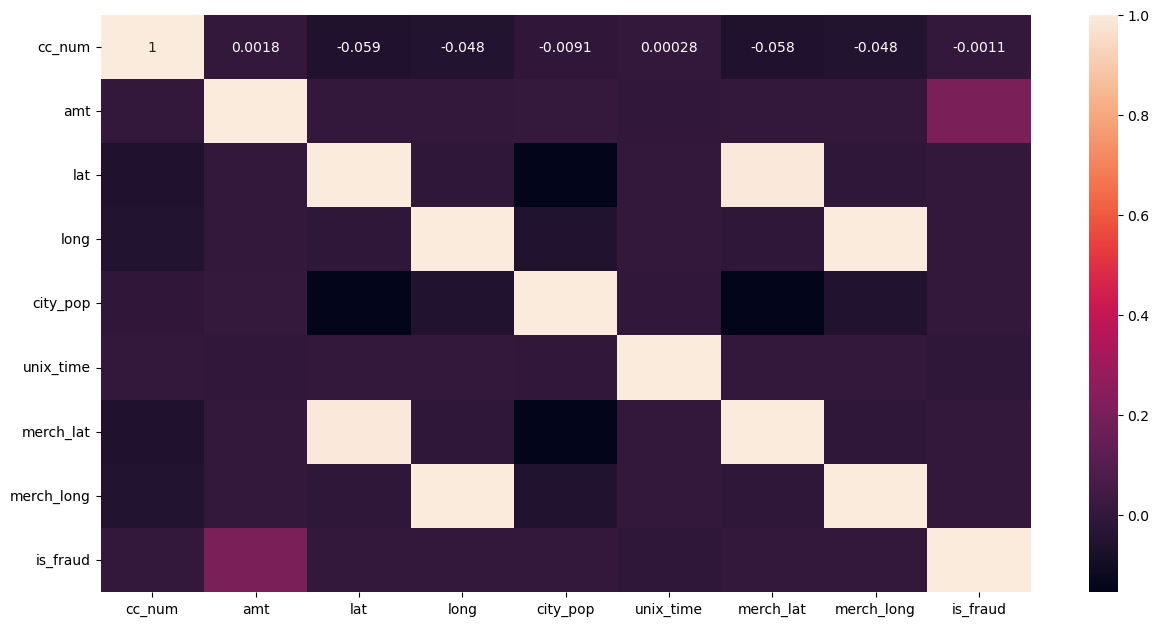

In [20]:
# Checking correlations between variables

# Dropping non-numeric columns

numeric_data = fraud_data.select_dtypes(include='number')

# Compute correlations between numeric variables

plt.figure(figsize=(15, 7.5))
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()

<pre>
Observations:

1. The latitude and longitude coordinates of customers and merchants are highly correlated, with coefficients of 0.99 and
   1.00, respectively.
2. This indicates a strong spatial relationship between transaction locations and merchant locations, potentially offering
   insights into customer behavior and aiding fraud detection based on geographical proximity.
</pre>

#### Univariate Analysis

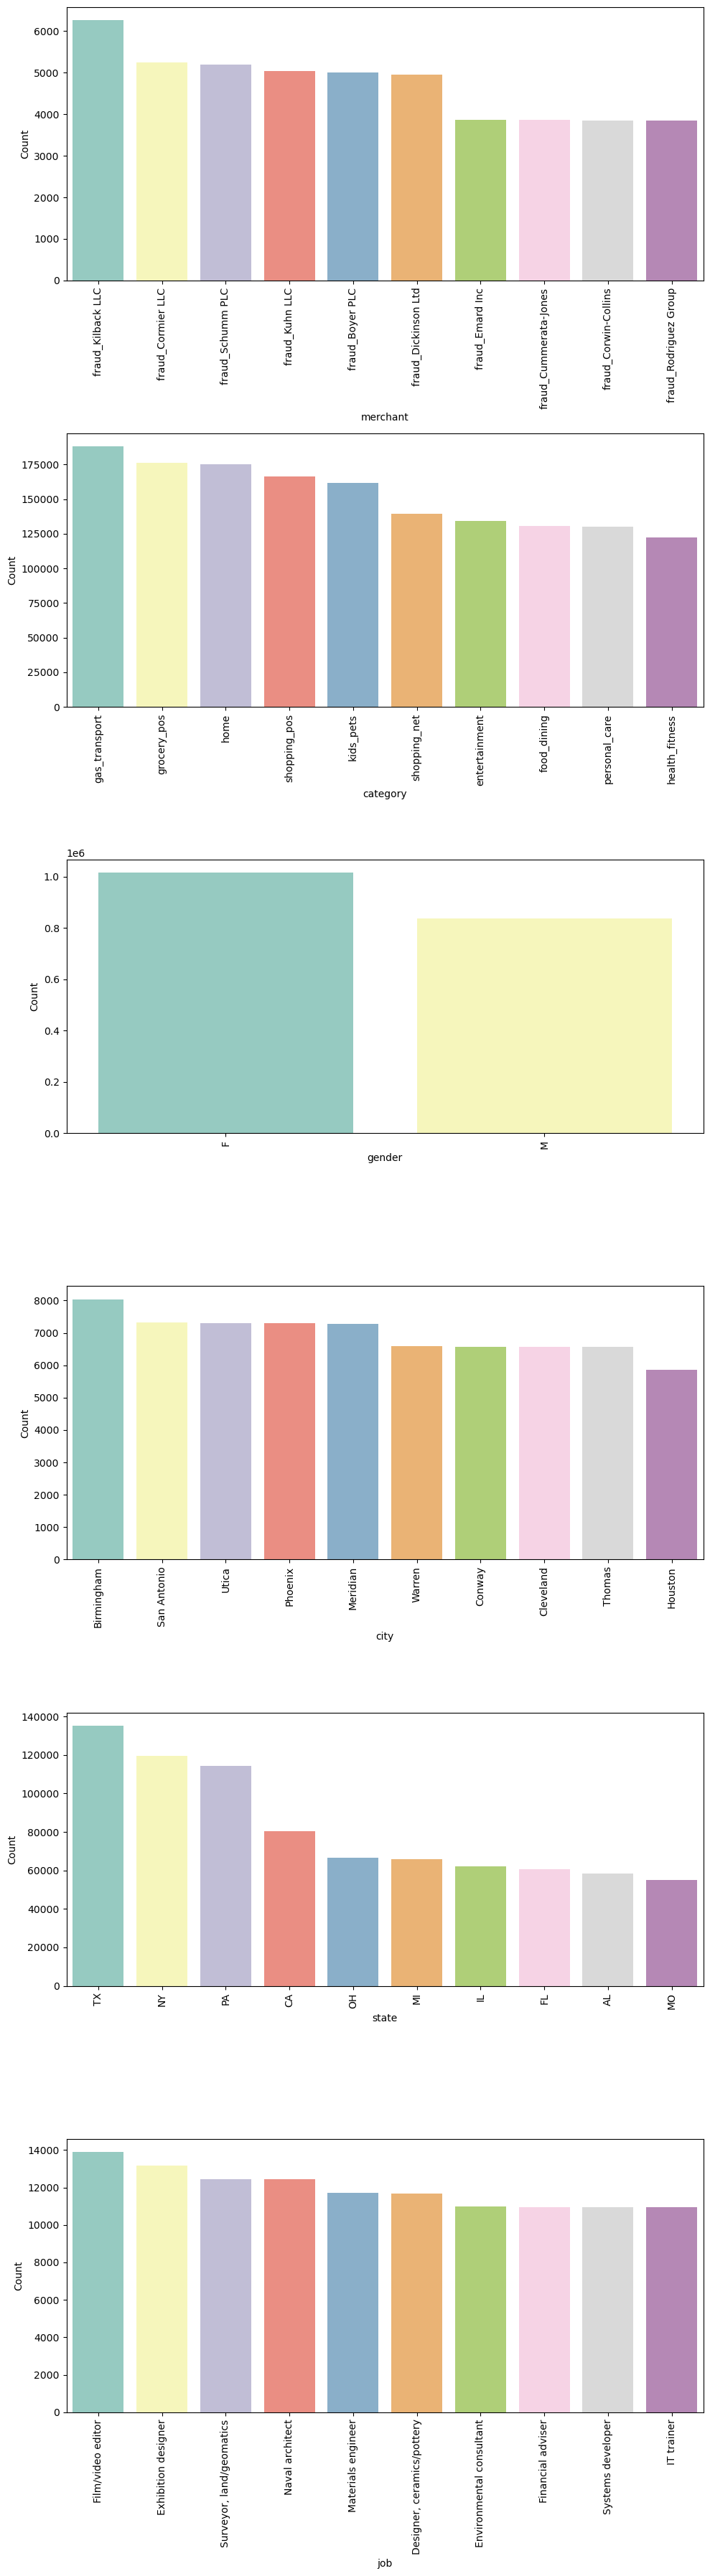

In [21]:
# Defining function for univariate analysis of categorical variables

def univariate_categorical_analysis(fraud_data, categorical_columns, top_n=10):
    num_plots = len(categorical_columns)
    fig, axs = plt.subplots(nrows=num_plots, figsize=(10, 6*num_plots))

    for i, col in enumerate(categorical_columns):
        # Get top N most frequent values
        top_values = fraud_data[col].value_counts().head(top_n).index

        # Filter the dataframe for top N values
        filtered_data = fraud_data[fraud_data[col].isin(top_values)]

        # Countplot
        sns.countplot(data=filtered_data, x=col, ax=axs[i], palette='Set3', order=top_values)
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Count')
        axs[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

# Defining categorical columns for analysis in 'fraud_data'

categorical_columns_to_analyze = ['merchant', 'category', 'gender', 'city', 'state', 'job']

# Conducting univariate categorical analysis on 'fraud_data' for specified columns, focusing on top N values

univariate_categorical_analysis(fraud_data, categorical_columns_to_analyze, top_n=10)


<pre>
Observations:
    
1. Transactions from Killback LLC is the highest among the top 10 merchants.
2. Gas and transportation transactions dominate among the top 10 merchant categories.
3. Female transactions outnumber male transactions.
4. Birmingham city records the highest transaction count among the top 10 cities.
5. Texas leads in transaction volume among the top 10 states.
6. Film/video editor roles represent the highest number of transactions among the top 10 job categories.
</pre>

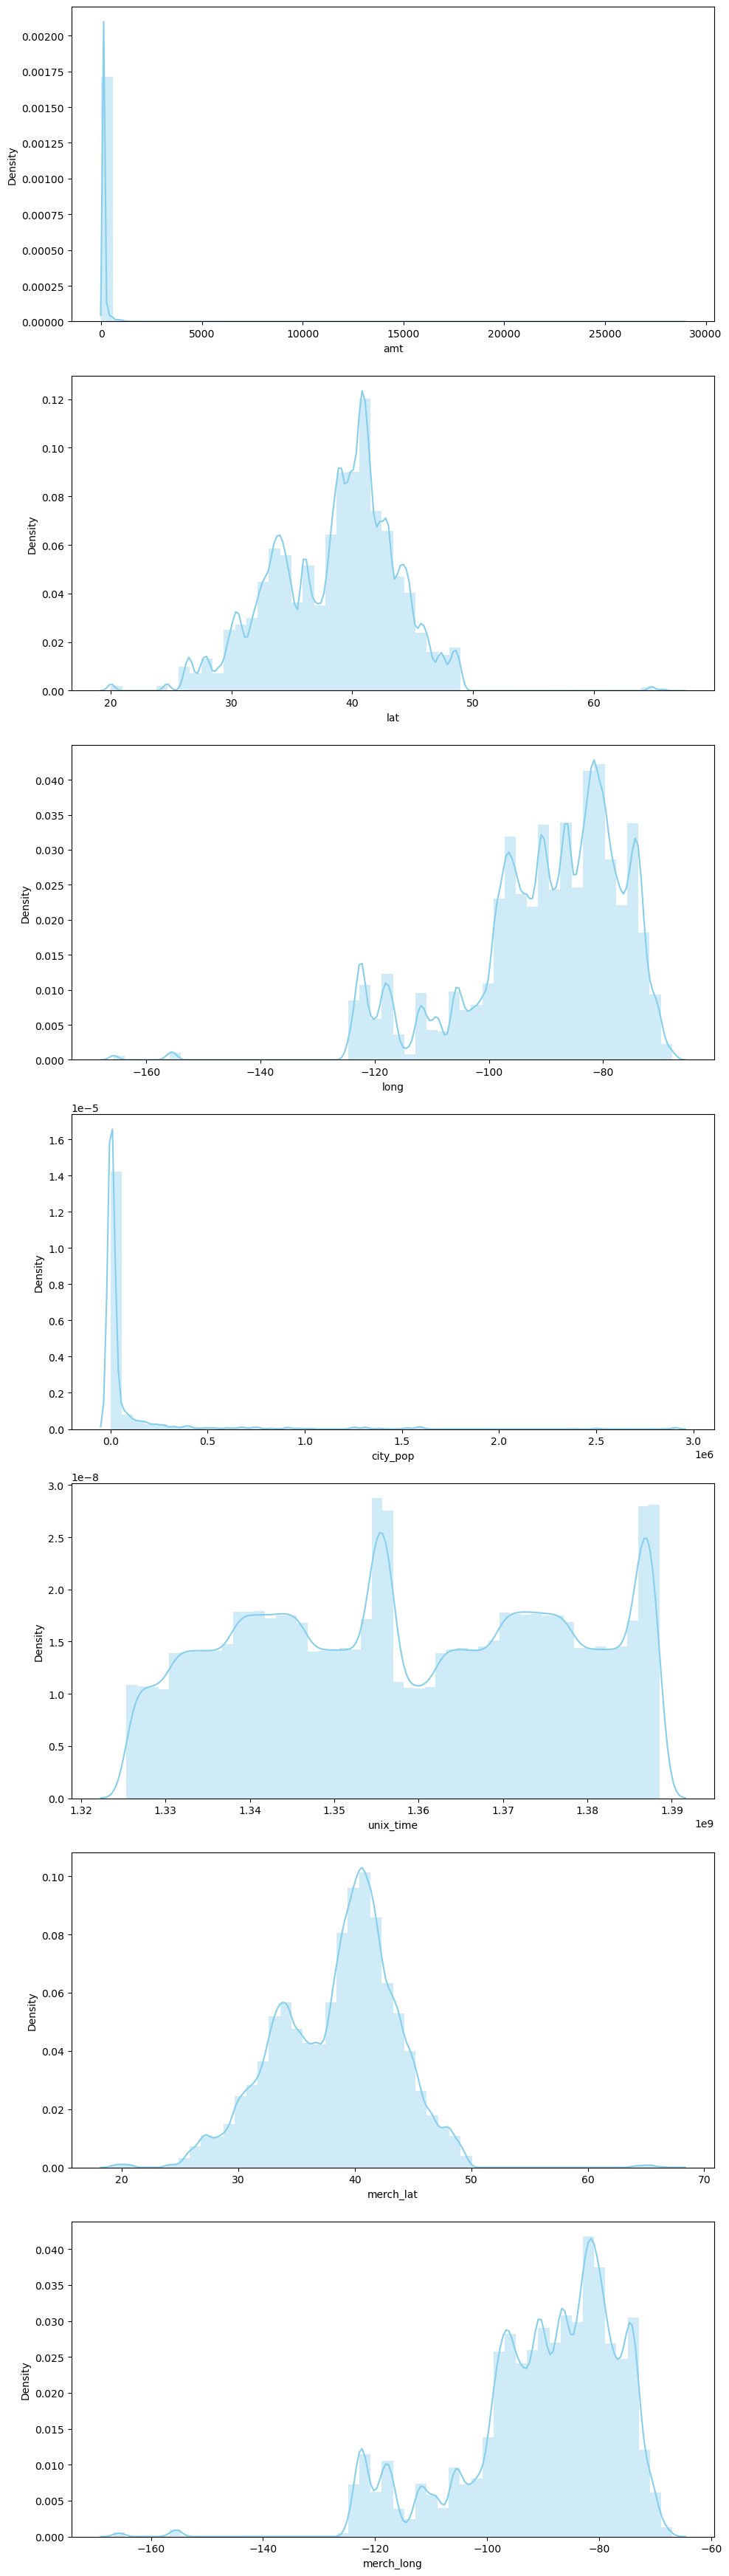

In [22]:
# Defining function for univariate analysis of numerical variables

def univariate_numerical_analysis(fraud_data, numerical_columns):
    num_plots = len(numerical_columns)
    fig, axs = plt.subplots(nrows=num_plots, figsize=(10, 5*num_plots))

    for i, col in enumerate(numerical_columns):
        sns.distplot(fraud_data[col], ax=axs[i], kde=True, color='skyblue')
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Density')

    plt.tight_layout()
    plt.show()

# Defining numerical columns for analysis in 'fraud_data'

numerical_columns_to_analyze = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']

# Conducting univariate categorical analysis on 'fraud_data' for specified columns, focusing on top N values

univariate_numerical_analysis(fraud_data, numerical_columns_to_analyze)

<pre>
Observation:

The significant skewness in the 'amt' and 'city_pop' variables indicates that their distributions are heavily concentrated towards specific values, potentially impacting statistical analyses and model performance.
</pre>

### Bivariate Analysis

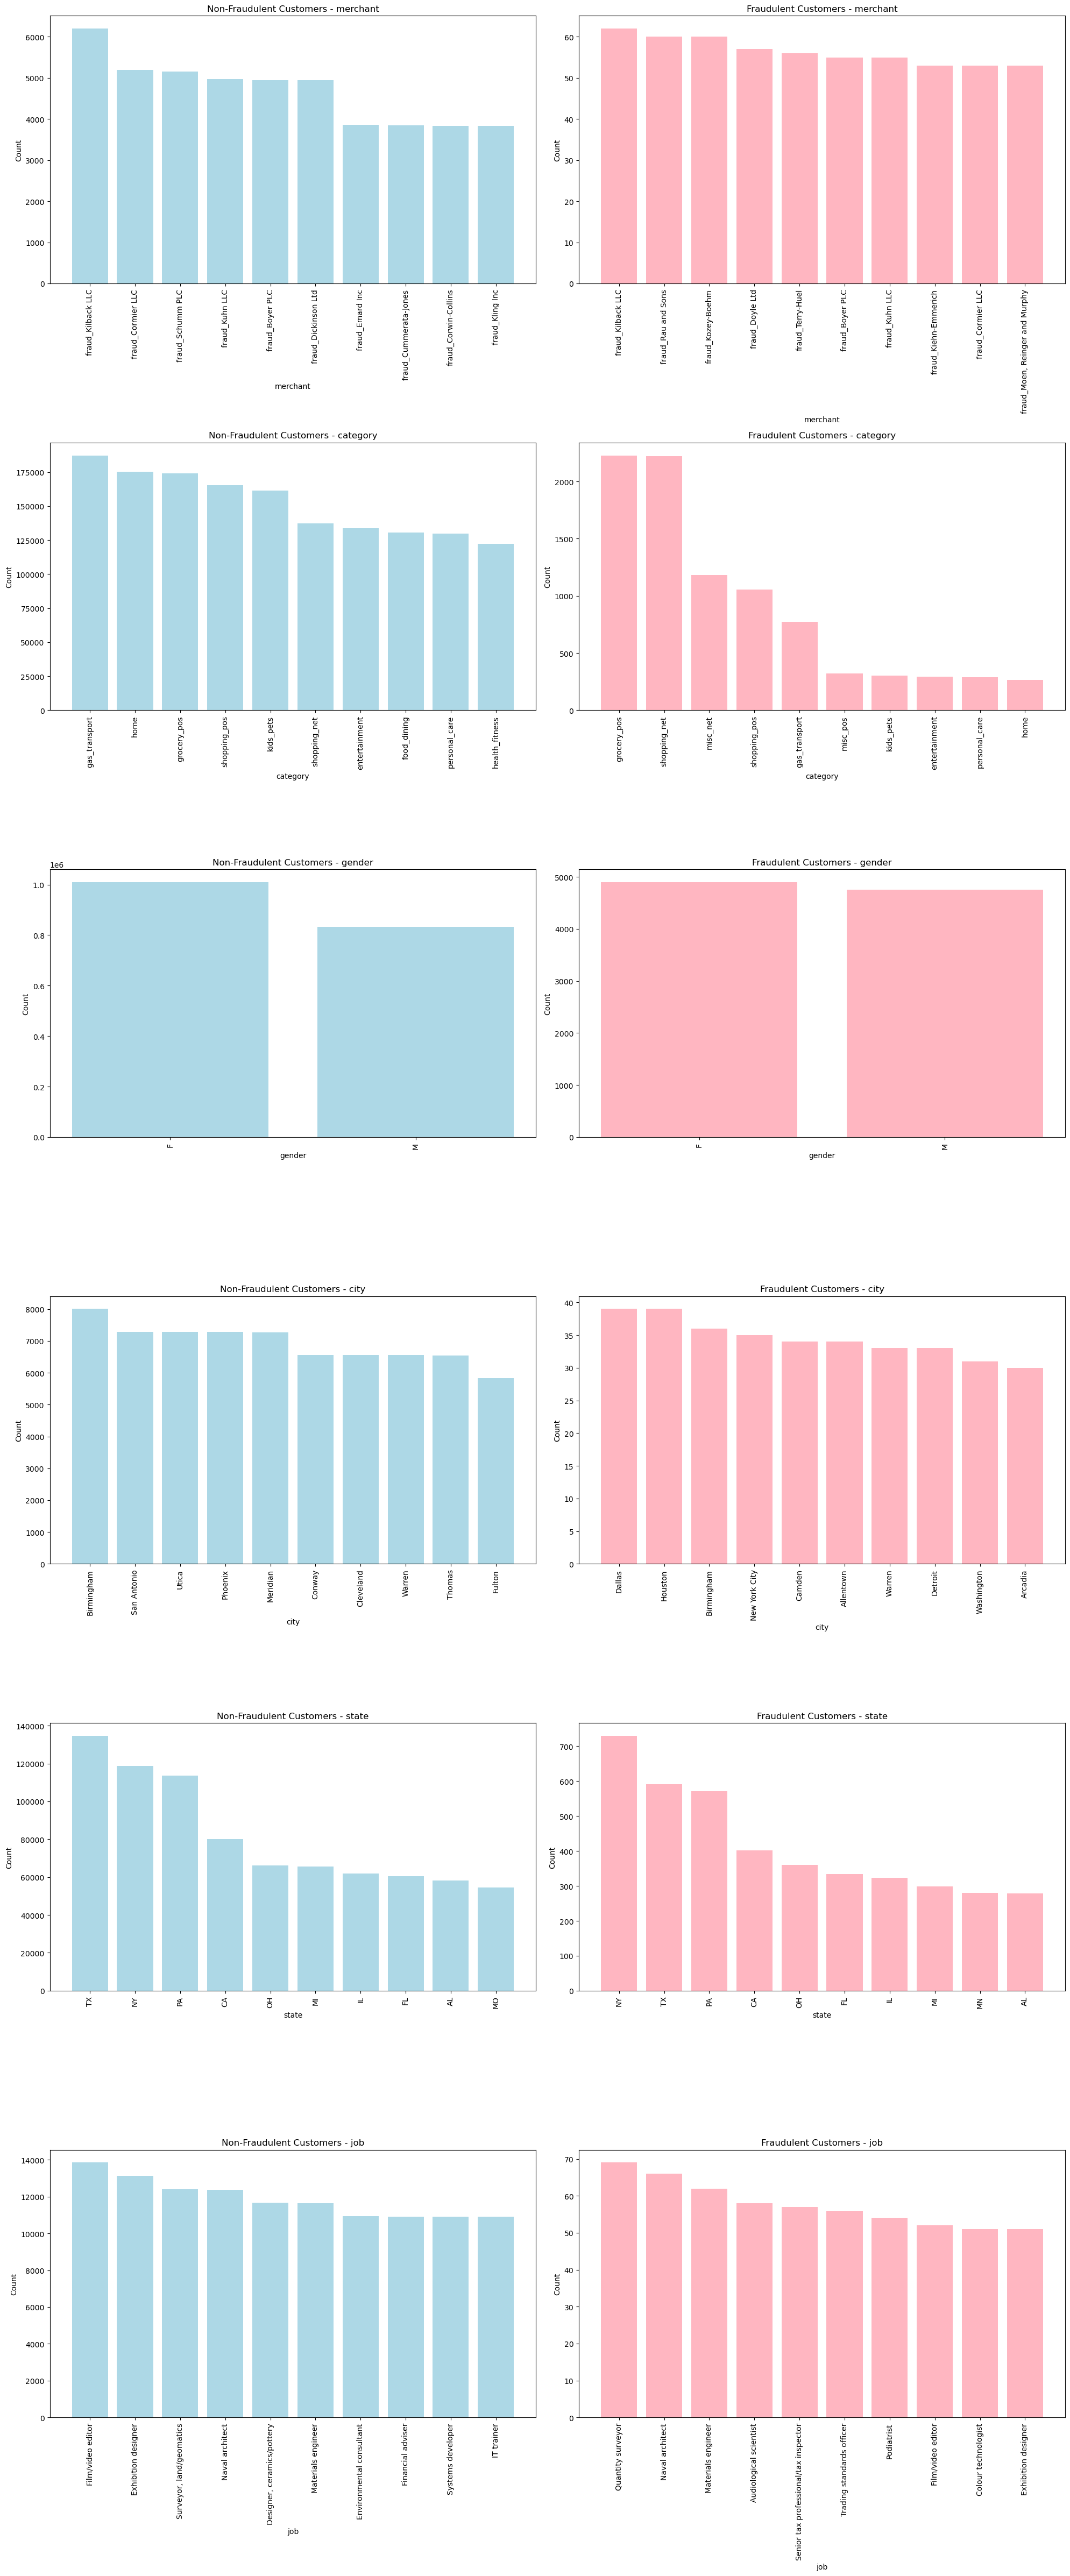

In [23]:
# Defining function for bivariate analysis of categorical variables as fraud vs non-fraud transactions

def plot_categorical_fraud_vs_non_fraud(fraud_data, columns):
    fig, axs = plt.subplots(nrows=len(columns), ncols=2, figsize=(20, 8*len(columns)))

    for i, col in enumerate(columns):
        non_fraud_counts = fraud_data[fraud_data['is_fraud'] == 0][col].value_counts().head(10)
        fraud_counts = fraud_data[fraud_data['is_fraud'] == 1][col].value_counts().head(10)

        axs[i, 0].bar(non_fraud_counts.index, non_fraud_counts.values, color='lightblue')
        axs[i, 0].set_title(f'Non-Fraudulent Customers - {col}')
        axs[i, 0].set_xlabel(col)
        axs[i, 0].set_ylabel('Count')
        axs[i, 0].tick_params(axis='x', rotation=90)

        axs[i, 1].bar(fraud_counts.index, fraud_counts.values, color='lightpink')
        axs[i, 1].set_title(f'Fraudulent Customers - {col}')
        axs[i, 1].set_xlabel(col)
        axs[i, 1].set_ylabel('Count')
        axs[i, 1].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

# Listing categorical columns for plotting

columns_to_plot = ['merchant', 'category', 'gender', 'city', 'state', 'job']

# Plotting categorical variables against fraud vs. non-fraud instances in 'fraud_data'

plot_categorical_fraud_vs_non_fraud(fraud_data, columns_to_plot)

<pre>
Observations:

1. Fraudulent transactions are most commonly associated with the merchant Killback LLC, which also holds the highest count
   in non-fraudulent transactions.
2. In fraudulent transactions, the grocery point-of-sale category predominates, while gas and transportation transactions
   dominate in non-fraudulent cases.
3. Both fraudulent and non-fraudulent transactions show a higher participation of females.
4. Fraudulent transactions are concentrated in Dallas and Houston cities, while Birmingham city leads in non-fraudulent
   transactions.
5. New York state records the highest count of fraudulent transactions, whereas Texas state leads in non-fraudulent
   transactions.
6. The job category of quantity surveyor is most prevalent in fraudulent transactions, whereas film/video editor roles
   dominate in non-fraudulent transactions.
</pre>

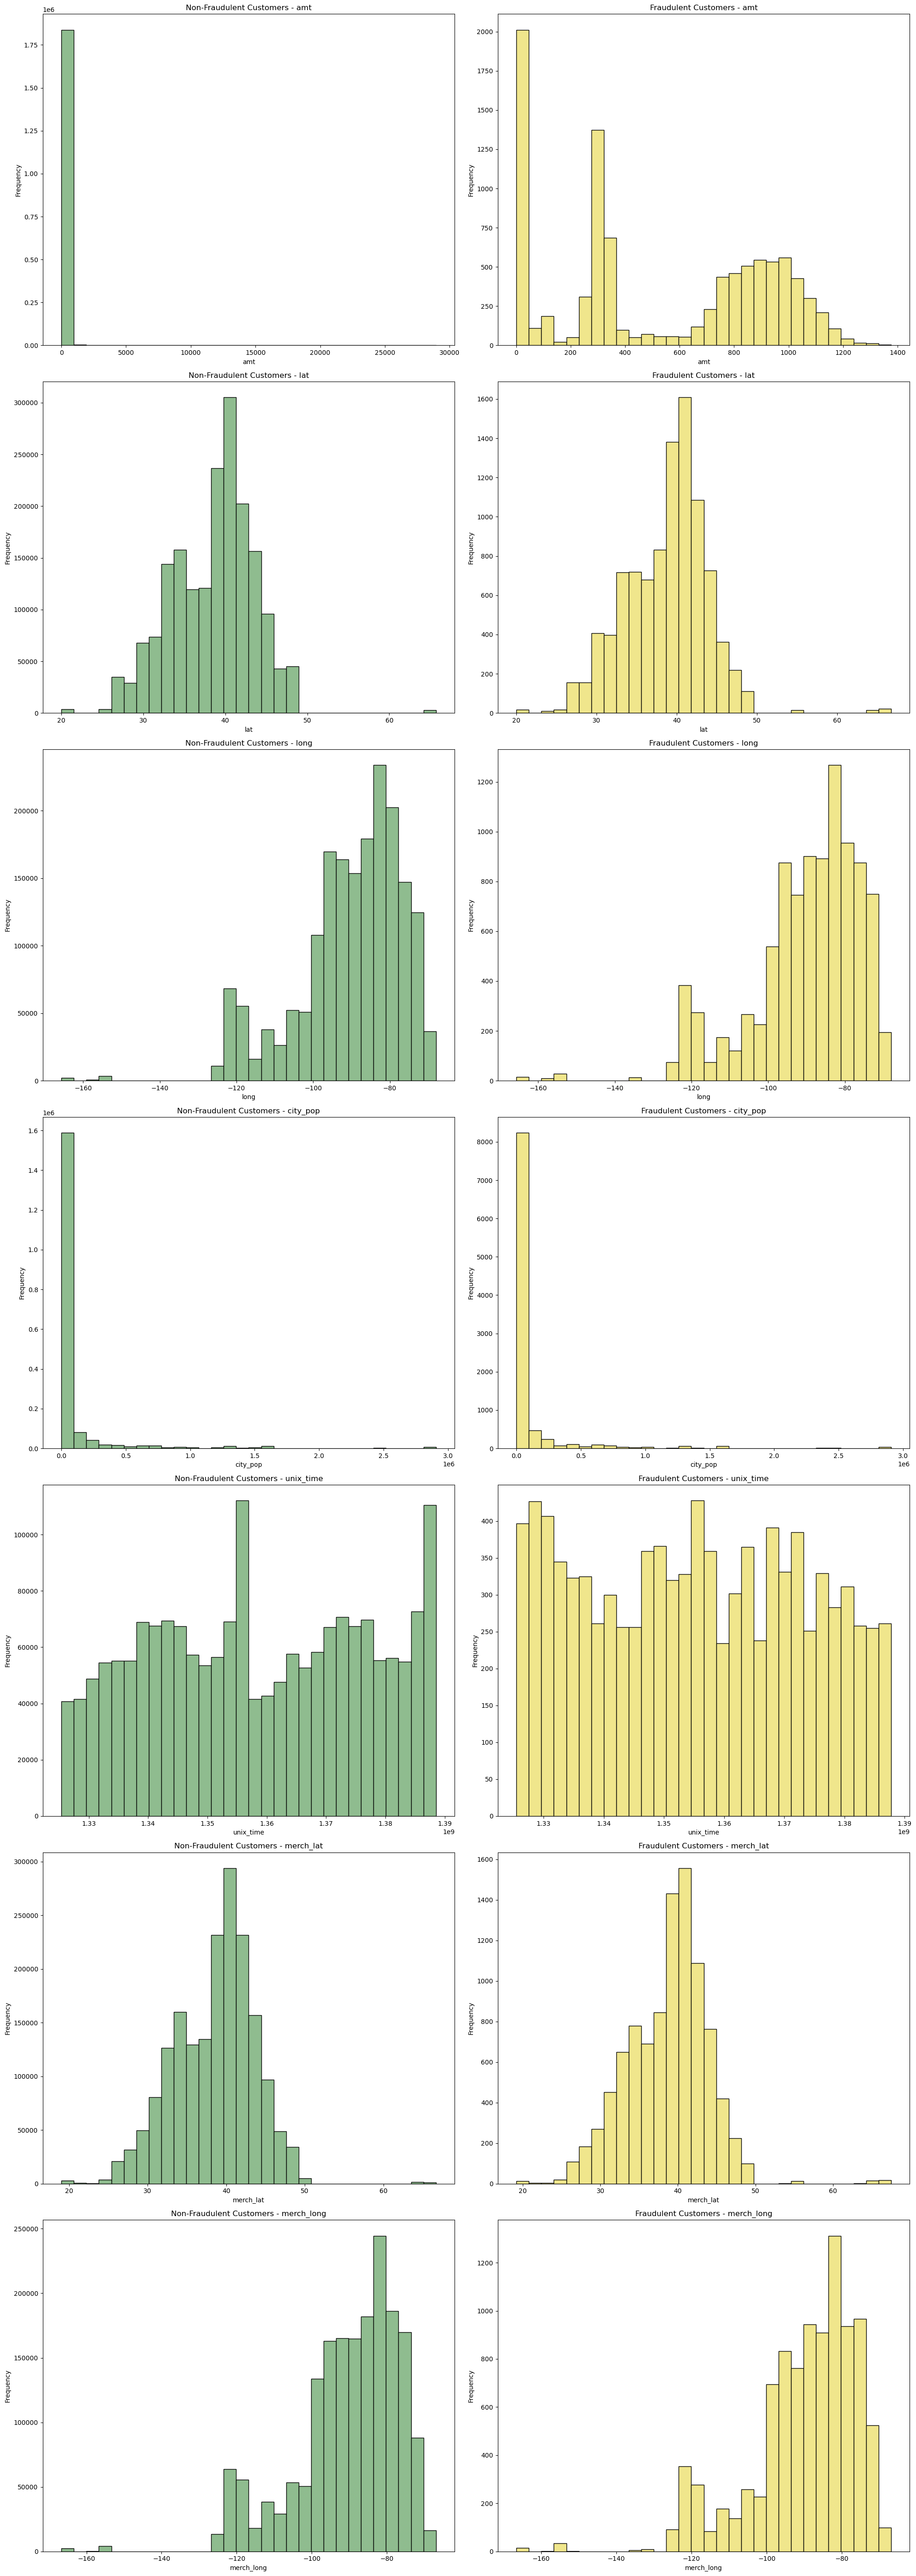

In [24]:
# Defining function for bivariate analysis of numerical variables as fraud vs non-fraud transactions

def plot_numerical_fraud_vs_non_fraud(fraud_data, numerical_columns):
    fig, axs = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(20, 8*len(numerical_columns)))

    for i, col in enumerate(numerical_columns):
        non_fraud_data = fraud_data[fraud_data['is_fraud'] == 0][col]
        fraud_data_fraud = fraud_data[fraud_data['is_fraud'] == 1][col]

        axs[i, 0].hist(non_fraud_data, bins=30, color='darkseagreen', edgecolor='black')
        axs[i, 0].set_title(f'Non-Fraudulent Customers - {col}')
        axs[i, 0].set_xlabel(col)
        axs[i, 0].set_ylabel('Frequency')

        axs[i, 1].hist(fraud_data_fraud, bins=30, color='khaki', edgecolor='black')
        axs[i, 1].set_title(f'Fraudulent Customers - {col}')
        axs[i, 1].set_xlabel(col)
        axs[i, 1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Listing numerical columns for plotting

numerical_columns_to_plot = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']

# Plotting categorical variables against fraud vs. non-fraud instances in 'fraud_data'

plot_numerical_fraud_vs_non_fraud(fraud_data, numerical_columns_to_plot)

<pre>
Observations:

1. The significant skewness in the 'amt' and 'city_pop' variables indicates that their distributions are heavily
   concentrated towards specific values, potentially impacting statistical analyses and model performance.

2. The similarity in counts between customer and merchant latitude-longitude coordinates suggests that transaction
   locations and merchant locations exhibit consistent patterns across both fraudulent and non-fraudulent transactions.
   This alignment implies that spatial proximity between customers and merchants may not be a significant factor in
   distinguishing fraudulent transactions from legitimate ones.
</pre>

### Step 4: Data Prepration

In [25]:
# Checking unique values for state column

fraud_data['state'].unique()

array(['NC', 'WA', 'ID', 'MT', 'VA', 'PA', 'KS', 'TN', 'IA', 'WV', 'FL',
       'CA', 'NM', 'NJ', 'OK', 'IN', 'MA', 'TX', 'WI', 'MI', 'WY', 'HI',
       'NE', 'OR', 'LA', 'DC', 'KY', 'NY', 'MS', 'UT', 'AL', 'AR', 'MD',
       'GA', 'ME', 'AZ', 'MN', 'OH', 'CO', 'VT', 'MO', 'SC', 'NV', 'IL',
       'NH', 'SD', 'AK', 'ND', 'CT', 'RI', 'DE'], dtype=object)

In [26]:
# Binning state column for better analysis

def region(x):
    if x['state'] in ['CT', 'ME', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT']:
        return 'northeast'
    elif x['state'] in ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI']:
        return 'midwest'
    elif x['state'] in ['AL', 'AR', 'DE', 'DC', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV']:
        return 'south'
    else:
        return 'west'
        
# Applying region function to create new column as state bin

fraud_data['state_bin'] = fraud_data.apply(lambda x: region(x), axis = 1)

# Displaying first few rows of DataFrame to check new column

fraud_data.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender            city state      lat      long  \
0       misc_net    4.97      F  Moravian Falls    NC  36.0788  -81.1781   
1    grocery_pos  107.23      F          Orient    WA  48.8878 -118.2105   
2  entertainment  220.11      M      Malad City    ID  42.1808 -112.2620   
3  gas_transport   45.00      M         Boulder    MT  46.2306 -112.1138   
4       misc_pos   41.96      M        Doe Hill    VA  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud state_bin  
0         0     south  
1         0      west  
2         0      west  
3         0      west  
4         0     south

In [27]:
# Checking unique values for job column

fraud_data['job'].unique()

array(['Psychologist, counselling', 'Special educational needs teacher',
       'Nature conservation officer', 'Patent attorney',
       'Dance movement psychotherapist', 'Transport planner',
       'Arboriculturist', 'Designer, multimedia',
       'Public affairs consultant', 'Pathologist', 'IT trainer',
       'Systems developer', 'Engineer, land', 'Systems analyst',
       'Naval architect', 'Radiographer, diagnostic',
       'Programme researcher, broadcasting/film/video', 'Energy engineer',
       'Event organiser', 'Operational researcher', 'Market researcher',
       'Probation officer', 'Leisure centre manager',
       'Corporate investment banker', 'Therapist, occupational',
       'Call centre manager', 'Police officer',
       'Education officer, museum', 'Physiotherapist', 'Network engineer',
       'Forensic psychologist', 'Geochemist',
       'Armed forces training and education officer',
       'Designer, furniture', 'Optician, dispensing',
       'Psychologist, forensic

In [28]:
# Binning job column for better analysis

fraud_data['job'].replace(['Aeronautical engineer', 'Airline pilot', 'Architect', 'Architectural technologist', 'Armed forces technical officer', 'architecture and engineering','Applications developer', 'Biomedical engineer',
                                                   'Building control surveyor', 'Building services engineer', 'Building surveyor', 'Chemical engineer', 'Civil engineer, contracting', 'Communications engineer',
                                                    'Control and instrumentation engineer', 'Contracting civil engineer', 'Drilling engineer', 'Electrical engineer', 'Electronics engineer', 'Engineer, aeronautical',
                                                    'Engineer, agricultural', 'Engineer, automotive', 'Engineer, biomedical', 'Engineer, broadcasting (operations)', 'Engineer, building services',
                                                    'Engineer, civil (consulting)', 'Engineer, civil (contracting)', 'Engineer, communications', 'Engineer, control and instrumentation', 'Engineer, drilling',
                                                    'Engineer, electronics', 'Engineer, land', 'Engineer, maintenance', 'Engineer, manufacturing', 'Engineer, materials', 'Engineer, mining', 'Engineer, petroleum',
                                                    'Engineer, production', 'Engineer, site', 'Engineer, structural', 'Engineer, technical sales', 'Engineering geologist',
                                                    'Historic buildings inspector/conservation officer', 'Land/geomatics surveyor', 'Landscape architect', 'Petroleum engineer','Maintenance engineer',
                                                    'Manufacturing engineer','Manufacturing systems engineer','Materials engineer','Mechanical engineer','Mining engineer','Naval architect',
                                                    'Planning and development surveyor', 'Production engineer', 'Pilot, airline', 'Quantity surveyor', 'Rural practice surveyor', 'Site engineer', 'Software engineer',
                                                    'Structural engineer', 'Surveyor, land/geomatics', 'Surveyor, rural practice', 'Town planner', 'Water engineer'],"architecture and engineering" , inplace = True)

fraud_data['job'].replace(['Advertising copywriter', 'Animator', 'Archivist', 'Art gallery manager', 'Art therapist', 'Artist', 'Arts development officer', 'Broadcast engineer', 'Bookseller',
                                                   'Camera operator','Cabin crew', 'Ceramics designer', 'Community arts worker', 'Curator', 'Conservator, furniture', 'Conservator, museum/gallery',
                                                   'Designer, ceramics/pottery', 'Designer, exhibition/display', 'Designer, furniture', 'Designer, industrial/product', 'Designer, interior/spatial', 'Designer, jewellery',
                                                   'Designer, multimedia', 'Designer, television/film set', 'Designer, textile', 'Event organiser', 'Exhibition designer', 'Exhibitions officer, museum/gallery',
                                                   'Fine artist', 'Film/video editor', 'Furniture conservator/restorer', 'Furniture designer', 'Gaffer', 'Glass blower/designer', 'Heritage manager', 'Illustrator',
                                                   'Industrial/product designer', 'Interior and spatial designer', 'Jewellery designer', 'Location manager', 'Magazine features editor', 'Magazine journalist','Make',
                                                   'Museum/gallery conservator', 'Museum/gallery exhibitions officer', 'Musician', 'Press photographer', 'Producer, television/film/video', 'Product designer',
                                                   'Presenter, broadcasting', 'Producer, radio', 'Production assistant, radio', 'Production assistant, television', 'Programme researcher, broadcasting/film/video',
                                                   'Set designer','Special effects artist', 'Stage manager', 'Sports administrator', 'Sports development officer', 'Sub', 'Television camera operator',
                                                   'Television floor manager', 'Television production assistant', 'Television/film/video producer', 'Textile designer', 'Theatre director', 'Theatre manager',
                                                   'Tour manager', 'Tourism officer', 'Tourist information centre manager', 'Travel agency manager', 'Transport planner', 'Video editor', 'Writer', 'Web designer'],
                                                   "arts, culture and entertainment", inplace = True)

fraud_data['job'].replace( ['Accountant, chartered certified', 'Accountant, chartered public finance', 'Accountant, chartered', 'Accounting technician', 'Advertising account executive',
                                                    'Advertising account planner', 'Administrator', 'Administrator, arts', 'Administrator, charities/voluntary organisations', 'Administrator, education',
                                                    'Administrator, local government', 'Agricultural consultant', 'Air broker', 'Armed forces logistics/support/administrative officer', 'Barista', "Barrister's clerk",
                                                    'Barrister', 'Buyer, industrial', 'Buyer, retail', 'Call centre manager', 'Catering manager', 'Charity fundraiser', 'Charity officer', 'Chartered accountant',
                                                    'Chartered legal executive (England and Wales)', 'Chartered loss adjuster', 'Chartered public finance accountant', 'Chief Executive Officer',
                                                    'Chief Financial Officer',
                                                    'Chief Marketing Officer', 'Chief of Staff', 'Chief Operating Officer', 'Chief Strategy Officer', 'Chief Technology Officer', 'Civil Service administrator',
                                                    'Civil Service fast streamer', 'Claims inspector/assessor', 'Clothing/textile technologist', 'Commercial horticulturist', 'Commercial/residential surveyor',
                                                    'Company secretary', 'Comptroller', 'Contractor', 'Copywriter, advertising', 'Corporate investment banker', 'Dance movement psychotherapist', 'Dancer', 'Dealer',
                                                    'Economist', 'Estate manager/land agent', 'Equities trader', 'Energy manager', 'Facilities manager', 'Farm manager', 'Financial adviser', 'Financial trader',
                                                    'Futures trader', 'Freight forwarder', 'Hotel manager', 'Human resources officer', 'Horticultural consultant', 'Horticulturist, commercial', 'Industrial buyer',
                                                    'Information systems manager', 'Insurance broker', 'Insurance claims handler', 'Insurance risk surveyor', 'Insurance underwriter', 'Investment analyst',
                                                    'Investment banker, corporate', 'Investment banker, operational', 'IT consultant', 'Land', 'Legal secretary', 'Licensed conveyancer',
                                                    'Logistics and distribution manager', 'Loss adjuster, chartered', 'Management consultant', 'Market researcher', 'Marketing executive',
                                                    'Medical sales representative', 'Merchandiser, retail', 'Operational investment banker','Patent attorney', 'Pension scheme manager', 'Pensions consultant', 'Personnel officer',
                                                    "Politician's assistant", 'Product manager', 'Production manager', 'Public house manager', 'Purchasing manager', 'Quarry manager', 'Records manager',
                                                    'Regulatory affairs officer', 'Restaurant manager, fast food', 'Retail banker', 'Retail buyer', 'Retail manager', 'Retail merchandiser', 'Risk analyst', 'Sales executive',
                                                    'Sales professional, IT', 'Sales promotion account executive', 'Secretary/administrator', 'Senior tax professional/tax inspector', 'Ship broker', 'Solicitor, Scotland',
                                                    'Solicitor', 'Tax adviser', 'Tax inspector', 'Technical brewer', 'Theme park manager', 'Trade mark attorney', 'Training and development officer',
                                                    'Visual merchandiser','Warehouse manager',],"business, management and administration", inplace = True)

fraud_data['job'].replace(['Broadcast journalist', 'Broadcast presenter', 'Commissioning editor', 'Copy', 'Editor, commissioning', 'Editor, film/video', 'Editor, magazine features',
                                                    'Information officer', 'Interpreter', 'Journalist, newspaper', 'Lexicographer', 'Media buyer', 'Media planner', 'Multimedia programmer', 'Press sub',
                                                    'Public affairs consultant', 'Public relations account executive', 'Public relations officer', 'Radio broadcast assistant', 'Radio producer', 'Science writer'],
                                                    "communications", inplace = True)

fraud_data['job'].replace(['Advice worker', 'Aid worker', 'Air cabin crew', 'Air traffic controller', 'Amenity horticulturist', 'Arboriculturist', 'Careers adviser', 'Careers information officer',
                                                   'Child psychotherapist', 'Community development worker', 'Community education officer', 'Community pharmacist', 'Counselling psychologist', 'Counsellor',
                                                   'Conservation officer, historic buildings', 'Development worker, community', 'Development worker, international aid', 'Education officer, community',
                                                   'Environmental consultant', 'Environmental education officer', 'Environmental health practitioner', 'Environmental manager', 'Equality and diversity officer',
                                                   'Emergency planning/management officer', 'Firefighter', 'Fisheries officer', 'Forest/woodland manager', 'Health and safety adviser',
                                                   'Health promotion specialist', 'Health service manager', 'Health visitor', 'Immigration officer', 'Lawyer', 'Leisure centre manager', 'Local government officer', 'Nature conservation officer',
                                                   'Police officer', 'Prison officer', 'Probation officer', 'Public librarian', 'Race relations officer', 'Research officer, political party', 'Research officer, trade union',
                                                   'Social research officer, government', 'Trading standards officer', 'Volunteer coordinator', 'Warden/ranger', 'Waste management officer'],
                                                   "community and social services", inplace = True)

fraud_data['job'].replace(['Academic librarian', 'Associate Professor', 'Armed forces training and education officer', 'Early years teacher', 'Education administrator',
                                                   'Education officer, museum', 'Educational psychologist', 'English as a foreign language teacher', 'English as a second language teacher',
                                                   'Further education lecturer', 'Higher education careers adviser', 'IT trainer', 'Learning mentor', 'Lecturer, further education', 'Lecturer, higher education',
                                                   'Librarian, academic', 'Librarian, public', 'Museum education officer', 'Music tutor', 'Outdoor activities/education manager', 'Primary school teacher',
                                                   'Professor Emeritus', 'Private music teacher', 'Secondary school teacher', 'Special educational needs teacher', 'Teacher, adult education',
                                                   'Teacher, early years/pre', 'Teacher, English as a foreign language', 'Teacher, primary school', 'Teacher, secondary school', 'TEFL teacher',
                                                   'Teacher, special educational needs'],"education", inplace = True)

fraud_data['job'].replace(['Acupuncturist', 'Ambulance person', 'Audiological scientist', 'Biochemist, clinical', 'Clinical biochemist', 'Clinical cytogeneticist', 'Clinical psychologist',
                                                   'Chiropodist', 'Diagnostic radiographer', 'Dispensing optician', 'Doctor, general practice', 'Doctor, hospital', 'Embryologist, clinical', 'Exercise physiologist',
                                                   'Forensic psychologist', 'Fitness centre manager', 'General practice doctor', 'Health physicist', 'Hospital doctor', 'Hospital pharmacist', 'Herbalist', 'Homeopath',
                                                   'Horticultural therapist', 'Immunologist', 'Learning disability nurse', 'Medical physicist', 'Medical secretary', 'Medical technical officer', 'Mental health nurse',
                                                   'Music therapist', 'Neurosurgeon', "Nurse, children's", 'Nurse, mental health', 'Nutritional therapist', 'Occupational therapist', 'Oncologist', 'Optician, dispensing',
                                                   'Optometrist', 'Orthoptist', 'Osteopath', 'Occupational hygienist', 'Occupational psychologist', 'Paediatric nurse', 'Paramedic', 'Pathologist',
                                                   'Pharmacist, community', 'Pharmacist, hospital', 'Physicist, medical', 'Physiotherapist', 'Podiatrist', 'Psychiatric nurse', 'Psychiatrist', 'Psychologist, clinical',
                                                   'Psychologist, counselling', 'Psychologist, forensic', 'Psychologist, sport and exercise', 'Psychotherapist, child', 'Psychotherapist', 'Phytotherapist',
                                                   'Radiographer, diagnostic', 'Radiographer, therapeutic', 'Sport and exercise psychologist', 'Surgeon', 'Therapist, art', 'Therapist, drama', 'Therapist, music',
                                                   'Therapist, occupational', 'Therapist, sports', 'Tree surgeon', 'Veterinary surgeon'],"health and medicine", inplace = True)

fraud_data['job'].replace(['Analytical chemist', 'Animal nutritionist', 'Animal technologist', 'Archaeologist', 'Biomedical scientist', 'Cartographer', 'Chemist, analytical',
                                                   'Clinical research associate', 'Colour technologist', 'Cytogeneticist', 'Data scientist', 'Database administrator', 'Ecologist', 'Energy engineer', 'Field seismologist',
                                                   'Field trials officer', 'Garment/textile technologist', 'Geneticist, molecular', 'Geochemist', 'Geologist, engineering', 'Geologist, wellsite',
                                                   'Geophysicist/field seismologist', 'Geoscientist', 'Herpetologist', 'Hydrogeologist', 'Hydrographic surveyor', 'Hydrologist', 'Intelligence analyst', 'Metallurgist',
                                                   'Minerals surveyor', 'Mudlogger', 'Network engineer', 'Oceanographer', 'Operational researcher', 'Operations geologist', 'Pharmacologist', 'Physiological scientist',
                                                   'Plant breeder/geneticist', 'Product/process development scientist', 'Programmer, applications', 'Programmer, multimedia', 'Research scientist (life sciences)',
                                                   'Research scientist (maths)', 'Research scientist (medical)', 'Research scientist (physical sciences)', 'Scientific laboratory technician', 'Scientist, biomedical',
                                                   'Scientist, clinical (histocompatibility and immunogenetics)', 'Scientist, marine', 'Scientist, physiological', 'Scientist, research (maths)',
                                                   'Scientist, research (medical)', 'Scientist, research (physical sciences)', 'Seismic interpreter', 'Social researcher', 'Soil scientist', 'Statistician',
                                                   'Surveyor, hydrographic', 'Surveyor, minerals', 'Surveyor, mining', 'Systems analyst', 'Systems developer', 'Scientist, audiological', 'Therapist, horticultural',
                                                   'Teaching laboratory technician', 'Telecommunications researcher','Toxicologist', 'Water quality scientist', 'Wellsite geologist'],"science and research",
                                                    inplace=True)

# Renaming column for better understanding as we replaced jobs with categories

fraud_data.rename(columns={'job': 'job_category'}, inplace=True)

# Displaying first few rows of DataFrame to check replacements of job column

fraud_data.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender            city state      lat      long  \
0       misc_net    4.97      F  Moravian Falls    NC  36.0788  -81.1781   
1    grocery_pos  107.23      F          Orient    WA  48.8878 -118.2105   
2  entertainment  220.11      M      Malad City    ID  42.1808 -112.2620   
3  gas_transport   45.00      M         Boulder    MT  46.2306 -112.1138   
4       misc_pos   41.96      M        Doe Hill    VA  38.4207  -79.4629   

   city_pop                             job_category         dob  \
0      3495                      health and medicine  1988-03-09   
1       149                                education  1978-06-21   
2      4154            community and social services  1962-01-19   
3      1939  business, management and administration  1967-01-12   
4        99  business, management and administration  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud state_bin  
0         0     south  
1         0      west  
2         0      west  
3         0      west  
4         0     south

In [29]:
# Creating new columns for better analysis

# Convert 'trans_date_trans_time' column to datetime and extract date

fraud_data['trans_date_trans_time'] = pd.to_datetime(fraud_data['trans_date_trans_time'])
fraud_data['trans_date_trans_time'] = pd.to_datetime(fraud_data['trans_date_trans_time'])

fraud_data['transaction_date']= pd.to_datetime(fraud_data['trans_date_trans_time']).dt.date

# Convert 'transaction_date' back to datetime format

fraud_data['transaction_date'] = pd.to_datetime(fraud_data['transaction_date'])

# Extract time from 'trans_date_trans_time' and assign to 'transaction_time'

fraud_data['transaction_time']= pd.to_datetime(fraud_data['trans_date_trans_time']).dt.time

# Convert 'dob' column to datetime

fraud_data['dob'] = pd.to_datetime(fraud_data['dob'])

# Calculate age based on 'dob' and 'transaction_date'

fraud_data['age'] = fraud_data['transaction_date'].dt.year - fraud_data['dob'].dt.year

# Adjust age for cases where birth date hasn't occurred yet in the transaction year
fraud_data.loc[fraud_data['transaction_date'].dt.month < fraud_data['dob'].dt.month, 'age'] -= 1
fraud_data.loc[(fraud_data['transaction_date'].dt.month == fraud_data['dob'].dt.month) & 
               (fraud_data['transaction_date'].dt.day < fraud_data['dob'].dt.day), 'age'] -= 1

# Extract day name and hour from 'transaction_date'

fraud_data['transaction_year'] = fraud_data['transaction_date'].dt.year
fraud_data['transaction_year_month'] = fraud_data['transaction_date'].dt.to_period('M')
fraud_data['transaction_month'] = fraud_data['transaction_date'].dt.month
fraud_data['transaction_date_day'] = fraud_data['transaction_date'].dt.day
fraud_data['transaction_day'] = fraud_data['transaction_date'].dt.day_name()
fraud_data['transaction_hour'] = fraud_data['trans_date_trans_time'].dt.hour

group_by_cc = fraud_data.groupby(['cc_num'])

# Calculate time difference in hours between consecutive transactions for each credit card

fraud_data['time_since_prev_transaction'] = group_by_cc['transaction_hour'].transform(lambda x: round((x - x.shift(1)), 1)).fillna(0)  # Fill NaN values with 0 for the first transaction of each card

# Checking converted columns

fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 29 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   trans_date_trans_time        datetime64[ns]
 1   cc_num                       int64         
 2   merchant                     object        
 3   category                     object        
 4   amt                          float64       
 5   gender                       object        
 6   city                         object        
 7   state                        object        
 8   lat                          float64       
 9   long                         float64       
 10  city_pop                     int64         
 11  job_category                 object        
 12  dob                          datetime64[ns]
 13  trans_num                    object        
 14  unix_time                    int64         
 15  merch_lat                    float64       
 16  merch_

In [30]:
# Displaying first few rows of DataFrame to check new columns

fraud_data.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender            city state      lat      long  \
0       misc_net    4.97      F  Moravian Falls    NC  36.0788  -81.1781   
1    grocery_pos  107.23      F          Orient    WA  48.8878 -118.2105   
2  entertainment  220.11      M      Malad City    ID  42.1808 -112.2620   
3  gas_transport   45.00      M         Boulder    MT  46.2306 -112.1138   
4       misc_pos   41.96      M        Doe Hill    VA  38.4207  -79.4629   

   city_pop                             job_category        dob  \
0      3495                      health and medicine 1988-03-09   
1       149                                education 1978-06-21   
2      4154            community and social services 1962-01-19   
3      1939  business, management and administration 1967-01-12   
4        99  business, management and administration 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud state_bin transaction_date transaction_time  age  \
0         0     south       2019-01-01         00:00:18   30   
1         0      west       2019-01-01         00:00:44   40   
2         0      west       2019-01-01         00:00:51   56   
3         0      west       2019-01-01         00:01:16   51   
4         0     south       2019-01-01         00:03:06   32   

   transaction_year transaction_year_month  transaction_month  \
0              2019                2019-01                  1   
1              2019                2019-01                  1   
2              2019                2019-01                  1   
3              2019                2019-01                  1   
4              2019                2019-01                  1   

   transaction_date_day transaction_day  transaction_hour  \
0                     1         Tuesday                 0   
1                     1         Tuesday                 0   
2                     1         Tuesday                 0   
3                     1         Tuesday                 0   
4                     1         Tuesday                 0   

   time_since_prev_transaction  
0                          0.0  
1                          0.0  
2                          0.0  
3                          0.0  
4                          0.0

In [31]:
# Binning age column for better analysis

bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100']

# Binning the 'age' variable to 'age_group'

fraud_data['age_group'] = pd.cut(fraud_data['age'], bins=bins, labels=labels, right=False)

# Displaying first few rows

fraud_data.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender            city state      lat      long  \
0       misc_net    4.97      F  Moravian Falls    NC  36.0788  -81.1781   
1    grocery_pos  107.23      F          Orient    WA  48.8878 -118.2105   
2  entertainment  220.11      M      Malad City    ID  42.1808 -112.2620   
3  gas_transport   45.00      M         Boulder    MT  46.2306 -112.1138   
4       misc_pos   41.96      M        Doe Hill    VA  38.4207  -79.4629   

   city_pop                             job_category        dob  \
0      3495                      health and medicine 1988-03-09   
1       149                                education 1978-06-21   
2      4154            community and social services 1962-01-19   
3      1939  business, management and administration 1967-01-12   
4        99  business, management and administration 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud state_bin transaction_date transaction_time  age  \
0         0     south       2019-01-01         00:00:18   30   
1         0      west       2019-01-01         00:00:44   40   
2         0      west       2019-01-01         00:00:51   56   
3         0      west       2019-01-01         00:01:16   51   
4         0     south       2019-01-01         00:03:06   32   

   transaction_year transaction_year_month  transaction_month  \
0              2019                2019-01                  1   
1              2019                2019-01                  1   
2              2019                2019-01                  1   
3              2019                2019-01                  1   
4              2019                2019-01                  1   

   transaction_date_day transaction_day  transaction_hour  \
0                     1         Tuesday                 0   
1                     1         Tuesday                 0   
2                     1         Tuesday                 0   
3                     1         Tuesday                 0   
4                     1         Tuesday                 0   

   time_since_prev_transaction age_group  
0                          0.0     30-40  
1                          0.0     40-50  
2                          0.0     50-60  
3                          0.0     50-60  
4                          0.0     30-40

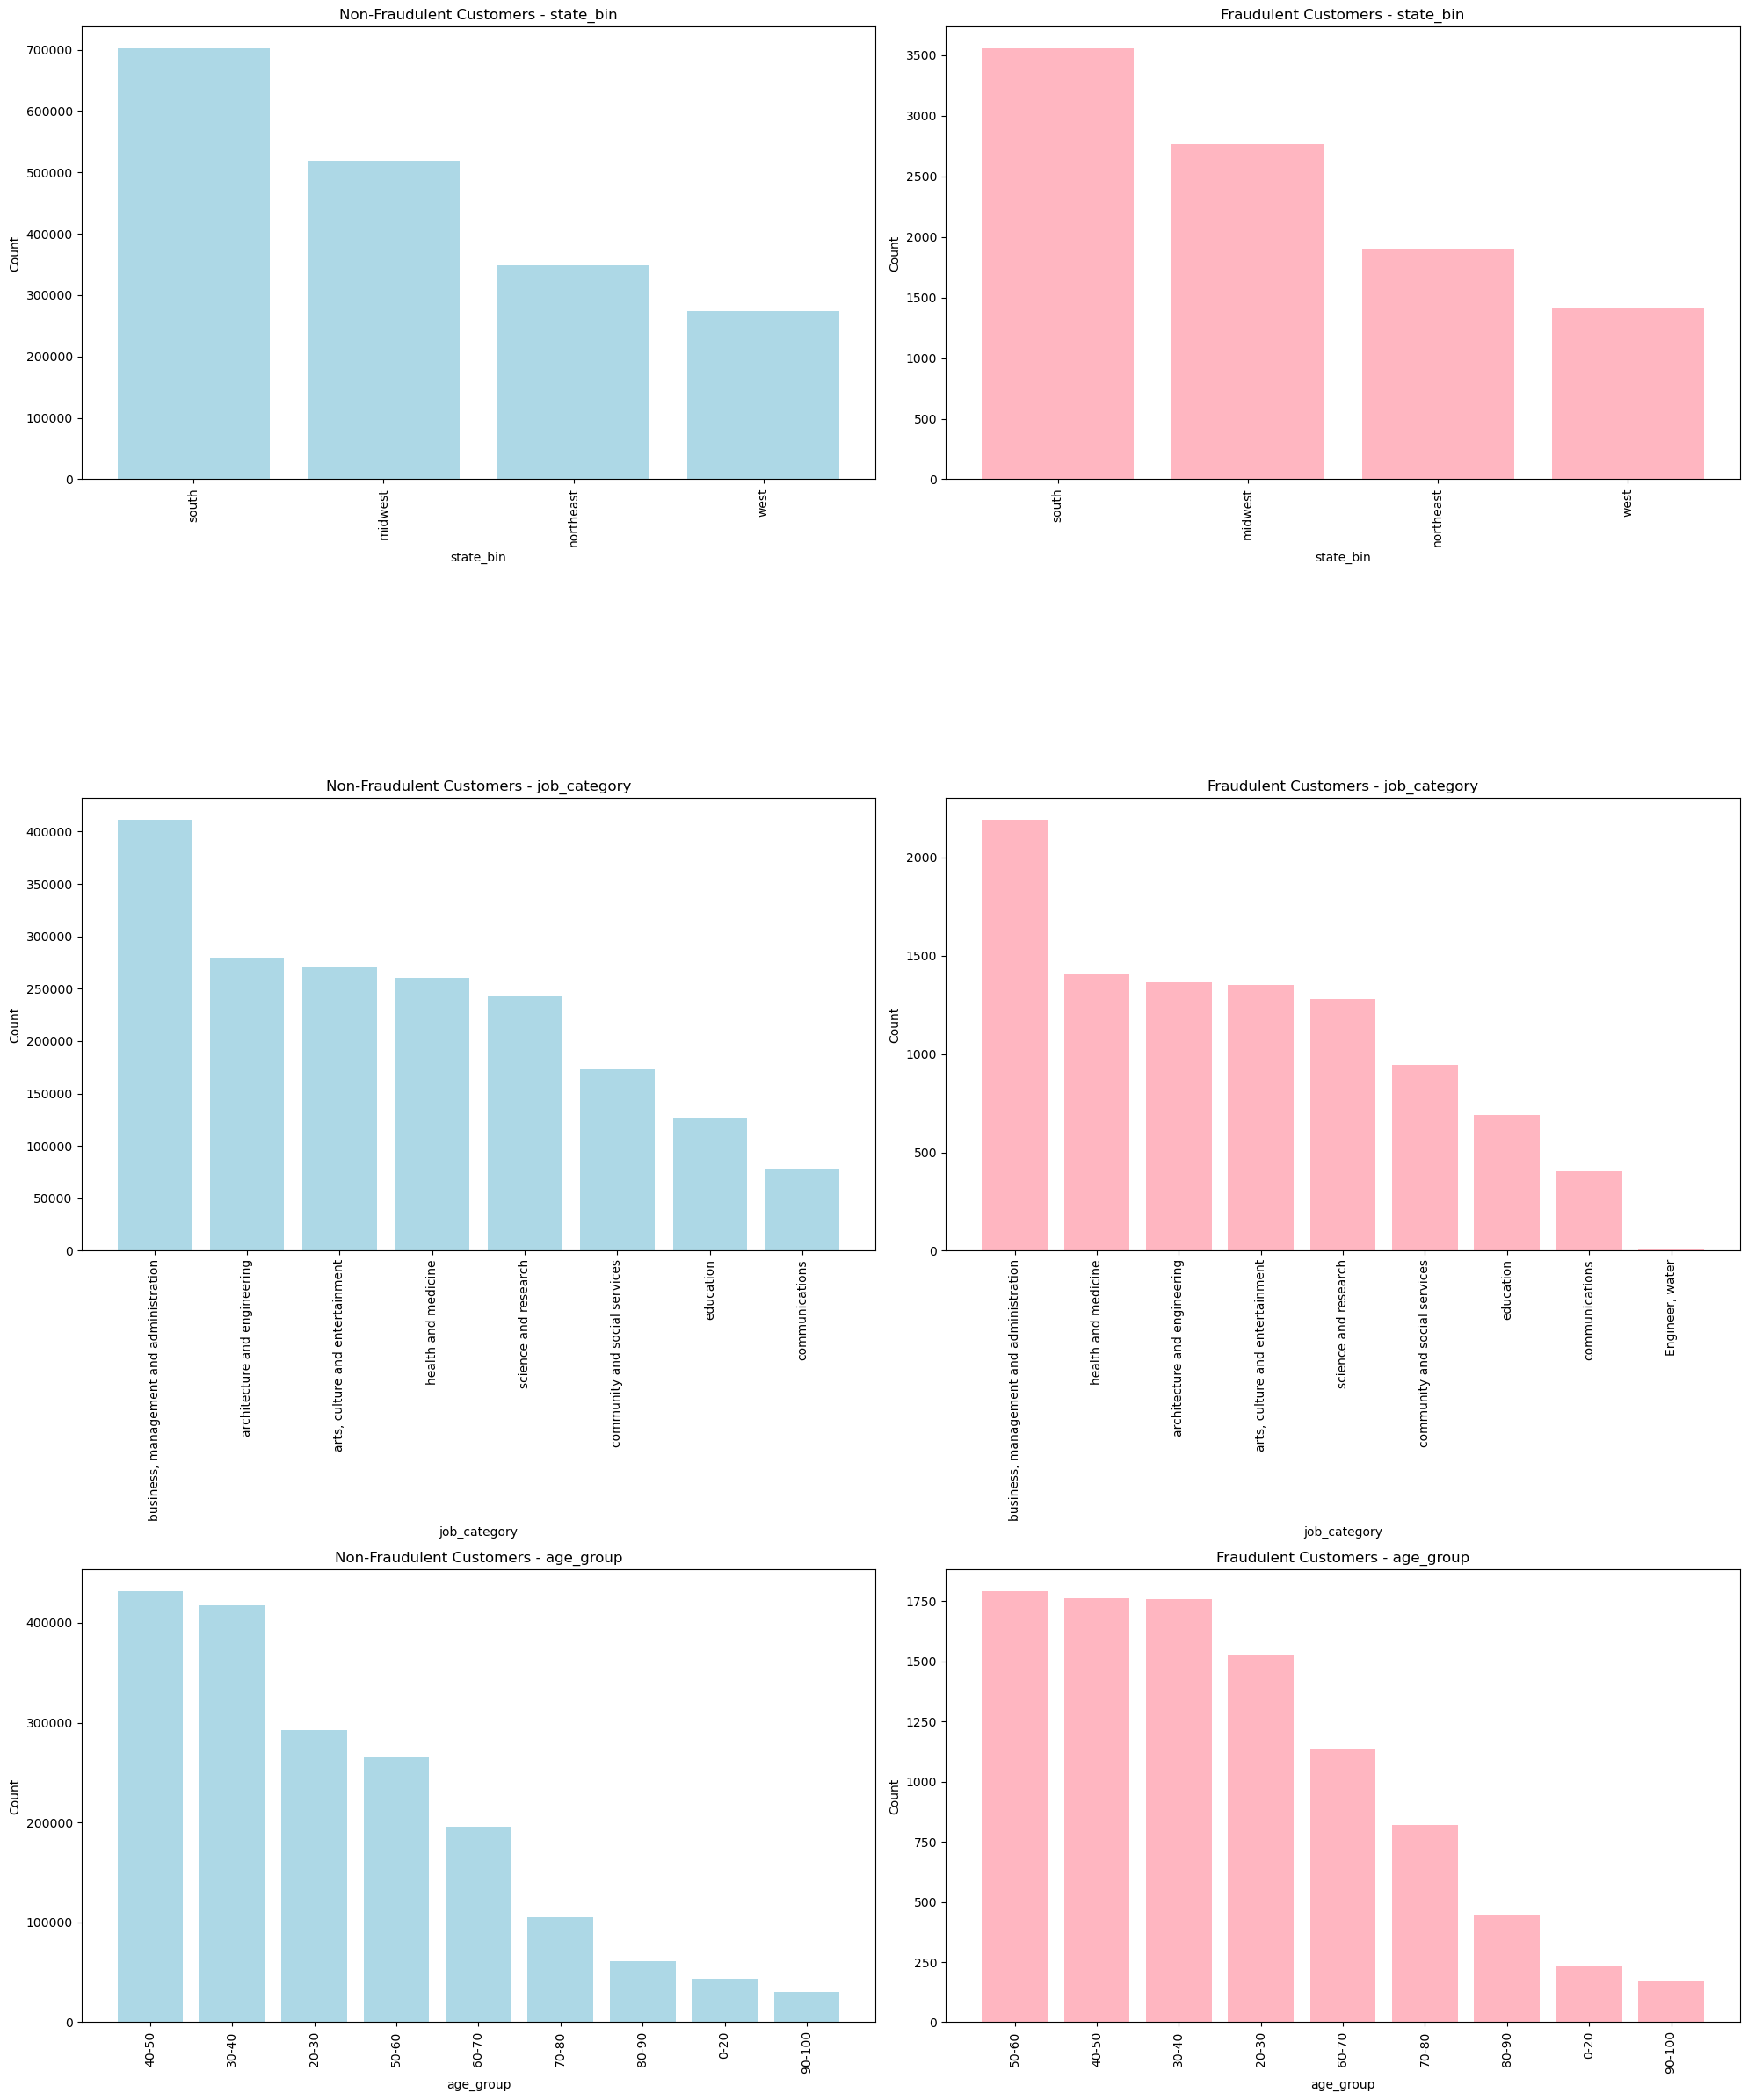

In [32]:
# Listing new categorised columns for plotting

columns_to_plot = ['state_bin', 'job_category', 'age_group']

# Plotting categorical variables against fraud vs. non-fraud instances in 'fraud_data'

plot_categorical_fraud_vs_non_fraud(fraud_data, columns_to_plot)

<pre>
Observations:
    
1. Southern states are predominant in both fraudulent and non-fraudulent transactions.
2. The job category "Business, management, and administration" is the most prevalent in both types of transactions.
3. Fraudulent transactions are most common among age groups 50-60 and 40-50, while non-fraudulent transactions peak in
   the age groups 40-50 and 30-40.
</pre>

In [33]:
# Calculating distance between credit card latitude, longitude to merchant latitude and longitude

def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = 6371 * c  # Earth radius in kilometers
    return round(distance)

# Apply haversine function to fraud_data

fraud_data['distance_km'] = fraud_data.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

# Displaying first few rows

fraud_data.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender            city state      lat      long  \
0       misc_net    4.97      F  Moravian Falls    NC  36.0788  -81.1781   
1    grocery_pos  107.23      F          Orient    WA  48.8878 -118.2105   
2  entertainment  220.11      M      Malad City    ID  42.1808 -112.2620   
3  gas_transport   45.00      M         Boulder    MT  46.2306 -112.1138   
4       misc_pos   41.96      M        Doe Hill    VA  38.4207  -79.4629   

   city_pop                             job_category        dob  \
0      3495                      health and medicine 1988-03-09   
1       149                                education 1978-06-21   
2      4154            community and social services 1962-01-19   
3      1939  business, management and administration 1967-01-12   
4        99  business, management and administration 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud state_bin transaction_date transaction_time  age  \
0         0     south       2019-01-01         00:00:18   30   
1         0      west       2019-01-01         00:00:44   40   
2         0      west       2019-01-01         00:00:51   56   
3         0      west       2019-01-01         00:01:16   51   
4         0     south       2019-01-01         00:03:06   32   

   transaction_year transaction_year_month  transaction_month  \
0              2019                2019-01                  1   
1              2019                2019-01                  1   
2              2019                2019-01                  1   
3              2019                2019-01                  1   
4              2019                2019-01                  1   

   transaction_date_day transaction_day  transaction_hour  \
0                     1         Tuesday                 0   
1                     1         Tuesday                 0   
2                     1         Tuesday                 0   
3                     1         Tuesday                 0   
4                     1         Tuesday                 0   

   time_since_prev_transaction age_group  distance_km  
0                          0.0     30-40           79  
1                          0.0     40-50           30  
2                          0.0     50-60          108  
3                          0.0     50-60           96  
4                          0.0     30-40           78

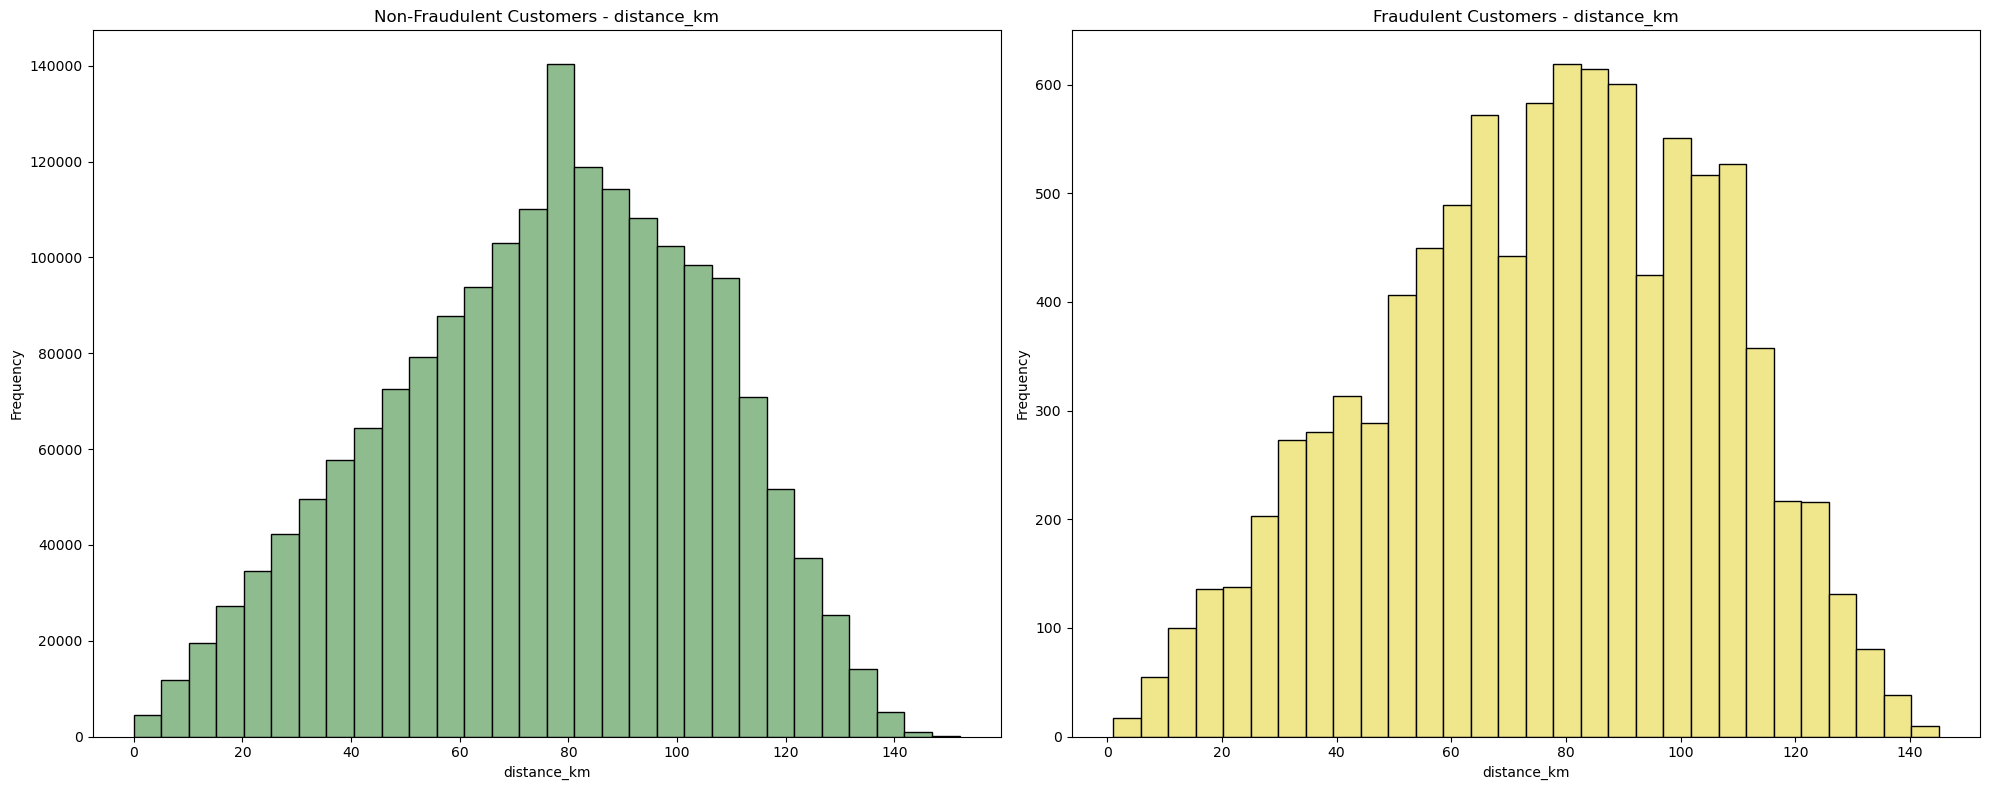

In [34]:
# Separating fraud and non-fraud data for distacne_km's analysis

non_fraud_data = fraud_data[fraud_data['is_fraud'] == 0]['distance_km']
fraud_data_fraud = fraud_data[fraud_data['is_fraud'] == 1]['distance_km']

# Creating subplots

plt.figure(figsize=(20, 8))

# Plotting histogram for non-fraudulent customers

plt.subplot(1, 2, 1)
plt.hist(non_fraud_data, bins=30, color='darkseagreen', edgecolor='black')
plt.title(f'Non-Fraudulent Customers - distance_km')
plt.xlabel('distance_km')
plt.ylabel('Frequency')

# Plotting histogram for fraudulent customers

plt.subplot(1, 2, 2)
plt.hist(fraud_data_fraud, bins=30, color='khaki', edgecolor='black')
plt.title(f'Fraudulent Customers - distance_km')
plt.xlabel('distance_km')
plt.ylabel('Frequency')

# Adjusting layout and display the plot

plt.tight_layout()
plt.show()

<pre>
Observation:

Non-fraudulent transactions primarily occur within a distance range of 75-80 km between the credit card and merchant locations. Conversely, fraudulent transactions tend to happen within a slightly broader distance range of 75-90 km.
</pre>

In [35]:
# Making copy of main data

hist_df = fraud_data.copy()

# Displaying first few rows of the data

hist_df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender            city state      lat      long  \
0       misc_net    4.97      F  Moravian Falls    NC  36.0788  -81.1781   
1    grocery_pos  107.23      F          Orient    WA  48.8878 -118.2105   
2  entertainment  220.11      M      Malad City    ID  42.1808 -112.2620   
3  gas_transport   45.00      M         Boulder    MT  46.2306 -112.1138   
4       misc_pos   41.96      M        Doe Hill    VA  38.4207  -79.4629   

   city_pop                             job_category        dob  \
0      3495                      health and medicine 1988-03-09   
1       149                                education 1978-06-21   
2      4154            community and social services 1962-01-19   
3      1939  business, management and administration 1967-01-12   
4        99  business, management and administration 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud state_bin transaction_date transaction_time  age  \
0         0     south       2019-01-01         00:00:18   30   
1         0      west       2019-01-01         00:00:44   40   
2         0      west       2019-01-01         00:00:51   56   
3         0      west       2019-01-01         00:01:16   51   
4         0     south       2019-01-01         00:03:06   32   

   transaction_year transaction_year_month  transaction_month  \
0              2019                2019-01                  1   
1              2019                2019-01                  1   
2              2019                2019-01                  1   
3              2019                2019-01                  1   
4              2019                2019-01                  1   

   transaction_date_day transaction_day  transaction_hour  \
0                     1         Tuesday                 0   
1                     1         Tuesday                 0   
2                     1         Tuesday                 0   
3                     1         Tuesday                 0   
4                     1         Tuesday                 0   

   time_since_prev_transaction age_group  distance_km  
0                          0.0     30-40           79  
1                          0.0     40-50           30  
2                          0.0     50-60          108  
3                          0.0     50-60           96  
4                          0.0     30-40           78

In [36]:
# Converting 'trans_date_trans_time' column to datetime index

hist_df.index = pd.to_datetime(hist_df['trans_date_trans_time'])

# Renaming index to 'time_index'

hist_df = hist_df.rename_axis(index={'trans_date_trans_time': 'time_index'})

# Sorting DataFrame by index (time)

hist_df = hist_df.sort_index()

# Displaying first few rows of data

hist_df.head()

trans_date_trans_time            cc_num  \
time_index                                                    
2019-01-01 00:00:18   2019-01-01 00:00:18  2703186189652095   
2019-01-01 00:00:44   2019-01-01 00:00:44      630423337322   
2019-01-01 00:00:51   2019-01-01 00:00:51    38859492057661   
2019-01-01 00:01:16   2019-01-01 00:01:16  3534093764340240   
2019-01-01 00:03:06   2019-01-01 00:03:06   375534208663984   

                                               merchant       category  \
time_index                                                               
2019-01-01 00:00:18          fraud_Rippin, Kub and Mann       misc_net   
2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme    grocery_pos   
2019-01-01 00:00:51                fraud_Lind-Buckridge  entertainment   
2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  gas_transport   
2019-01-01 00:03:06                 fraud_Keeling-Crist       misc_pos   

                        amt gender            city state      lat      long  \
time_index                                                                    
2019-01-01 00:00:18    4.97      F  Moravian Falls    NC  36.0788  -81.1781   
2019-01-01 00:00:44  107.23      F          Orient    WA  48.8878 -118.2105   
2019-01-01 00:00:51  220.11      M      Malad City    ID  42.1808 -112.2620   
2019-01-01 00:01:16   45.00      M         Boulder    MT  46.2306 -112.1138   
2019-01-01 00:03:06   41.96      M        Doe Hill    VA  38.4207  -79.4629   

                     city_pop                             job_category  \
time_index                                                               
2019-01-01 00:00:18      3495                      health and medicine   
2019-01-01 00:00:44       149                                education   
2019-01-01 00:00:51      4154            community and social services   
2019-01-01 00:01:16      1939  business, management and administration   
2019-01-01 00:03:06        99  business, management and administration   

                           dob                         trans_num   unix_time  \
time_index                                                                     
2019-01-01 00:00:18 1988-03-09  0b242abb623afc578575680df30655b9  1325376018   
2019-01-01 00:00:44 1978-06-21  1f76529f8574734946361c461b024d99  1325376044   
2019-01-01 00:00:51 1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051   
2019-01-01 00:01:16 1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076   
2019-01-01 00:03:06 1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186   

                     merch_lat  merch_long  is_fraud state_bin  \
time_index                                                       
2019-01-01 00:00:18  36.011293  -82.048315         0     south   
2019-01-01 00:00:44  49.159047 -118.186462         0      west   
2019-01-01 00:00:51  43.150704 -112.154481         0      west   
2019-01-01 00:01:16  47.034331 -112.561071         0      west   
2019-01-01 00:03:06  38.674999  -78.632459         0     south   

                    transaction_date transaction_time  age  transaction_year  \
time_index                                                                     
2019-01-01 00:00:18       2019-01-01         00:00:18   30              2019   
2019-01-01 00:00:44       2019-01-01         00:00:44   40              2019   
2019-01-01 00:00:51       2019-01-01         00:00:51   56              2019   
2019-01-01 00:01:16       2019-01-01         00:01:16   51              2019   
2019-01-01 00:03:06       2019-01-01         00:03:06   32              2019   

                    transaction_year_month  transaction_month  \
time_index                                                      
2019-01-01 00:00:18                2019-01                  1   
2019-01-01 00:00:44                2019-01                  1   
2019-01-01 00:00:51                2019-01                  1   
2019-01-01 00:01:16                2019-01                  1   
2019-01-01 

In [37]:
# Checking dimensions of the data

hist_df.shape

(1852394, 31)

In [38]:
# Adding a new column 'val_for_agg' with constant value 1 for aggregation purposes

hist_df['val_for_agg'] = 1

In [39]:
# Deriving historical variable of transactions for last 30 days 

df_hist_trans_30d = \
    hist_df \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('30D')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

# Renaming columns of DataFrame df_hist_trans_30d

df_hist_trans_30d.columns = ['cc_num','trans_date_trans_time','hist_trans_30d']

# Grouping DataFrame df_hist_trans_30d by 'cc_num' and 'trans_date_trans_time', then taking the minimum value of 'hist_trans_30d'

df_hist_trans_30d = df_hist_trans_30d.groupby(['cc_num','trans_date_trans_time'])['hist_trans_30d'].min().reset_index()

# Displaying first few rows

df_hist_trans_30d

cc_num trans_date_trans_time  hist_trans_30d
0                60416207185   2019-01-01 12:47:15             0.0
1                60416207185   2019-01-02 08:44:57             1.0
2                60416207185   2019-01-02 08:47:36             2.0
3                60416207185   2019-01-02 12:38:14             3.0
4                60416207185   2019-01-02 13:10:46             4.0
...                      ...                   ...             ...
1852345  4992346398065154184   2020-12-31 02:10:10           184.0
1852346  4992346398065154184   2020-12-31 05:13:35           185.0
1852347  4992346398065154184   2020-12-31 11:15:44           185.0
1852348  4992346398065154184   2020-12-31 11:17:25           182.0
1852349  4992346398065154184   2020-12-31 13:24:36           183.0

[1852350 rows x 3 columns]

In [40]:
# Checking dimension of the data

df_hist_trans_30d.shape

(1852350, 3)

In [41]:
# Deriving historical variable of transactions for last 24 hours 

df_hist_trans_24h = \
    hist_df \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

# Renaming columns of DataFrame df_hist_trans_24h

df_hist_trans_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']

# Grouping DataFrame df_hist_trans_24h by 'cc_num' and 'trans_date_trans_time', then taking the minimum value of 'df_hist_trans_24h'

df_hist_trans_24h = df_hist_trans_24h.groupby(['cc_num','trans_date_trans_time'])['hist_trans_24h'].min().reset_index()

# Displaying first few rows

df_hist_trans_24h

cc_num trans_date_trans_time  hist_trans_24h
0                60416207185   2019-01-01 12:47:15             0.0
1                60416207185   2019-01-02 08:44:57             1.0
2                60416207185   2019-01-02 08:47:36             2.0
3                60416207185   2019-01-02 12:38:14             3.0
4                60416207185   2019-01-02 13:10:46             4.0
...                      ...                   ...             ...
1852345  4992346398065154184   2020-12-31 02:10:10             7.0
1852346  4992346398065154184   2020-12-31 05:13:35             7.0
1852347  4992346398065154184   2020-12-31 11:15:44             7.0
1852348  4992346398065154184   2020-12-31 11:17:25             8.0
1852349  4992346398065154184   2020-12-31 13:24:36             9.0

[1852350 rows x 3 columns]

In [42]:
# Deriving historical variable for average amount spent in last 30 days

df_hist_trans_amt_avg_30d = \
    hist_df \
    .groupby(['cc_num'])['amt']\
    .rolling('30D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

# Renaming columns of dataframe df_hist_trans_amt_avg_30d

df_hist_trans_amt_avg_30d.columns = ['cc_num','trans_date_trans_time','hist_trans_avg_amt_30d']

# Grouping DataFrame df_hist_trans_amt_avg_30d by 'cc_num' and 'trans_date_trans_time', then taking the minimum value of 'df_hist_trans_amt_avg_30d'

df_hist_trans_amt_avg_30d = df_hist_trans_amt_avg_30d.groupby(['cc_num','trans_date_trans_time'])['hist_trans_avg_amt_30d'].min().reset_index()

# Displaying first few rows

df_hist_trans_amt_avg_30d

cc_num trans_date_trans_time  hist_trans_avg_amt_30d
0                60416207185   2019-01-01 12:47:15                0.000000
1                60416207185   2019-01-02 08:44:57                7.270000
2                60416207185   2019-01-02 08:47:36               30.105000
3                60416207185   2019-01-02 12:38:14               47.430000
4                60416207185   2019-01-02 13:10:46               44.270000
...                      ...                   ...                     ...
1852345  4992346398065154184   2020-12-31 02:10:10               73.768533
1852346  4992346398065154184   2020-12-31 05:13:35               73.727135
1852347  4992346398065154184   2020-12-31 11:15:44               73.734757
1852348  4992346398065154184   2020-12-31 11:17:25               73.884890
1852349  4992346398065154184   2020-12-31 13:24:36               74.297978

[1852350 rows x 3 columns]

In [43]:
# Deriving historical variable for average amount sepnt in last 24 hours

df_hist_trans_amt_avg_24h = \
    hist_df \
    .groupby(['cc_num'])['amt']\
    .rolling('24H')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

# Renaming columns of df_hist_trans_amt_avg_24h dataframe

df_hist_trans_amt_avg_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_avg_amt_24h']

# Grouping DataFrame df_hist_trans_amt_avg_24h by 'cc_num' and 'trans_date_trans_time', then taking the minimum value of 'df_hist_trans_amt_avg_24h'

df_hist_trans_amt_avg_24h = df_hist_trans_amt_avg_24h.groupby(['cc_num','trans_date_trans_time'])['hist_trans_avg_amt_24h'].min().reset_index()

# Displaying first few rows

df_hist_trans_amt_avg_24h

cc_num trans_date_trans_time  hist_trans_avg_amt_24h
0                60416207185   2019-01-01 12:47:15                0.000000
1                60416207185   2019-01-02 08:44:57                7.270000
2                60416207185   2019-01-02 08:47:36               30.105000
3                60416207185   2019-01-02 12:38:14               47.430000
4                60416207185   2019-01-02 13:10:46               44.270000
...                      ...                   ...                     ...
1852345  4992346398065154184   2020-12-31 02:10:10               95.651429
1852346  4992346398065154184   2020-12-31 05:13:35               91.812857
1852347  4992346398065154184   2020-12-31 11:15:44               84.262857
1852348  4992346398065154184   2020-12-31 11:17:25               85.725000
1852349  4992346398065154184   2020-12-31 13:24:36               92.808889

[1852350 rows x 3 columns]

In [44]:
# Merging Historical Variables to the main dataframe with Transactions by ['cc_num','trans_date_trans_time']

fraud_data=pd.merge(fraud_data, df_hist_trans_30d, on=['cc_num', 'trans_date_trans_time'], how= 'left')

fraud_data=pd.merge(fraud_data, df_hist_trans_24h, on=['cc_num', 'trans_date_trans_time'], how= 'left')

fraud_data=pd.merge(fraud_data, df_hist_trans_amt_avg_30d, on=['cc_num', 'trans_date_trans_time'], how= 'left')

fraud_data=pd.merge(fraud_data, df_hist_trans_amt_avg_24h, on=['cc_num', 'trans_date_trans_time'], how= 'left')

# Checking dimensions of dataset

fraud_data.shape

(1852394, 35)

In [45]:
# Displaying first few rows of dataset

fraud_data.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender            city state      lat      long  \
0       misc_net    4.97      F  Moravian Falls    NC  36.0788  -81.1781   
1    grocery_pos  107.23      F          Orient    WA  48.8878 -118.2105   
2  entertainment  220.11      M      Malad City    ID  42.1808 -112.2620   
3  gas_transport   45.00      M         Boulder    MT  46.2306 -112.1138   
4       misc_pos   41.96      M        Doe Hill    VA  38.4207  -79.4629   

   city_pop                             job_category        dob  \
0      3495                      health and medicine 1988-03-09   
1       149                                education 1978-06-21   
2      4154            community and social services 1962-01-19   
3      1939  business, management and administration 1967-01-12   
4        99  business, management and administration 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud state_bin transaction_date transaction_time  age  \
0         0     south       2019-01-01         00:00:18   30   
1         0      west       2019-01-01         00:00:44   40   
2         0      west       2019-01-01         00:00:51   56   
3         0      west       2019-01-01         00:01:16   51   
4         0     south       2019-01-01         00:03:06   32   

   transaction_year transaction_year_month  transaction_month  \
0              2019                2019-01                  1   
1              2019                2019-01                  1   
2              2019                2019-01                  1   
3              2019                2019-01                  1   
4              2019                2019-01                  1   

   transaction_date_day transaction_day  transaction_hour  \
0                     1         Tuesday                 0   
1                     1         Tuesday                 0   
2                     1         Tuesday                 0   
3                     1         Tuesday                 0   
4                     1         Tuesday                 0   

   time_since_prev_transaction age_group  distance_km  hist_trans_30d  \
0                          0.0     30-40           79           109.0   
1                          0.0     40-50           30            53.0   
2                          0.0     50-60          108             8.0   
3                          0.0     50-60           96           181.0   
4                          0.0     30-40           78           218.0   

   hist_trans_24h  hist_trans_avg_amt_30d  hist_trans_avg_amt_24h  
0             6.0               70.974587               95.641667  
1             1.0               50.883962               12.110000  
2             5.0              377.925000              445.778000  
3             5.0               59.307403               42.454000  
4             6.0               67.148991               78.120000

In [46]:
# Checking transactions for last 30 days for random credit card number with historical variable

df_hist_trans_30d[df_hist_trans_30d['cc_num']==630423337322]

cc_num trans_date_trans_time  hist_trans_30d
68155  630423337322   2019-01-01 00:00:44            53.0
68156  630423337322   2019-01-01 04:57:58             1.0
68157  630423337322   2019-01-01 06:24:47             2.0
68158  630423337322   2019-01-01 15:27:33             3.0
68159  630423337322   2019-01-01 16:26:25             4.0
...             ...                   ...             ...
72511  630423337322   2020-12-31 16:49:40           307.0
72512  630423337322   2020-12-31 22:14:48           306.0
72513  630423337322   2020-12-31 22:39:40           300.0
72514  630423337322   2020-12-31 23:11:11           301.0
72515  630423337322   2020-12-31 23:17:42           302.0

[4361 rows x 3 columns]

In [47]:
# Checking transactions for last 30 days for random credit card number with main data

fraud_data[fraud_data['cc_num']==630423337322]

trans_date_trans_time        cc_num  \
1         2019-01-01 00:00:44  630423337322   
374       2019-01-01 04:57:58  630423337322   
486       2019-01-01 06:24:47  630423337322   
1357      2019-01-01 15:27:33  630423337322   
1504      2019-01-01 16:26:25  630423337322   
...                       ...           ...   
1851156   2020-12-31 16:49:40  630423337322   
1852101   2020-12-31 22:14:48  630423337322   
1852176   2020-12-31 22:39:40  630423337322   
1852263   2020-12-31 23:11:11  630423337322   
1852279   2020-12-31 23:17:42  630423337322   

                                  merchant       category     amt gender  \
1          fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F   
374         fraud_Streich, Hansen and Veum  gas_transport   61.39      F   
486                       fraud_Harber Inc  gas_transport   94.48      F   
1357     fraud_Romaguera, Wehner and Tromp      kids_pets   92.48      F   
1504                 fraud_Hermann-Gaylord       misc_pos    1.93      F   
...                                    ...            ...     ...    ...   
1851156                 fraud_Kris-Padberg   shopping_pos    2.86      F   
1852101             fraud_Volkman-Predovic   shopping_net    4.42      F   
1852176                    fraud_Fahey Inc      kids_pets   15.36      F   
1852263  fraud_Nitzsche, Kessler and Wolff   shopping_pos    4.03      F   
1852279               fraud_White and Sons           home    6.49      F   

           city state      lat      long  city_pop job_category        dob  \
1        Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
374      Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
486      Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
1357     Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
1504     Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
...         ...   ...      ...       ...       ...          ...        ...   
1851156  Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
1852101  Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
1852176  Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
1852263  Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
1852279  Orient    WA  48.8878 -118.2105       149    education 1978-06-21   

                                trans_num   unix_time  merch_lat  merch_long  \
1        1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
374      9825a8292f6b25bb7d54b253bb3336f6  1325393878  48.394218 -117.363563   
486      c9235f76ecb45e67372d79ecac2ffb37  1325399087  49.513555 -117.819653   
1357     f16d17932951db1e8664b82c65fd0da9  1325431653  48.491798 -117.466434   
1504     04a953c9601dd378f92d2b77c342e436  1325435185  49.002189 -117.977232   
...                                   ...         ...        ...         ...   
1851156  55b0c424fe13efb5b4d7e4a5a1802c4a  1388508580  49.493476 -117.630467   
1852101  dbc7ad2cd617a7e74d3702caf58280e6  1388528088  49.750832 -117.291789   
1852176  c8293fa209d6a6bb5a6bbaf9f63034af  1388529580  49.089588 -118.147139   
1852263  3e900b6f181a803dbb2d5318cdcf83fc  1388531471  49.587481 -117.767540   
1852279  698732c2dfac4de0792d05130558bb5d  1388531862  48.292565 -117.388332   

         is_fraud state_bin transaction_date transaction_time  age  \
1               0      west       2019-01-01         00:00:44   40   
374             0      west       2019-01-01         04:57:58   40   
486             0      west       2019-01-01         06:24:47   40   
1357            0      west       2019-01-01         15:27:33   40   
1504            0      west       2019-01-01         16:26:25   40   
...           ...       ...              ...              ...  ...   
1851156         0      west       2020-12-31         16:49:40   42   
1852101         0      west       2020-12-31         22:14:48   42   
18

In [48]:
# Separating fraud and non-fruad data

fraud_df = fraud_data[fraud_data['is_fraud'] == 1]
non_fraud_df = fraud_data[fraud_data['is_fraud'] == 0]

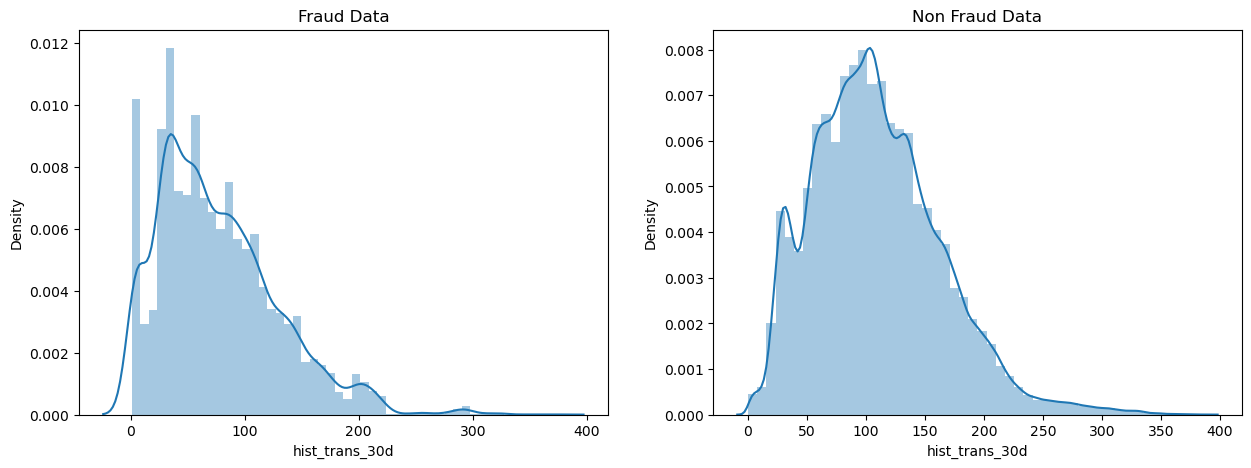

In [49]:
# Plotting transactions done in last 30 days for fraud and non-fraud data

fig= plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
sns.distplot(fraud_df['hist_trans_30d'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(non_fraud_df['hist_trans_30d'])
plt.title('Non Fraud Data')

plt.show()

<pre>
Observation:

Transactions conducted within the last 30 days, there is a lower density of amounts spent between 0-200 dollars in fraudulent transactions compared to non-fraudulent transactions.
</pre>

In [50]:
# Checking transactions for last 24 hours for random credit card number with historical variable

df_hist_trans_24h[df_hist_trans_24h['cc_num']==630423337322]

cc_num trans_date_trans_time  hist_trans_24h
68155  630423337322   2019-01-01 00:00:44             1.0
68156  630423337322   2019-01-01 04:57:58             1.0
68157  630423337322   2019-01-01 06:24:47             2.0
68158  630423337322   2019-01-01 15:27:33             3.0
68159  630423337322   2019-01-01 16:26:25             4.0
...             ...                   ...             ...
72511  630423337322   2020-12-31 16:49:40             9.0
72512  630423337322   2020-12-31 22:14:48            10.0
72513  630423337322   2020-12-31 22:39:40            10.0
72514  630423337322   2020-12-31 23:11:11            11.0
72515  630423337322   2020-12-31 23:17:42            12.0

[4361 rows x 3 columns]

In [51]:
# Checking transactions for last 24 hours for random credit card number with main data

fraud_data[fraud_data['cc_num']==630423337322]

trans_date_trans_time        cc_num  \
1         2019-01-01 00:00:44  630423337322   
374       2019-01-01 04:57:58  630423337322   
486       2019-01-01 06:24:47  630423337322   
1357      2019-01-01 15:27:33  630423337322   
1504      2019-01-01 16:26:25  630423337322   
...                       ...           ...   
1851156   2020-12-31 16:49:40  630423337322   
1852101   2020-12-31 22:14:48  630423337322   
1852176   2020-12-31 22:39:40  630423337322   
1852263   2020-12-31 23:11:11  630423337322   
1852279   2020-12-31 23:17:42  630423337322   

                                  merchant       category     amt gender  \
1          fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F   
374         fraud_Streich, Hansen and Veum  gas_transport   61.39      F   
486                       fraud_Harber Inc  gas_transport   94.48      F   
1357     fraud_Romaguera, Wehner and Tromp      kids_pets   92.48      F   
1504                 fraud_Hermann-Gaylord       misc_pos    1.93      F   
...                                    ...            ...     ...    ...   
1851156                 fraud_Kris-Padberg   shopping_pos    2.86      F   
1852101             fraud_Volkman-Predovic   shopping_net    4.42      F   
1852176                    fraud_Fahey Inc      kids_pets   15.36      F   
1852263  fraud_Nitzsche, Kessler and Wolff   shopping_pos    4.03      F   
1852279               fraud_White and Sons           home    6.49      F   

           city state      lat      long  city_pop job_category        dob  \
1        Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
374      Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
486      Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
1357     Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
1504     Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
...         ...   ...      ...       ...       ...          ...        ...   
1851156  Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
1852101  Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
1852176  Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
1852263  Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
1852279  Orient    WA  48.8878 -118.2105       149    education 1978-06-21   

                                trans_num   unix_time  merch_lat  merch_long  \
1        1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
374      9825a8292f6b25bb7d54b253bb3336f6  1325393878  48.394218 -117.363563   
486      c9235f76ecb45e67372d79ecac2ffb37  1325399087  49.513555 -117.819653   
1357     f16d17932951db1e8664b82c65fd0da9  1325431653  48.491798 -117.466434   
1504     04a953c9601dd378f92d2b77c342e436  1325435185  49.002189 -117.977232   
...                                   ...         ...        ...         ...   
1851156  55b0c424fe13efb5b4d7e4a5a1802c4a  1388508580  49.493476 -117.630467   
1852101  dbc7ad2cd617a7e74d3702caf58280e6  1388528088  49.750832 -117.291789   
1852176  c8293fa209d6a6bb5a6bbaf9f63034af  1388529580  49.089588 -118.147139   
1852263  3e900b6f181a803dbb2d5318cdcf83fc  1388531471  49.587481 -117.767540   
1852279  698732c2dfac4de0792d05130558bb5d  1388531862  48.292565 -117.388332   

         is_fraud state_bin transaction_date transaction_time  age  \
1               0      west       2019-01-01         00:00:44   40   
374             0      west       2019-01-01         04:57:58   40   
486             0      west       2019-01-01         06:24:47   40   
1357            0      west       2019-01-01         15:27:33   40   
1504            0      west       2019-01-01         16:26:25   40   
...           ...       ...              ...              ...  ...   
1851156         0      west       2020-12-31         16:49:40   42   
1852101         0      west       2020-12-31         22:14:48   42   
18

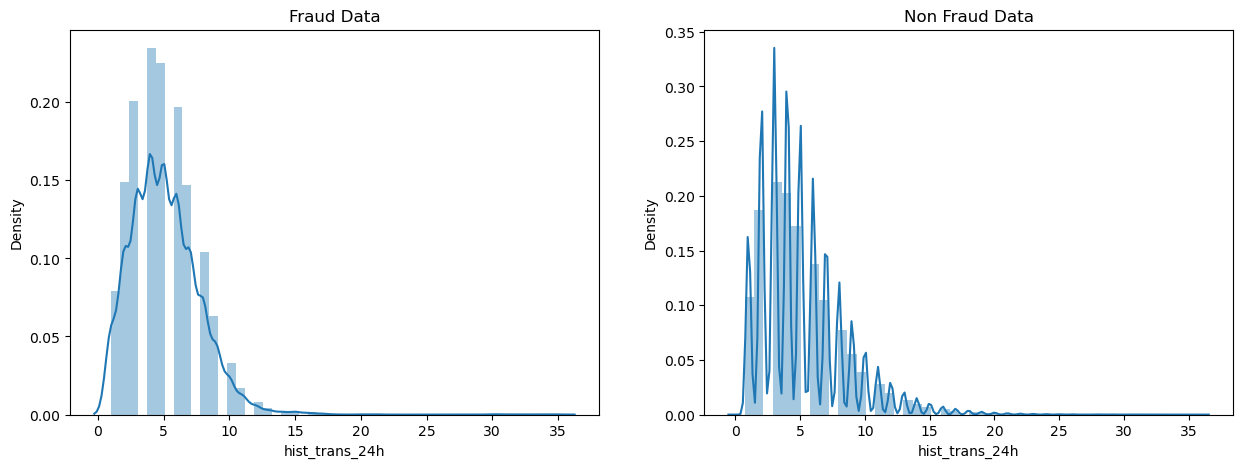

In [52]:
# Plotting transactions done in last 24 hours for fraud and non-fraud data

fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(fraud_df['hist_trans_24h'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(non_fraud_df['hist_trans_24h'])
plt.title('Non Fraud Data')

plt.show()

<pre>
Observation:

Transactions conducted within the last 24 hours, there is a higherTransactions conducted within the last 24 hours, there is a higher density of amounts spent between 0-15 dollars in fraudulent transactions compared to non-fraudulent transactions. density of amounts spent between 0-15 dollars in fraudulent transactions compared to non-fraudulent transactions.
</pre>

In [53]:
# Checking average amount spent for last 30 days for random credit card number with historical variable

df_hist_trans_amt_avg_30d[df_hist_trans_amt_avg_30d['cc_num']==630423337322]

cc_num trans_date_trans_time  hist_trans_avg_amt_30d
68155  630423337322   2019-01-01 00:00:44               50.883962
68156  630423337322   2019-01-01 04:57:58              107.230000
68157  630423337322   2019-01-01 06:24:47               84.310000
68158  630423337322   2019-01-01 15:27:33               87.700000
68159  630423337322   2019-01-01 16:26:25               88.895000
...             ...                   ...                     ...
72511  630423337322   2020-12-31 16:49:40               61.613127
72512  630423337322   2020-12-31 22:14:48               61.523105
72513  630423337322   2020-12-31 22:39:40               62.276367
72514  630423337322   2020-12-31 23:11:11               62.120498
72515  630423337322   2020-12-31 23:17:42               61.928146

[4361 rows x 3 columns]

In [54]:
# Checking average amount spent for last 30 days for random credit card number with main data

fraud_data[fraud_data['cc_num']==630423337322]

trans_date_trans_time        cc_num  \
1         2019-01-01 00:00:44  630423337322   
374       2019-01-01 04:57:58  630423337322   
486       2019-01-01 06:24:47  630423337322   
1357      2019-01-01 15:27:33  630423337322   
1504      2019-01-01 16:26:25  630423337322   
...                       ...           ...   
1851156   2020-12-31 16:49:40  630423337322   
1852101   2020-12-31 22:14:48  630423337322   
1852176   2020-12-31 22:39:40  630423337322   
1852263   2020-12-31 23:11:11  630423337322   
1852279   2020-12-31 23:17:42  630423337322   

                                  merchant       category     amt gender  \
1          fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F   
374         fraud_Streich, Hansen and Veum  gas_transport   61.39      F   
486                       fraud_Harber Inc  gas_transport   94.48      F   
1357     fraud_Romaguera, Wehner and Tromp      kids_pets   92.48      F   
1504                 fraud_Hermann-Gaylord       misc_pos    1.93      F   
...                                    ...            ...     ...    ...   
1851156                 fraud_Kris-Padberg   shopping_pos    2.86      F   
1852101             fraud_Volkman-Predovic   shopping_net    4.42      F   
1852176                    fraud_Fahey Inc      kids_pets   15.36      F   
1852263  fraud_Nitzsche, Kessler and Wolff   shopping_pos    4.03      F   
1852279               fraud_White and Sons           home    6.49      F   

           city state      lat      long  city_pop job_category        dob  \
1        Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
374      Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
486      Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
1357     Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
1504     Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
...         ...   ...      ...       ...       ...          ...        ...   
1851156  Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
1852101  Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
1852176  Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
1852263  Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
1852279  Orient    WA  48.8878 -118.2105       149    education 1978-06-21   

                                trans_num   unix_time  merch_lat  merch_long  \
1        1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
374      9825a8292f6b25bb7d54b253bb3336f6  1325393878  48.394218 -117.363563   
486      c9235f76ecb45e67372d79ecac2ffb37  1325399087  49.513555 -117.819653   
1357     f16d17932951db1e8664b82c65fd0da9  1325431653  48.491798 -117.466434   
1504     04a953c9601dd378f92d2b77c342e436  1325435185  49.002189 -117.977232   
...                                   ...         ...        ...         ...   
1851156  55b0c424fe13efb5b4d7e4a5a1802c4a  1388508580  49.493476 -117.630467   
1852101  dbc7ad2cd617a7e74d3702caf58280e6  1388528088  49.750832 -117.291789   
1852176  c8293fa209d6a6bb5a6bbaf9f63034af  1388529580  49.089588 -118.147139   
1852263  3e900b6f181a803dbb2d5318cdcf83fc  1388531471  49.587481 -117.767540   
1852279  698732c2dfac4de0792d05130558bb5d  1388531862  48.292565 -117.388332   

         is_fraud state_bin transaction_date transaction_time  age  \
1               0      west       2019-01-01         00:00:44   40   
374             0      west       2019-01-01         04:57:58   40   
486             0      west       2019-01-01         06:24:47   40   
1357            0      west       2019-01-01         15:27:33   40   
1504            0      west       2019-01-01         16:26:25   40   
...           ...       ...              ...              ...  ...   
1851156         0      west       2020-12-31         16:49:40   42   
1852101         0      west       2020-12-31         22:14:48   42   
18

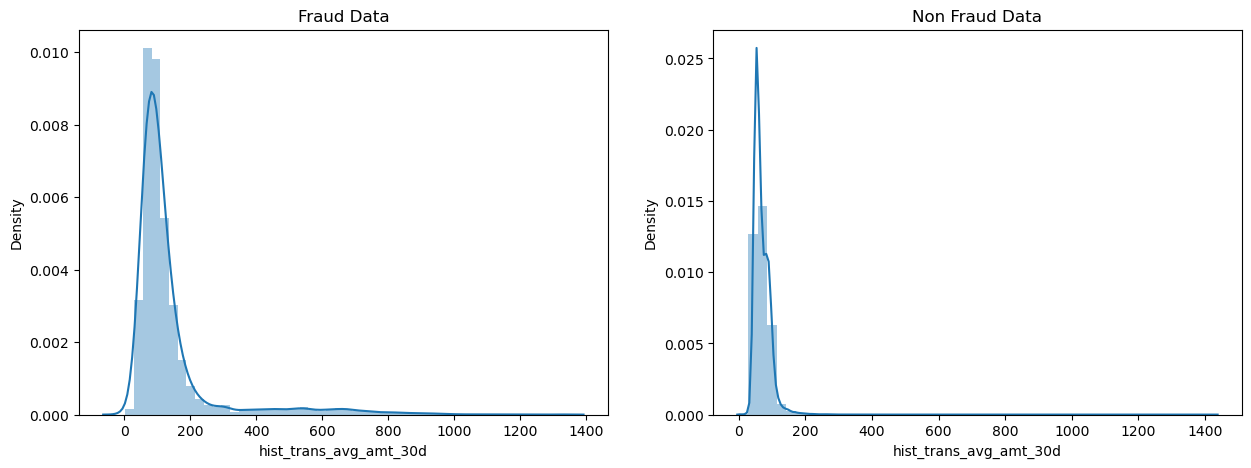

In [55]:
# Plotting average amount spent in last 30 days for fraud and non-fraud data

fig= plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
sns.distplot(fraud_df['hist_trans_avg_amt_30d'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(non_fraud_df['hist_trans_avg_amt_30d'])
plt.title('Non Fraud Data')

plt.show()

<pre>
Observation:

The average amount spent within the last 30 days shows a higher density of amounts spent between 0-200 dollars in fraudulent transactions compared to non-fraudulent transactions.
</pre>

In [56]:
# Checking average amount spent for last 24 hours for random credit card number with historical variable

df_hist_trans_amt_avg_24h[df_hist_trans_amt_avg_24h['cc_num']==630423337322]

cc_num trans_date_trans_time  hist_trans_avg_amt_24h
68155  630423337322   2019-01-01 00:00:44               12.110000
68156  630423337322   2019-01-01 04:57:58              107.230000
68157  630423337322   2019-01-01 06:24:47               84.310000
68158  630423337322   2019-01-01 15:27:33               87.700000
68159  630423337322   2019-01-01 16:26:25               88.895000
...             ...                   ...                     ...
72511  630423337322   2020-12-31 16:49:40              112.493333
72512  630423337322   2020-12-31 22:14:48              101.530000
72513  630423337322   2020-12-31 22:39:40              101.150000
72514  630423337322   2020-12-31 23:11:11               93.350909
72515  630423337322   2020-12-31 23:17:42               85.907500

[4361 rows x 3 columns]

In [57]:
# Checking average amount spent for last 24 hours for random credit card number with main data

fraud_data[fraud_data['cc_num']==630423337322]

trans_date_trans_time        cc_num  \
1         2019-01-01 00:00:44  630423337322   
374       2019-01-01 04:57:58  630423337322   
486       2019-01-01 06:24:47  630423337322   
1357      2019-01-01 15:27:33  630423337322   
1504      2019-01-01 16:26:25  630423337322   
...                       ...           ...   
1851156   2020-12-31 16:49:40  630423337322   
1852101   2020-12-31 22:14:48  630423337322   
1852176   2020-12-31 22:39:40  630423337322   
1852263   2020-12-31 23:11:11  630423337322   
1852279   2020-12-31 23:17:42  630423337322   

                                  merchant       category     amt gender  \
1          fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F   
374         fraud_Streich, Hansen and Veum  gas_transport   61.39      F   
486                       fraud_Harber Inc  gas_transport   94.48      F   
1357     fraud_Romaguera, Wehner and Tromp      kids_pets   92.48      F   
1504                 fraud_Hermann-Gaylord       misc_pos    1.93      F   
...                                    ...            ...     ...    ...   
1851156                 fraud_Kris-Padberg   shopping_pos    2.86      F   
1852101             fraud_Volkman-Predovic   shopping_net    4.42      F   
1852176                    fraud_Fahey Inc      kids_pets   15.36      F   
1852263  fraud_Nitzsche, Kessler and Wolff   shopping_pos    4.03      F   
1852279               fraud_White and Sons           home    6.49      F   

           city state      lat      long  city_pop job_category        dob  \
1        Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
374      Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
486      Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
1357     Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
1504     Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
...         ...   ...      ...       ...       ...          ...        ...   
1851156  Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
1852101  Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
1852176  Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
1852263  Orient    WA  48.8878 -118.2105       149    education 1978-06-21   
1852279  Orient    WA  48.8878 -118.2105       149    education 1978-06-21   

                                trans_num   unix_time  merch_lat  merch_long  \
1        1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
374      9825a8292f6b25bb7d54b253bb3336f6  1325393878  48.394218 -117.363563   
486      c9235f76ecb45e67372d79ecac2ffb37  1325399087  49.513555 -117.819653   
1357     f16d17932951db1e8664b82c65fd0da9  1325431653  48.491798 -117.466434   
1504     04a953c9601dd378f92d2b77c342e436  1325435185  49.002189 -117.977232   
...                                   ...         ...        ...         ...   
1851156  55b0c424fe13efb5b4d7e4a5a1802c4a  1388508580  49.493476 -117.630467   
1852101  dbc7ad2cd617a7e74d3702caf58280e6  1388528088  49.750832 -117.291789   
1852176  c8293fa209d6a6bb5a6bbaf9f63034af  1388529580  49.089588 -118.147139   
1852263  3e900b6f181a803dbb2d5318cdcf83fc  1388531471  49.587481 -117.767540   
1852279  698732c2dfac4de0792d05130558bb5d  1388531862  48.292565 -117.388332   

         is_fraud state_bin transaction_date transaction_time  age  \
1               0      west       2019-01-01         00:00:44   40   
374             0      west       2019-01-01         04:57:58   40   
486             0      west       2019-01-01         06:24:47   40   
1357            0      west       2019-01-01         15:27:33   40   
1504            0      west       2019-01-01         16:26:25   40   
...           ...       ...              ...              ...  ...   
1851156         0      west       2020-12-31         16:49:40   42   
1852101         0      west       2020-12-31         22:14:48   42   
18

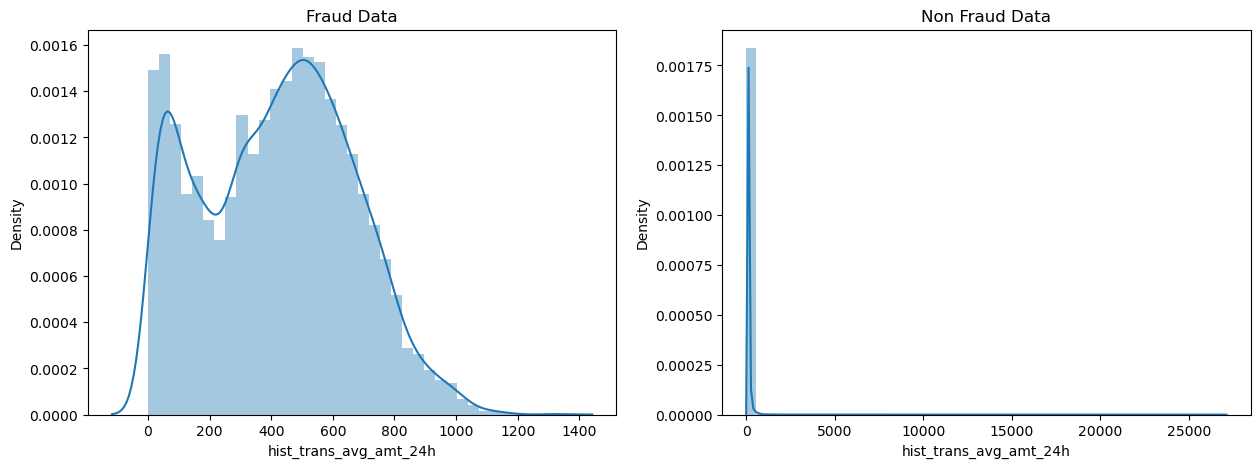

In [58]:
# Plotting average amount spent in last 24 hours for fraud and non-fraud data

fig= plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
sns.distplot(fraud_df['hist_trans_avg_amt_24h'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(non_fraud_df['hist_trans_avg_amt_24h'])
plt.title('Non Fraud Data')

plt.show()

<pre>
Observation:

The average amount spent within the last 24 hours shows a higher density of amounts spent between 0-200 dollars in fraudulent transactions compared to non-fraudulent transactions.
</pre>

In [59]:
# Checking for unique credit card holders

fraud_cc = pd.DataFrame(group_by_cc['is_fraud'].nunique())
print('Unique card holders:', fraud_cc.shape)

# Understanding the distribution of fraud labels across credit card holders

print('\nDistribution of fraud labels: \n')
fraud_cc['is_fraud'].value_counts(normalize=True)

Unique card holders: (999, 1)

Distribution of fraud labels: 



is_fraud
2    0.885886
1    0.114114
Name: proportion, dtype: float64

In [60]:
# Checking fraud and non-fraud percentage

round(fraud_data['is_fraud'].value_counts()/ len(fraud_data)*100)

is_fraud
0    99.0
1     1.0
Name: count, dtype: float64

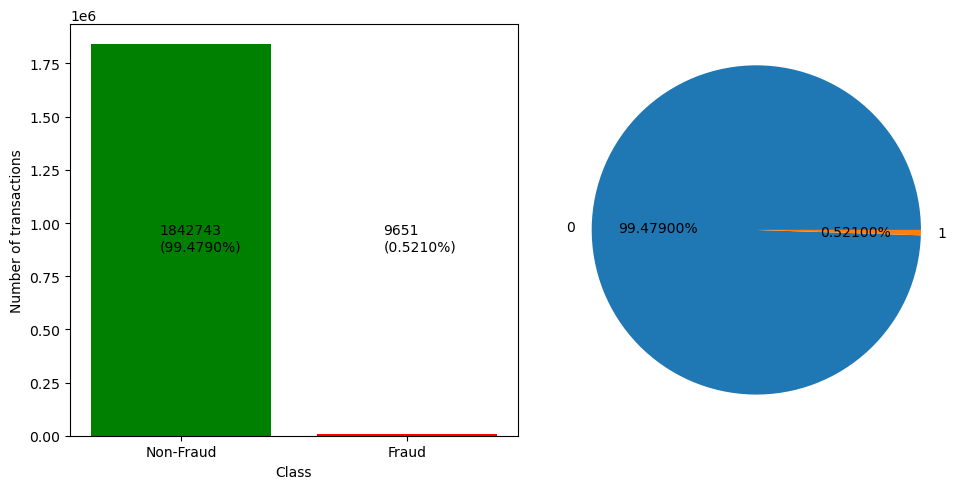

In [61]:
# Checking class imbalance

fig = plt.figure(figsize=(10, 5))

# Plotting the bar plot
plt.subplot(1, 2, 1)
plt.bar(['Non-Fraud', 'Fraud'], fraud_data['is_fraud'].value_counts(), color=['g', 'r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}\n({:.4f}%)'.format(fraud_data['is_fraud'].value_counts()[0], 
                                     fraud_data['is_fraud'].value_counts()[0] / fraud_data['is_fraud'].count() * 100),
             (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.4f}%)'.format(fraud_data['is_fraud'].value_counts()[1], 
                                     fraud_data['is_fraud'].value_counts()[1] / fraud_data['is_fraud'].count() * 100),
             (0.70, 0.45), xycoords='axes fraction')

# Plotting the pie chart
plt.subplot(1, 2, 2)
fraud_data["is_fraud"].value_counts().plot.pie(autopct="%1.5f%%")
plt.ylabel('')  # Remove the label for better visualization

# Show plots
plt.tight_layout()
plt.show()

<pre>
Observations:
    
1. The dataset comprises 1,852,394 transactions, among which 9,651 are identified as fraudulent.
2. This dataset exhibits a significant class imbalance, with fraudulent transactions representing only 0.52% of the
   total transactions.
3. Given the highly imbalanced nature of the dataset, it necessitates preprocessing before constructing a model.
</pre>

In [62]:
# Grouping fraud_df by 'transaction_year_month', counting unique values of 'trans_num' and 'cc_num', then resetting the index

df_timeline = fraud_df.groupby(fraud_df['transaction_year_month'])[['trans_num','cc_num']].nunique().reset_index()

# Renaming columns of DataFrame df_timeline

df_timeline.columns = ['transaction_year_month','num_of_fraud_transactions','fraud_customers']

# Displaying first few rows of dataframe

df_timeline.head()

transaction_year_month  num_of_fraud_transactions  fraud_customers
0                2019-01                        506               50
1                2019-02                        517               53
2                2019-03                        494               49
3                2019-04                        376               41
4                2019-05                        408               42

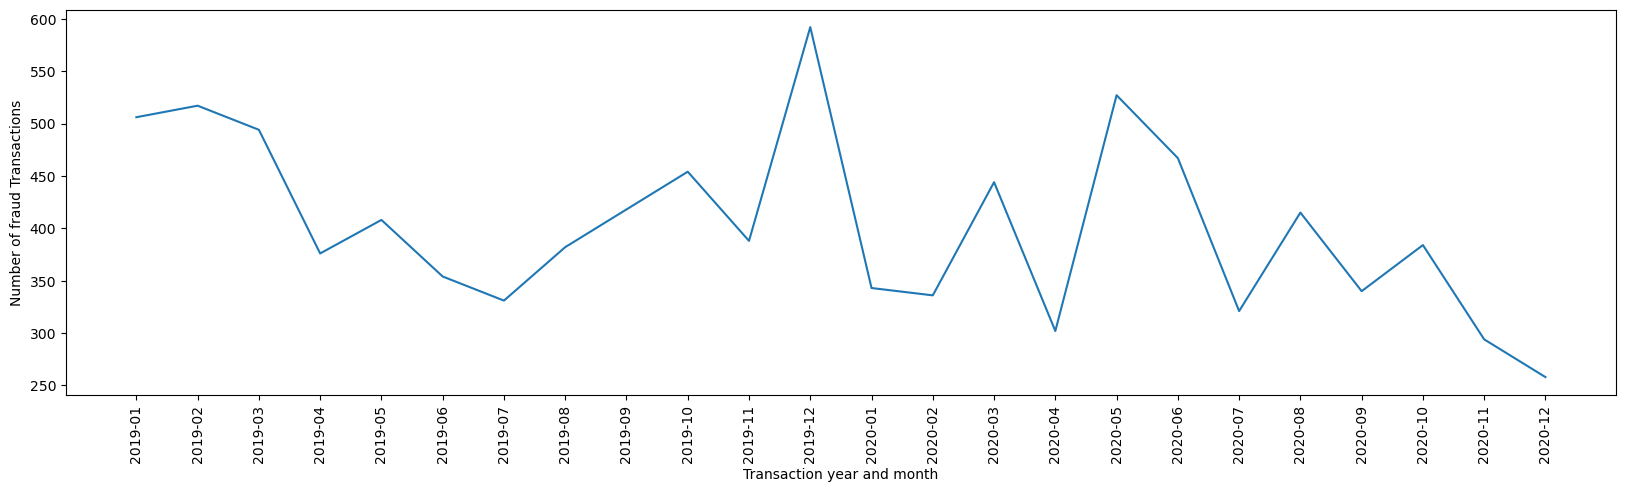

In [63]:
# Plotting number of fraud transactions over year and month

x = np.arange(0,len(df_timeline),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline['num_of_fraud_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline['transaction_year_month'], rotation = 90)

ax.set_xlabel('Transaction year and month')
ax.set_ylabel('Number of fraud Transactions')
plt.show()

<pre>
Observation:

As evident from this plot, fraudulent transactions reached their highest levels during New Year's Eve, notably in December 2019. Subsequent peaks were also observed in March, May, August, and October of 2020.
</pre>

### Step 5: Cost Benefit Analysis before building the model

In [65]:
# Checking dimensions of dataset

fraud_data.shape

(1852394, 35)

In [66]:
# Creating a pivot table from fraud_data DataFrame

df= pd.pivot_table(data=fraud_data, values='trans_num', index=pd.Grouper(key='transaction_date',
                                                    freq='1M'), columns='cc_num', aggfunc='count')

# Displaying first few rows of dataframe

df.head()

cc_num            60416207185          60422928733          \
transaction_date                                             
2019-01-31                       56.0                 49.0   
2019-02-28                       59.0                 60.0   
2019-03-31                       86.0                 90.0   
2019-04-30                      102.0                 96.0   
2019-05-31                       81.0                 91.0   

cc_num            60423098130          60427851591          \
transaction_date                                             
2019-01-31                       28.0                 24.0   
2019-02-28                       21.0                 19.0   
2019-03-31                       30.0                 30.0   
2019-04-30                       21.0                 44.0   
2019-05-31                       32.0                 26.0   

cc_num            60487002085          60490596305          \
transaction_date                                             
2019-01-31                       18.0                 39.0   
2019-02-28                       19.0                 40.0   
2019-03-31                       32.0                 59.0   
2019-04-30                       25.0                 54.0   
2019-05-31                       19.0                 57.0   

cc_num            60495593109          501802953619         \
transaction_date                                             
2019-01-31                       18.0                 60.0   
2019-02-28                       18.0                 57.0   
2019-03-31                       26.0                 93.0   
2019-04-30                       23.0                 87.0   
2019-05-31                       29.0                 74.0   

cc_num            501818133297         501828204849         \
transaction_date                                             
2019-01-31                        NaN                 20.0   
2019-02-28                        NaN                 20.0   
2019-03-31                        NaN                 33.0   
2019-04-30                        NaN                 28.0   
2019-05-31                        NaN                 28.0   

cc_num            501831082224         501851115094         \
transaction_date                                             
2019-01-31                       48.0                  NaN   
2019-02-28                       43.0                  NaN   
2019-03-31                       48.0                 15.0   
2019-04-30                       60.0                  NaN   
2019-05-31                       72.0                  NaN   

cc_num            501882822387         501894933032         \
transaction_date                                             
2019-01-31                       21.0                  NaN   
2019-02-28                       20.0                  NaN   
2019-03-31                       20.0                  NaN   
2019-04-30                       27.0                  NaN   
2019-05-31                       29.0                  NaN   

cc_num            501899453424         502012776709         \
transaction_date                                             
2019-01-31                       54.0                 76.0   
2019-02-28                       55.0                 82.0   
2019-03-31                       80.0                102.0   
2019-04-30                       80.0                 82.0   
2019-05-31                       92.0                110.0   

cc_num            502038091380         502049568400         \
transaction_date                                             
2019-01-31                       54.0                 50.0   
2019-02-28                       67.0                 39.0   
2019-03-31                       91.0                 67.0   
2019-04-30                       82.0                 51.0   
2019-05-31                       92.0                 49.0   

cc_num            503848303379         503851367360         \
transaction_date       

In [67]:
# Checking dimensions of dataset

fraud_data.shape

(1852394, 35)

In [68]:
# Calculating the average number of transactions per month

avg_num_of_trans_per_month = fraud_data.shape[0]/df.shape[0]
avg_num_of_trans_per_month

77183.08333333333

In [69]:
# Creating a pivot table from fraud_data DataFrame

df1= pd.pivot_table(data=fraud_df, values='trans_num', index=pd.Grouper(key='transaction_date', freq='1M'), columns='cc_num', aggfunc='count')

# Displaying first few rows

df1.head()

cc_num            60416207185          60422928733          \
transaction_date                                             
2019-01-31                        NaN                  NaN   
2019-02-28                        NaN                  NaN   
2019-03-31                        9.0                  NaN   
2019-04-30                        NaN                 12.0   
2019-05-31                        NaN                  NaN   

cc_num            60423098130          60427851591          \
transaction_date                                             
2019-01-31                        NaN                  NaN   
2019-02-28                        NaN                  NaN   
2019-03-31                       10.0                  NaN   
2019-04-30                        NaN                 14.0   
2019-05-31                        NaN                  NaN   

cc_num            60487002085          60490596305          \
transaction_date                                             
2019-01-31                        NaN                  NaN   
2019-02-28                        NaN                  NaN   
2019-03-31                        NaN                  NaN   
2019-04-30                        NaN                  NaN   
2019-05-31                        NaN                  NaN   

cc_num            60495593109          501802953619         \
transaction_date                                             
2019-01-31                        NaN                  NaN   
2019-02-28                        NaN                  NaN   
2019-03-31                        NaN                  NaN   
2019-04-30                        NaN                  NaN   
2019-05-31                        NaN                  NaN   

cc_num            501818133297         501828204849         \
transaction_date                                             
2019-01-31                        NaN                  NaN   
2019-02-28                        NaN                  NaN   
2019-03-31                        NaN                  NaN   
2019-04-30                        NaN                  NaN   
2019-05-31                        NaN                  NaN   

cc_num            501831082224         501851115094         \
transaction_date                                             
2019-01-31                        NaN                  NaN   
2019-02-28                        NaN                  NaN   
2019-03-31                        NaN                 15.0   
2019-04-30                        NaN                  NaN   
2019-05-31                        NaN                  NaN   

cc_num            501882822387         501894933032         \
transaction_date                                             
2019-01-31                        NaN                  NaN   
2019-02-28                        NaN                  NaN   
2019-03-31                        NaN                  NaN   
2019-04-30                        NaN                  NaN   
2019-05-31                        NaN                  NaN   

cc_num            501899453424         502012776709         \
transaction_date                                             
2019-01-31                        NaN                  NaN   
2019-02-28                        NaN                  NaN   
2019-03-31                        NaN                  NaN   
2019-04-30                        NaN                  NaN   
2019-05-31                        8.0                  NaN   

cc_num            502038091380         502049568400         \
transaction_date                                             
2019-01-31                        NaN                  NaN   
2019-02-28                        NaN                  NaN   
2019-03-31                        NaN                  NaN   
2019-04-30                        NaN                  NaN   
2019-05-31                        NaN                  NaN   

cc_num            503848303379         503851367360         \
transaction_date       

In [70]:
# Checking dimensions of dataset

df1.shape

(24, 976)

In [71]:
# Calculating average number of fraud transactions per month

avg_num_of_fraud_trans_per_month = fraud_df.shape[0]/df1.shape[0]
avg_num_of_fraud_trans_per_month

402.125

In [72]:
# Checking dimensions of dataset

fraud_df.shape

(9651, 35)

In [73]:
# Creating a pivot table from fraud_data DataFrame

df2= pd.pivot_table(data=fraud_df, values='amt', index=pd.Grouper(key='transaction_date', freq='1M'), columns='cc_num', aggfunc='sum')

# Displaying first few rows of dataframe

df2.head()

cc_num            60416207185          60422928733          \
transaction_date                                             
2019-01-31                        NaN                  NaN   
2019-02-28                        NaN                  NaN   
2019-03-31                    1899.73                  NaN   
2019-04-30                        NaN              7500.18   
2019-05-31                        NaN                  NaN   

cc_num            60423098130          60427851591          \
transaction_date                                             
2019-01-31                        NaN                  NaN   
2019-02-28                        NaN                  NaN   
2019-03-31                    4598.08                  NaN   
2019-04-30                        NaN              9645.79   
2019-05-31                        NaN                  NaN   

cc_num            60487002085          60490596305          \
transaction_date                                             
2019-01-31                        NaN                  NaN   
2019-02-28                        NaN                  NaN   
2019-03-31                        NaN                  NaN   
2019-04-30                        NaN                  NaN   
2019-05-31                        NaN                  NaN   

cc_num            60495593109          501802953619         \
transaction_date                                             
2019-01-31                        NaN                  NaN   
2019-02-28                        NaN                  NaN   
2019-03-31                        NaN                  NaN   
2019-04-30                        NaN                  NaN   
2019-05-31                        NaN                  NaN   

cc_num            501818133297         501828204849         \
transaction_date                                             
2019-01-31                        NaN                  NaN   
2019-02-28                        NaN                  NaN   
2019-03-31                        NaN                  NaN   
2019-04-30                        NaN                  NaN   
2019-05-31                        NaN                  NaN   

cc_num            501831082224         501851115094         \
transaction_date                                             
2019-01-31                        NaN                  NaN   
2019-02-28                        NaN                  NaN   
2019-03-31                        NaN              6467.81   
2019-04-30                        NaN                  NaN   
2019-05-31                        NaN                  NaN   

cc_num            501882822387         501894933032         \
transaction_date                                             
2019-01-31                        NaN                  NaN   
2019-02-28                        NaN                  NaN   
2019-03-31                        NaN                  NaN   
2019-04-30                        NaN                  NaN   
2019-05-31                        NaN                  NaN   

cc_num            501899453424         502012776709         \
transaction_date                                             
2019-01-31                        NaN                  NaN   
2019-02-28                        NaN                  NaN   
2019-03-31                        NaN                  NaN   
2019-04-30                        NaN                  NaN   
2019-05-31                    3217.94                  NaN   

cc_num            502038091380         502049568400         \
transaction_date                                             
2019-01-31                        NaN                  NaN   
2019-02-28                        NaN                  NaN   
2019-03-31                        NaN                  NaN   
2019-04-30                        NaN                  NaN   
2019-05-31                        NaN                  NaN   

cc_num            503848303379         503851367360         \
transaction_date       

In [74]:
# Checking dimensions of dataset

df2.shape

(24, 976)

In [75]:
# Checking dimensions of dataset

fraud_df.shape

(9651, 35)

In [76]:
# Calculating total amount

total_amt=fraud_df['amt'].sum()
total_amt

5121413.290000001

In [77]:
# Calculating average amount per fraud transaction

avg_amt_per_fraud_trans = total_amt/fraud_df.shape[0]
avg_amt_per_fraud_trans

530.661412288882

In [78]:
# Creating report-like view
report_view = """

Fraud Detection Report (Cost Benefit Analysis before builing model)
--------------------------------------------------------------------

Metrics:

- Average number of transactions per month: {:.2f}
- Average number of fraud transactions per month: {:.2f}
- Total amount: ${:.2f}
- Average amount per fraud transaction: ${:.2f}
""".format(avg_num_of_trans_per_month, avg_num_of_fraud_trans_per_month, total_amt, avg_amt_per_fraud_trans)

# Print report
print(report_view)



Fraud Detection Report (Cost Benefit Analysis before builing model)
--------------------------------------------------------------------

Metrics:

- Average number of transactions per month: 77183.08
- Average number of fraud transactions per month: 402.12
- Total amount: $5121413.29
- Average amount per fraud transaction: $530.66



### Step 6: Data Modeling

In [79]:
# Dropping unecessary columns

fraud_data= fraud_data.drop(['merch_lat','merch_long','age_group','transaction_date','unix_time', 'transaction_date_day','transaction_year_month','transaction_time',
                                                            'trans_date_trans_time','dob', 'state_bin'],axis=1)

# Checking dimensions of dataset

fraud_data.shape

(1852394, 24)

In [80]:
# Displaying summary information about the fraud_data DataFrame

fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 24 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   cc_num                       int64  
 1   merchant                     object 
 2   category                     object 
 3   amt                          float64
 4   gender                       object 
 5   city                         object 
 6   state                        object 
 7   lat                          float64
 8   long                         float64
 9   city_pop                     int64  
 10  job_category                 object 
 11  trans_num                    object 
 12  is_fraud                     int64  
 13  age                          int32  
 14  transaction_year             int32  
 15  transaction_month            int32  
 16  transaction_day              object 
 17  transaction_hour             int32  
 18  time_since_prev_transaction  float64
 19  

In [81]:
# Creating a dummy variable for 'Category' variable and dropping the first one.
catgory_dummy = pd.get_dummies(fraud_data['category'], drop_first=True, prefix='catg')

# Creating a dummy variable for 'Gender' variable and dropping the first one.
gender_dummy = pd.get_dummies(fraud_data['gender'], drop_first=True, prefix='gender')

# Creating a dummy variable for 'Gender' variable and dropping the first one.
job_dummy = pd.get_dummies(fraud_data['job_category'], drop_first=True, prefix='job')

# Creating a dummy variable for 'Weekday' variable and dropping the first one.
day_dummy = pd.get_dummies(fraud_data['transaction_day'], drop_first=True, prefix='day')

# Creating a dummy variable for 'Month' variable and dropping the first one.
month_dummy = pd.get_dummies(fraud_data['transaction_month'], drop_first=True, prefix='month')

# Creating a dummy variable for 'Year' variable and dropping the first one.
year_dummy = pd.get_dummies(fraud_data['transaction_year'], drop_first=True, prefix='year')

# Adding the results to the master dataframe
fraud_data = pd.concat([fraud_data, catgory_dummy, gender_dummy, job_dummy, day_dummy, month_dummy, year_dummy], axis=1)

# We have created dummies for the variable, so we can drop them
fraud_data= fraud_data.drop(['category', 'gender', 'job_category','transaction_day', 'transaction_month', 'transaction_year'], axis=1)

fraud_data.shape

(1852394, 58)

In [82]:
# Checking first few rows of dataset

fraud_data.head()

cc_num                            merchant     amt  \
0  2703186189652095          fraud_Rippin, Kub and Mann    4.97   
1      630423337322     fraud_Heller, Gutmann and Zieme  107.23   
2    38859492057661                fraud_Lind-Buckridge  220.11   
3  3534093764340240  fraud_Kutch, Hermiston and Farrell   45.00   
4   375534208663984                 fraud_Keeling-Crist   41.96   

             city state      lat      long  city_pop  \
0  Moravian Falls    NC  36.0788  -81.1781      3495   
1          Orient    WA  48.8878 -118.2105       149   
2      Malad City    ID  42.1808 -112.2620      4154   
3         Boulder    MT  46.2306 -112.1138      1939   
4        Doe Hill    VA  38.4207  -79.4629        99   

                          trans_num  is_fraud  age  transaction_hour  \
0  0b242abb623afc578575680df30655b9         0   30                 0   
1  1f76529f8574734946361c461b024d99         0   40                 0   
2  a1a22d70485983eac12b5b88dad1cf95         0   56                 0   
3  6b849c168bdad6f867558c3793159a81         0   51                 0   
4  a41d7549acf90789359a9aa5346dcb46         0   32                 0   

   time_since_prev_transaction  distance_km  hist_trans_30d  hist_trans_24h  \
0                          0.0           79           109.0             6.0   
1                          0.0           30            53.0             1.0   
2                          0.0          108             8.0             5.0   
3                          0.0           96           181.0             5.0   
4                          0.0           78           218.0             6.0   

   hist_trans_avg_amt_30d  hist_trans_avg_amt_24h  catg_food_dining  \
0               70.974587               95.641667             False   
1               50.883962               12.110000             False   
2              377.925000              445.778000             False   
3               59.307403               42.454000             False   
4               67.148991               78.120000             False   

   catg_gas_transport  catg_grocery_net  catg_grocery_pos  \
0               False             False             False   
1               False             False              True   
2               False             False             False   
3                True             False             False   
4               False             False             False   

   catg_health_fitness  catg_home  catg_kids_pets  catg_misc_net  \
0                False      False           False           True   
1                False      False           False          False   
2                False      False           False          False   
3                False      False           False          False   
4                False      False           False          False   

   catg_misc_pos  catg_personal_care  catg_shopping_net  catg_shopping_pos  \
0          False               False              False              False   
1          False               False              False              False   
2          False               False              False              False   
3          False               False              False              False   
4           True               False              False              False   

   catg_travel  gender_M  job_architecture and engineering  \
0        False     False                             False   
1        False     False                             False   
2        False      True                             False   
3        False      True                             False   
4        False      True                             False   

   job_arts, culture and entertainment  \
0                                False   
1                                False   
2                                False   
3                                False   
4                                False   

   job_business, management and administration  job_communications 

In [83]:
# Encoding labels for required columns

label_encoder = LabelEncoder()

fraud_data['state']= label_encoder.fit_transform(fraud_data['state'])
fraud_data['merchant']= label_encoder.fit_transform(fraud_data['merchant'])
fraud_data['city']= label_encoder.fit_transform(fraud_data['city'])

In [84]:
# Checking first few rows of dataset

fraud_data.head()

cc_num  merchant     amt  city  state      lat      long  \
0  2703186189652095       514    4.97   532     27  36.0788  -81.1781   
1      630423337322       241  107.23   619     47  48.8878 -118.2105   
2    38859492057661       390  220.11   474     13  42.1808 -112.2620   
3  3534093764340240       360   45.00    84     26  46.2306 -112.1138   
4   375534208663984       297   41.96   217     45  38.4207  -79.4629   

   city_pop                         trans_num  is_fraud  age  \
0      3495  0b242abb623afc578575680df30655b9         0   30   
1       149  1f76529f8574734946361c461b024d99         0   40   
2      4154  a1a22d70485983eac12b5b88dad1cf95         0   56   
3      1939  6b849c168bdad6f867558c3793159a81         0   51   
4        99  a41d7549acf90789359a9aa5346dcb46         0   32   

   transaction_hour  time_since_prev_transaction  distance_km  hist_trans_30d  \
0                 0                          0.0           79           109.0   
1                 0                          0.0           30            53.0   
2                 0                          0.0          108             8.0   
3                 0                          0.0           96           181.0   
4                 0                          0.0           78           218.0   

   hist_trans_24h  hist_trans_avg_amt_30d  hist_trans_avg_amt_24h  \
0             6.0               70.974587               95.641667   
1             1.0               50.883962               12.110000   
2             5.0              377.925000              445.778000   
3             5.0               59.307403               42.454000   
4             6.0               67.148991               78.120000   

   catg_food_dining  catg_gas_transport  catg_grocery_net  catg_grocery_pos  \
0             False               False             False             False   
1             False               False             False              True   
2             False               False             False             False   
3             False                True             False             False   
4             False               False             False             False   

   catg_health_fitness  catg_home  catg_kids_pets  catg_misc_net  \
0                False      False           False           True   
1                False      False           False          False   
2                False      False           False          False   
3                False      False           False          False   
4                False      False           False          False   

   catg_misc_pos  catg_personal_care  catg_shopping_net  catg_shopping_pos  \
0          False               False              False              False   
1          False               False              False              False   
2          False               False              False              False   
3          False               False              False              False   
4           True               False              False              False   

   catg_travel  gender_M  job_architecture and engineering  \
0        False     False                             False   
1        False     False                             False   
2        False      True                             False   
3        False      True                             False   
4        False      True                             False   

   job_arts, culture and entertainment  \
0                                False   
1                                False   
2                                False   
3                                False   
4                                False   

   job_business, management and administration  job_communications  \
0                                        False               False   
1                                        False               False   
2                                        False               False   
3                           

In [85]:
# Displaying summary information about the fraud_data DataFrame

fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 58 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   cc_num                                       int64  
 1   merchant                                     int64  
 2   amt                                          float64
 3   city                                         int64  
 4   state                                        int64  
 5   lat                                          float64
 6   long                                         float64
 7   city_pop                                     int64  
 8   trans_num                                    object 
 9   is_fraud                                     int64  
 10  age                                          int32  
 11  transaction_hour                             int32  
 12  time_since_prev_transaction                  float64
 13  distance_km 

In [86]:
# Assigning independent variables to X and dropping unecessary columns

X = fraud_data.drop(['is_fraud', 'cc_num', 'trans_num'], axis = 1)

# Assigning target variable to y

y = fraud_data['is_fraud']

In [87]:
# Splitting train and test data set

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,stratify = y,random_state=100)

# Checking dimensions of dataset

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (1296675, 55)
y_train:  (1296675,)
X_test:  (555719, 55)
y_test:  (555719,)


In [88]:
# Checking value counts of y_train dataset

y_train.value_counts(normalize=True)

is_fraud
0    0.99479
1    0.00521
Name: proportion, dtype: float64

In [89]:
# Checking value counts of y_test dataset

y_test.value_counts(normalize=True)

is_fraud
0    0.994791
1    0.005209
Name: proportion, dtype: float64

In [90]:
# Checking counts of label 0 & 1 before SMOTE

print("Before SMOTE, counts of label '0'&'1': {} \n".format(sorted(Counter(y_train).items())))

# SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)

X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)

# Checking counts of label 0 & 1 after SMOTE

print("After SMOTE, counts of label '0'&'1': {} \n".format(sorted(Counter(y_resampled_smt).items())))

print(len(X_resampled_smt))

Before SMOTE, counts of label '0'&'1': [(0, 1289919), (1, 6756)] 

After SMOTE, counts of label '0'&'1': [(0, 1289919), (1, 1289919)] 

2579838


In [91]:
# Checking counts of label 0 & 1 before ADASYN

print("Before ADASYN, counts of label '0'&'1': {} \n".format(sorted(Counter(y_train).items())))

# ADASYN

ada = ADASYN(random_state=45, n_neighbors=5)

# Checking counts of label 0 & 1 before ADASYN

X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)

print("After ADASYN, counts of label '0'&'1': {} \n".format(sorted(Counter(y_resampled_ada).items())))

print(len(X_resampled_ada))

Before ADASYN, counts of label '0'&'1': [(0, 1289919), (1, 6756)] 

After ADASYN, counts of label '0'&'1': [(0, 1289919), (1, 1290301)] 

2580220


### Step 7: Model Building

#### Model1 : Decision Tree with default paramaters using SMOTE data

In [92]:
# Creating a DecisionTreeClassifier instance with default parameters

dt_smt_default = DecisionTreeClassifier(random_state=42)

In [93]:
# Fitting the Decision Tree model with the SMOTE resampled data

dt_smt_default.fit(X_resampled_smt, y_resampled_smt)

DecisionTreeClassifier(random_state=42)

In [94]:
# Making predictions on the resampled training data using the Decision Tree model

y_train_pred_dt_smt = dt_smt_default.predict(X_resampled_smt)

# Making predictions on the test data using the Decision Tree model

y_test_pred_dt_smt = dt_smt_default.predict(X_test)

In [95]:
# Printing the classification report for predictions on the resampled training data

print(classification_report(y_resampled_smt, y_train_pred_dt_smt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838



In [96]:
def calculate_classification_metrics(confusion_matrix):
    TN = confusion_matrix[0, 0]  # true negatives
    TP = confusion_matrix[1, 1]  # true positives
    FP = confusion_matrix[0, 1]  # false positives
    FN = confusion_matrix[1, 0]  # false negatives

    sensitivity = TP / float(TP + FN)
    specificity = TN / float(TN + FP)
    false_positive_rate = FP / float(TN + FP)
    positive_predictive_value = TP / float(TP + FP)
    negative_predictive_value = TN / float(TN + FN)

    return sensitivity, specificity, false_positive_rate, positive_predictive_value, negative_predictive_value

def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_test_pred = model.predict(X_test)
    # Calculate probabilities
    pred_probs_test = model.predict_proba(X_test)[:,1]

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)

    # Calculate confusion matrix
    confusion = confusion_matrix(y_test, y_test_pred)

    # Calculate classification metrics
    sensitivity, specificity, false_positive_rate, positive_predictive_value, negative_predictive_value = calculate_classification_metrics(confusion)

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, pred_probs_test)
    roc_auc = auc(fpr, tpr)

    # Print evaluation metrics
    print('-'*60)
    print('\n')
    print('Accuracy:', '{:.1%}'.format(accuracy))
    print('F1 score:', '{:.1%}'.format(f1))
    print('Recall:', '{:.1%}'.format(recall))
    print('Precision:', '{:.1%}'.format(precision))
    print('ROC AUC:', '{:.1%}'.format(roc_auc))
    print('Sensitivity:', '{:.1%}'.format(sensitivity))
    print('Specificity:', '{:.1%}'.format(specificity))
    print('False positive rate:', '{:.1%}'.format(false_positive_rate))
    print('Positive predictive value:', '{:.1%}'.format(positive_predictive_value))
    print('Negative predictive value:', '{:.1%}'.format(negative_predictive_value))
    print('\n')
    print('-'*60)
    print('\nClassification Report:\n', classification_report(y_test, y_test_pred))
    print('-'*60)
    print('\n')
    print('Confusion Matrix:\n', confusion)
    print('\n')
    print('-'*68)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.05])  # Add space for 0.0 value
    plt.ylim([-0.05, 1.05])  # Add space for 0.0 value
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


------------------------------------------------------------


Accuracy: 99.7%
F1 score: 73.8%
Recall: 87.0%
Precision: 64.0%
ROC AUC: 93.4%
Sensitivity: 87.0%
Specificity: 99.7%
False positive rate: 0.3%
Positive predictive value: 64.0%
Negative predictive value: 99.9%


------------------------------------------------------------

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.64      0.87      0.74      2895

    accuracy                           1.00    555719
   macro avg       0.82      0.93      0.87    555719
weighted avg       1.00      1.00      1.00    555719

------------------------------------------------------------


Confusion Matrix:
 [[551406   1418]
 [   375   2520]]


--------------------------------------------------------------------


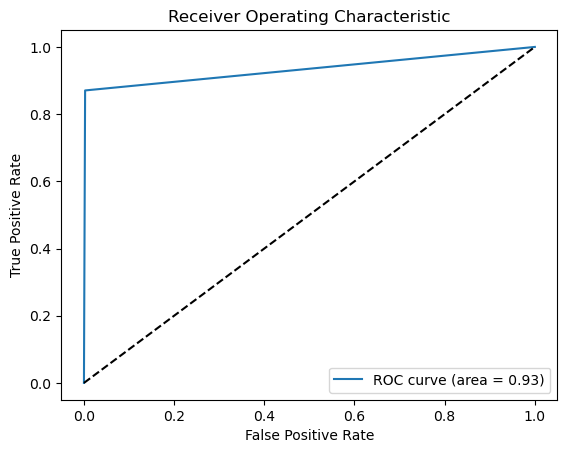

In [97]:
# Evaluating the Decision Tree model using test data

evaluate_model(dt_smt_default, X_test, y_test)

#### Model 1: Decision Tree with default hyperparameters using ADASYN data

In [98]:
# Creating a DecisionTreeClassifier instance with default parameters

dt_ada_default = DecisionTreeClassifier(random_state=42)

In [99]:
# Fitting the Decision Tree model with the ADASYN resampled data

dt_ada_default.fit(X_resampled_ada, y_resampled_ada)

DecisionTreeClassifier(random_state=42)

In [100]:
# Making predictions on the resampled training data using the Decision Tree model

y_train_pred_dt_ada = dt_ada_default.predict(X_resampled_ada)

# Making predictions on the test data using the Decision Tree model

y_test_pred_dt_ada = dt_ada_default.predict(X_test)

In [101]:
# Printing the classification report for predictions on the resampled training data

print(classification_report(y_resampled_ada, y_train_pred_dt_ada))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1290301

    accuracy                           1.00   2580220
   macro avg       1.00      1.00      1.00   2580220
weighted avg       1.00      1.00      1.00   2580220



------------------------------------------------------------


Accuracy: 99.7%
F1 score: 72.3%
Recall: 84.6%
Precision: 63.1%
ROC AUC: 92.2%
Sensitivity: 84.6%
Specificity: 99.7%
False positive rate: 0.3%
Positive predictive value: 63.1%
Negative predictive value: 99.9%


------------------------------------------------------------

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.63      0.85      0.72      2895

    accuracy                           1.00    555719
   macro avg       0.81      0.92      0.86    555719
weighted avg       1.00      1.00      1.00    555719

------------------------------------------------------------


Confusion Matrix:
 [[551391   1433]
 [   447   2448]]


--------------------------------------------------------------------


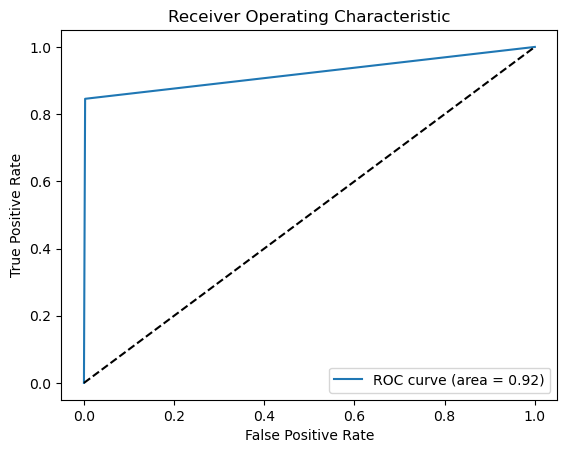

In [102]:
# Evaluating the Decision Tree model using test data

evaluate_model(dt_ada_default, X_test, y_test)

#### Model 1: Decision Tree with hyperparameters tuning using SMOTE data

In [103]:
# Creating a DecisionTreeClassifier instance

dt = DecisionTreeClassifier(random_state=42)

In [104]:
# Defining hyperparameter grid for tuning Decision Tree

params = {
    'max_depth': [10,20],
    'min_samples_leaf': [5,10],
    'min_samples_split': [5,10]
     }

In [105]:
# Creating a GridSearchCV instance for hyperparameter tuning

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           verbose=1,
                            cv=4,
                            n_jobs=-1,
                            scoring="recall")

In [106]:
# Fitting the GridSearchCV object to the resampled data for hyperparameter tuning

grid_search.fit(X_resampled_smt, y_resampled_smt)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [5, 10],
                         'min_samples_split': [5, 10]},
             scoring='recall', verbose=1)

In [107]:
# Storing the results of GridSearchCV cross-validation in a DataFrame

dt_score = pd.DataFrame(grid_search.cv_results_)

# Displaying first few rows

dt_score.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     115.871290      0.378657         1.204428        0.012699   
1      98.255857      0.350871         1.225487        0.073910   
2      97.864885      0.980040         1.228952        0.175517   
3      97.289498      1.063758         1.333282        0.082721   
4     158.688121      1.687349         1.125551        0.067803   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0              10                      5                       5   
1              10                      5                      10   
2              10                     10                       5   
3              10                     10                      10   
4              20                      5                       5   

                                              params  split0_test_score  \
0  {'max_depth': 10, 'min_samples_leaf': 5, 'min_...           0.988877   
1  {'max_depth': 10, 'min_samples_leaf': 5, 'min_...           0.988877   
2  {'max_depth': 10, 'min_samples_leaf': 10, 'min...           0.988849   
3  {'max_depth': 10, 'min_samples_leaf': 10, 'min...           0.988849   
4  {'max_depth': 20, 'min_samples_leaf': 5, 'min_...           0.997532   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.989745           0.990384           0.989764         0.989692   
1           0.989745           0.990384           0.989764         0.989692   
2           0.989689           0.990272           0.989711         0.989630   
3           0.989689           0.990272           0.989711         0.989630   
4           0.998704           0.998815           0.998620         0.998418   

   std_test_score  rank_test_score  
0        0.000536                5  
1        0.000536                5  
2        0.000508                7  
3        0.000508                7  
4        0.000516                1

In [108]:
# Retrieving the best score from the GridSearchCV results

grid_search.best_score_

0.9984177304138449

In [109]:
# Retrieving the best estimator from the GridSearchCV results

dt_best = grid_search.best_estimator_

dt_best

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

In [110]:
# Making predictions on the resampled training data using the best estimator from GridSearchCV

y_train_pred_dt_hp_smt = dt_best.predict(X_resampled_smt)

# Making predictions on the test data using the best estimator from GridSearchCV

y_test_pred_dt_hp_smt = dt_best.predict(X_test)

In [111]:
# Printing the classification report for predictions on the resampled training data using the best estimator from GridSearchCV

print(classification_report(y_resampled_smt, y_train_pred_dt_hp_smt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838



------------------------------------------------------------


Accuracy: 99.5%
F1 score: 64.4%
Recall: 90.9%
Precision: 49.9%
ROC AUC: 96.2%
Sensitivity: 90.9%
Specificity: 99.5%
False positive rate: 0.5%
Positive predictive value: 49.9%
Negative predictive value: 100.0%


------------------------------------------------------------

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.50      0.91      0.64      2895

    accuracy                           0.99    555719
   macro avg       0.75      0.95      0.82    555719
weighted avg       1.00      0.99      1.00    555719

------------------------------------------------------------


Confusion Matrix:
 [[550178   2646]
 [   262   2633]]


--------------------------------------------------------------------


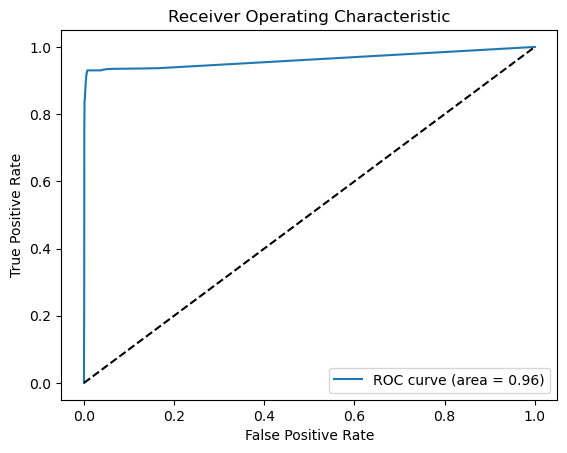

In [112]:
# Evaluating the best estimator from GridSearchCV using the test data

evaluate_model(dt_best,X_test, y_test)

In [113]:
# Retrieving feature importances from best estimator from GridSearchCV

dt_best.feature_importances_

array([6.12381029e-04, 2.45532827e-01, 7.36700965e-04, 6.81639070e-04,
       6.20216038e-04, 2.77775515e-04, 4.55132710e-03, 3.80291235e-03,
       6.53777590e-03, 1.19535648e-03, 4.20696919e-04, 1.58625209e-03,
       7.51405229e-03, 1.19845349e-03, 6.34245514e-01, 7.29157377e-03,
       2.50160903e-02, 1.81667912e-03, 2.66400348e-02, 2.21752799e-03,
       4.08244462e-03, 5.24472679e-03, 1.02128593e-03, 3.81270516e-03,
       4.46240748e-03, 8.77434205e-04, 9.47509518e-04, 3.37820121e-03,
       6.88220505e-04, 8.02239364e-06, 1.48004503e-04, 4.73917208e-05,
       8.33093357e-06, 1.62407655e-04, 8.05431694e-05, 7.04361024e-06,
       5.88444777e-05, 6.43369502e-05, 3.75379006e-04, 1.39128985e-04,
       1.78025652e-04, 1.28517002e-04, 2.18852100e-04, 8.61745143e-05,
       3.48568261e-04, 5.09044207e-06, 7.05090269e-05, 1.00646449e-04,
       1.90115398e-04, 2.52064100e-05, 2.47125483e-04, 3.83592193e-05,
       6.07632389e-05, 9.66482606e-05, 9.52429817e-05])

In [114]:
# Creating a DataFrame to store variable names and their corresponding importances

imp_df = pd.DataFrame({
    "Varname": X_resampled_smt.columns,
    "Imp": dt_best.feature_importances_
})

In [115]:
# Sorting the DataFrame by feature importances in descending order

imp_features= imp_df.sort_values(by="Imp", ascending=False)

# Displaying few rows of dataframe

imp_features.head(15)

Varname       Imp
14  hist_trans_avg_amt_24h  0.634246
1                      amt  0.245533
18        catg_grocery_pos  0.026640
16      catg_gas_transport  0.025016
12          hist_trans_24h  0.007514
15        catg_food_dining  0.007292
8         transaction_hour  0.006538
21          catg_kids_pets  0.005245
6                 city_pop  0.004551
24      catg_personal_care  0.004462
20               catg_home  0.004082
23           catg_misc_pos  0.003813
7                      age  0.003803
27             catg_travel  0.003378
19     catg_health_fitness  0.002218

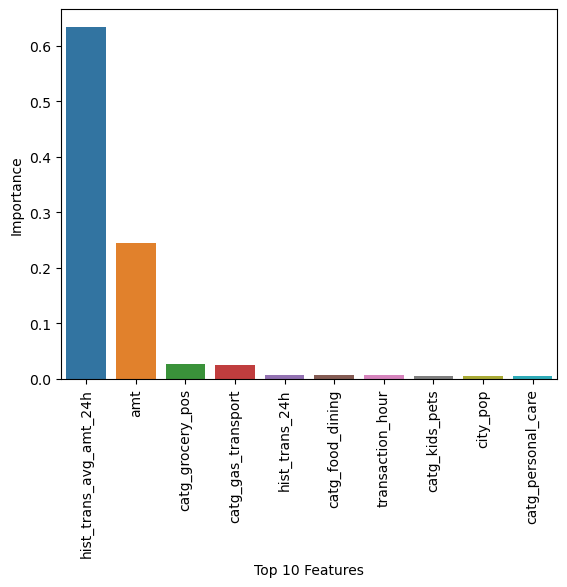

In [116]:
# Creating a bar plot to visualize the top 10 features and their importances

ax = sns.barplot(x='Varname', y= 'Imp', data=imp_features[0:10])
ax.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
plt.xticks(rotation=90)
plt.show()

<pre>
Observation:

"hist_trans_avg_amt_24h" stands out as the most influential feature, significantly impacting the model's predictions. Additionally, "amt", and "catg_grocery_pos" are noteworthy, although less so. Other features have lower importance scores, indicating their minimal impact on the model's decisions.
</pre>

#### Model 2 : Random Forest with default hyperparameters using SMOTE data

In [117]:
# Creating a RandomForestClassifier instance with default hyperparameters

rf_smt_default = RandomForestClassifier(random_state=42, oob_score=True)

In [118]:
# Fitting the Random Forest model with the SMOTE resampled data

rf_smt_default.fit(X_resampled_smt, y_resampled_smt)

RandomForestClassifier(oob_score=True, random_state=42)

In [119]:
# Retrieving the out-of-bag score from the Random Forest model

rf_smt_default.oob_score_

0.9996092777918614

In [120]:
# Making predictions on the resampled training data using the Random Forest model

y_train_pred_rf_smt = rf_smt_default.predict(X_resampled_smt)

# Making predictions on the resampled test data using the Random Forest model

y_test_pred_rf_smt = rf_smt_default.predict(X_test)

In [121]:
# Printing the classification report for predictions on the resampled training data using the Random Forest model

print(classification_report(y_resampled_smt, y_train_pred_rf_smt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838



------------------------------------------------------------


Accuracy: 99.9%
F1 score: 87.8%
Recall: 85.7%
Precision: 90.1%
ROC AUC: 99.5%
Sensitivity: 85.7%
Specificity: 100.0%
False positive rate: 0.0%
Positive predictive value: 90.1%
Negative predictive value: 99.9%


------------------------------------------------------------

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.90      0.86      0.88      2895

    accuracy                           1.00    555719
   macro avg       0.95      0.93      0.94    555719
weighted avg       1.00      1.00      1.00    555719

------------------------------------------------------------


Confusion Matrix:
 [[552550    274]
 [   413   2482]]


--------------------------------------------------------------------


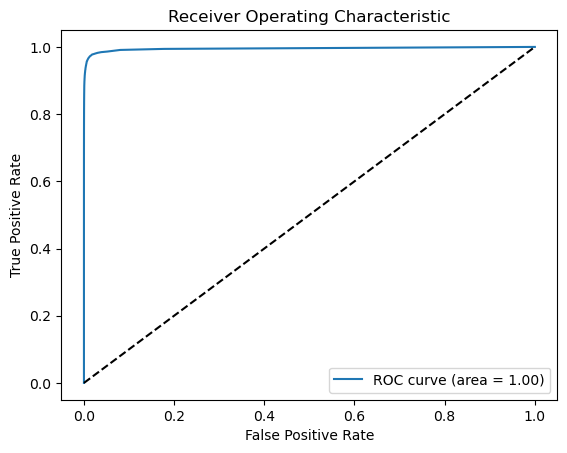

In [122]:
# Evaluating the Random Forest model using the test data

evaluate_model(rf_smt_default, X_test, y_test)

#### Model 2 : Random Forest with default hyperparameters using ADASYN data

In [123]:
# Creating a Random Forest Classifier instance with default hyperparamters

rf_ada_default = RandomForestClassifier(random_state=42, oob_score=True)

In [124]:
# Fitting the Random Forest Classifier model with the ADASYN resampled data

rf_ada_default.fit(X_resampled_ada, y_resampled_ada)

RandomForestClassifier(oob_score=True, random_state=42)

In [125]:
# Retrieving the out-of-bag score from the Random Forest model

rf_ada_default.oob_score_

0.9996527427893745

In [126]:
# Making predictions on the resampled training data using the Random Forest model

y_train_pred_rf_ada = rf_ada_default.predict(X_resampled_ada)

# Making predictions on the resampled test data using the Random Forest model

y_test_pred_rf_ada = rf_ada_default.predict(X_test)

In [127]:
# Printing the classification report for predictions on the resampled training data

print(classification_report(y_resampled_ada, y_train_pred_rf_ada))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1290301

    accuracy                           1.00   2580220
   macro avg       1.00      1.00      1.00   2580220
weighted avg       1.00      1.00      1.00   2580220



------------------------------------------------------------


Accuracy: 99.9%
F1 score: 88.1%
Recall: 85.1%
Precision: 91.3%
ROC AUC: 99.5%
Sensitivity: 85.1%
Specificity: 100.0%
False positive rate: 0.0%
Positive predictive value: 91.3%
Negative predictive value: 99.9%


------------------------------------------------------------

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.91      0.85      0.88      2895

    accuracy                           1.00    555719
   macro avg       0.96      0.93      0.94    555719
weighted avg       1.00      1.00      1.00    555719

------------------------------------------------------------


Confusion Matrix:
 [[552590    234]
 [   432   2463]]


--------------------------------------------------------------------


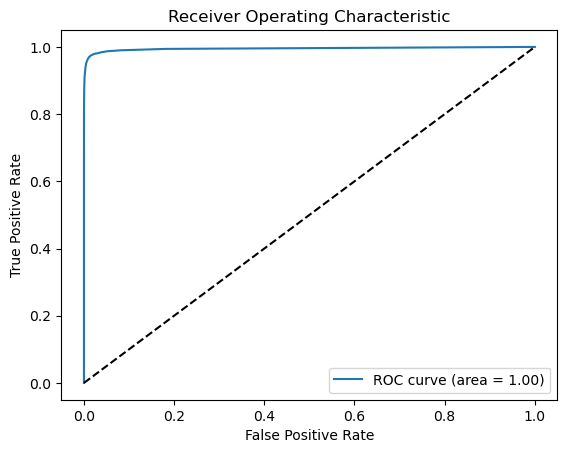

In [128]:
# Evaluating the Random Forest model using test data

evaluate_model(rf_ada_default, X_test, y_test)

#### Model 2 : Random Forest with hyperparameters tuning using SMOTE data

In [129]:
# Creating a Random Forest instance with hyperparameters tunning

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [130]:
# Defining hyperparameter grid for tuning Random Forest 

params = {
    'max_depth': [10,20],
    'min_samples_leaf': [5,10],
    'n_estimators': [50,100],
    'min_samples_split': [5,10]
     }

In [135]:
# Creating a RandomizedSearchCV instance for hyperparameter tuning

Randomized_search = RandomizedSearchCV(estimator=rf,
                           param_distributions=params,
                           verbose=1,
                            cv=4,
                            return_train_score=True,
                            n_jobs=-1,
                            n_iter=50,
                            scoring="recall")

In [136]:
# Fitting the RandomizedSearchCV object to the resampled data for hyperparameter tuning 

Randomized_search.fit(X_resampled_smt, y_resampled_smt)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


RandomizedSearchCV(cv=4,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20],
                                        'min_samples_leaf': [5, 10],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [50, 100]},
                   return_train_score=True, scoring='recall', verbose=1)

In [137]:
# Storing the results of RandomizedSearchCV cross-validation in a DataFrame

rf_score = pd.DataFrame(Randomized_search.cv_results_)

# Displaying first few rows of data

rf_score.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     714.029535      2.108721         5.644644        0.398135   
1    1307.070327      4.255298        13.747572        2.190294   
2     727.501037      2.464334         7.849528        1.749127   
3    1443.747016      2.729730        12.166895        3.072632   
4     706.252615      0.734699         6.767790        1.785735   

  param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                 50                       5                      5   
1                100                       5                      5   
2                 50                      10                      5   
3                100                      10                      5   
4                 50                       5                     10   

  param_max_depth                                             params  \
0              10  {'n_estimators': 50, 'min_samples_split': 5, '...   
1              10  {'n_estimators': 100, 'min_samples_split': 5, ...   
2              10  {'n_estimators': 50, 'min_samples_split': 10, ...   
3              10  {'n_estimators': 100, 'min_samples_split': 10,...   
4              10  {'n_estimators': 50, 'min_samples_split': 5, '...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.976495           0.976675           0.977493           0.974833   
1           0.973691           0.974495           0.975425           0.974743   
2           0.976495           0.976675           0.977493           0.974833   
3           0.973691           0.974495           0.975425           0.974743   
4           0.973422           0.977720           0.979248           0.974101   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.976374        0.000966                9            0.977253   
1         0.974588        0.000620               13            0.974598   
2         0.976374        0.000966                9            0.977253   
3         0.974588        0.000620               13            0.974598   
4         0.976123        0.002434               11            0.974199   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.977238            0.977460            0.974447   
1            0.975056            0.975399            0.974445   
2            0.977238            0.977460            0.974447   
3            0.975056            0.975399            0.974445   
4            0.978535            0.979095            0.973956   

   mean_train_score  std_train_score  
0          0.976600         0.001246  
1          0.974874         0.000377  
2          0.976600         0.001246  
3          0.974874         0.000377  
4          0.976446         0.002379

In [138]:
# Retrieving the best score from the RandomizedSearchCV results

Randomized_search.best_score_

0.9996712973197944

In [139]:
# Retrieving the best estimator from the RandomizedSearchCV results

rf_best = Randomized_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=50, n_jobs=-1, random_state=42)

In [140]:
# Making predictions on the resampled training data using the best estimator from RandomizedSearchCV

y_train_pred_rf_hp_smt = rf_best.predict(X_resampled_smt)

# Making predictions on the test data using the best estimator from RandomizedSearchCV

y_test_pred_rf_hp_smt = rf_best.predict(X_test)

In [141]:
# Printing the classification report for predictions on the resampled training data using the best estimator from RandomizedSearchCV

print(classification_report(y_resampled_smt, y_train_pred_rf_hp_smt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838



------------------------------------------------------------


Accuracy: 99.6%
F1 score: 72.8%
Recall: 90.3%
Precision: 60.9%
ROC AUC: 99.4%
Sensitivity: 90.3%
Specificity: 99.7%
False positive rate: 0.3%
Positive predictive value: 60.9%
Negative predictive value: 99.9%


------------------------------------------------------------

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.61      0.90      0.73      2895

    accuracy                           1.00    555719
   macro avg       0.80      0.95      0.86    555719
weighted avg       1.00      1.00      1.00    555719

------------------------------------------------------------


Confusion Matrix:
 [[551148   1676]
 [   281   2614]]


--------------------------------------------------------------------


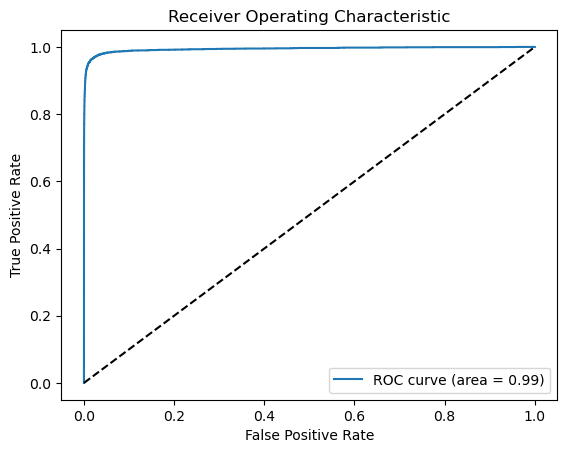

In [142]:
# Evaluating the best estimator from RandomizedSearchCV using the test data

evaluate_model(rf_best, X_test, y_test)

In [143]:
# Retrieving feature importances from the best estimator of the RandomizedSearchCV

rf_best.feature_importances_

array([0.002665  , 0.29092086, 0.0039304 , 0.00326825, 0.00335304,
       0.00358007, 0.00679749, 0.00533212, 0.02755198, 0.01752141,
       0.00187581, 0.02596571, 0.0309561 , 0.06105467, 0.34939628,
       0.00320474, 0.02350383, 0.00429104, 0.02914826, 0.00136276,
       0.00146337, 0.00283554, 0.01024732, 0.00331847, 0.00402416,
       0.01252686, 0.00339881, 0.00349962, 0.00962557, 0.00197231,
       0.00228937, 0.00348829, 0.00076186, 0.00190518, 0.00104326,
       0.00255707, 0.0022215 , 0.00264775, 0.00458141, 0.00289982,
       0.00653294, 0.0021652 , 0.0031577 , 0.00213118, 0.00174482,
       0.00070624, 0.00169414, 0.000969  , 0.00088649, 0.00137834,
       0.00099992, 0.00132659, 0.00065049, 0.00087172, 0.00179786])

In [144]:
# Creating a DataFrame to store variable names and their corresponding importances

imp_df = pd.DataFrame({
    "Varname": X_resampled_smt.columns,
    "Imp": rf_best.feature_importances_
})

In [145]:
# Sorting the DataFrame by feature importances in descending order

imp_features= imp_df.sort_values(by="Imp", ascending=False)

# Displaying first 10 rows of dataframe

imp_features.head(10)

Varname       Imp
14       hist_trans_avg_amt_24h  0.349396
1                           amt  0.290921
13       hist_trans_avg_amt_30d  0.061055
12               hist_trans_24h  0.030956
18             catg_grocery_pos  0.029148
8              transaction_hour  0.027552
11               hist_trans_30d  0.025966
16           catg_gas_transport  0.023504
9   time_since_prev_transaction  0.017521
25            catg_shopping_net  0.012527

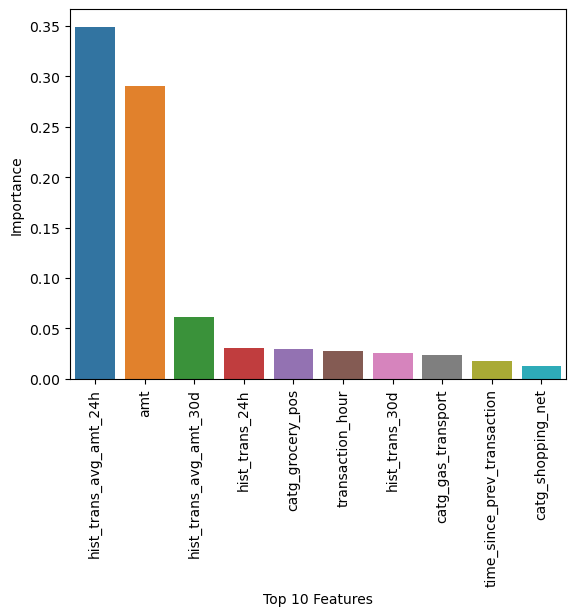

In [146]:
# Creating a bar plot to visualize the top 10 features and their importances

ax = sns.barplot(x='Varname', y= 'Imp', data=imp_features[0:10])
ax.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
plt.xticks(rotation=90)
plt.show()

<pre>
Observation:
    
"hist_trans_avg_amt_24h" stands out as the most influential feature, significantly impacting the model's predictions. Additionally, "amt", "hist_trans_avg_amt_30d" are noteworthy, although less so. Other features have lower importance scores, indicating their minimal impact on the model's decisions.
</pre>

#### Model 3 : Xgboost with default hyperparameters using SMOTE data

In [147]:
# Creating an XGBClassifier instance with default settings

xgb_default_smt = XGBClassifier(random_state=42)

In [148]:
# Fitting the XGBoost model with the SMOTE resampled data

xgb_default_smt.fit(X_resampled_smt, y_resampled_smt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [149]:
# Making predictions on the resampled training data using the XGboost model

y_train_pred_xgb = xgb_default_smt.predict(X_resampled_smt)

# Making predictions on the resampled test data using the XGboost model

y_test_pred_xgb = xgb_default_smt.predict(X_test)

In [150]:
# Printing the classification report for predictions on the resampled training data using the XGBoost model

print(classification_report(y_resampled_smt, y_train_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838



------------------------------------------------------------


Accuracy: 99.9%
F1 score: 92.1%
Recall: 92.0%
Precision: 92.2%
ROC AUC: 99.9%
Sensitivity: 92.0%
Specificity: 100.0%
False positive rate: 0.0%
Positive predictive value: 92.2%
Negative predictive value: 100.0%


------------------------------------------------------------

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.92      0.92      0.92      2895

    accuracy                           1.00    555719
   macro avg       0.96      0.96      0.96    555719
weighted avg       1.00      1.00      1.00    555719

------------------------------------------------------------


Confusion Matrix:
 [[552600    224]
 [   231   2664]]


--------------------------------------------------------------------


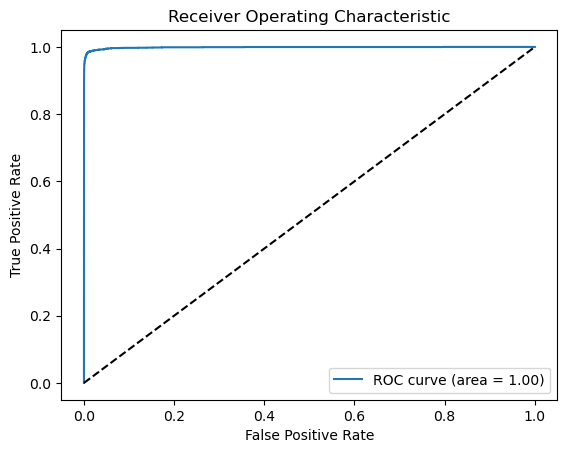

In [151]:
# Evaluating the XGBoost model using the test data

evaluate_model(xgb_default_smt, X_test, y_test)

#### Model 3 : Xgboost with default hyperparameters using ADASYN data

In [152]:
# Creating a XGBClassifier instance with default hyperparameters

xgb_default_ada = XGBClassifier(random_state = 42)

In [153]:
# Fitting the XGBoost model with the ADASYN resampled data

xgb_default_ada.fit(X_resampled_ada, y_resampled_ada)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [154]:
# Making predictions on the resampled training data using the XGBoost model

y_train_pred_xgb = xgb_default_ada.predict(X_resampled_ada)

# Making predictions on the resampled test data using the XGBoost model

y_test_pred_xgb = xgb_default_ada.predict(X_test)

In [155]:
# Printing the classification report for predictions on the resampled training data

print(classification_report(y_resampled_ada, y_train_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1290301

    accuracy                           1.00   2580220
   macro avg       1.00      1.00      1.00   2580220
weighted avg       1.00      1.00      1.00   2580220



------------------------------------------------------------


Accuracy: 99.9%
F1 score: 91.6%
Recall: 92.2%
Precision: 91.0%
ROC AUC: 99.8%
Sensitivity: 92.2%
Specificity: 100.0%
False positive rate: 0.0%
Positive predictive value: 91.0%
Negative predictive value: 100.0%


------------------------------------------------------------

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.91      0.92      0.92      2895

    accuracy                           1.00    555719
   macro avg       0.95      0.96      0.96    555719
weighted avg       1.00      1.00      1.00    555719

------------------------------------------------------------


Confusion Matrix:
 [[552561    263]
 [   225   2670]]


--------------------------------------------------------------------


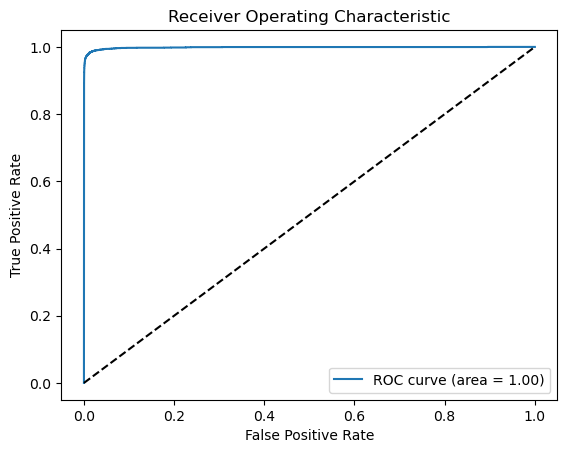

In [156]:
# Evaluating the XGBoost model using test data

evaluate_model(xgb_default_ada, X_test, y_test)

#### Model 2 : XGBoost with hyperparameters tuning using SMOTE data

In [157]:
# Defining the number of folds for cross-validation

folds = 3

# specify range of hyperparameters

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9],
             'max_depth':[10, 20],
             'n_estimators':[50, 100]}


# specify model

xgb_model = XGBClassifier(objective='binary:logistic', random_state=100)

# set up GridSearchCV()

model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'recall',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

In [158]:
# Fitting the GridSearchCV object to the resampled data for hyperparameter tuning

model_cv.fit(X_resampled_smt, y_resampled_smt)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=100, ...),
             param_grid={'learning_rate': [0.2, 0.6], 'max_depth': [10, 20],
                         'n_estimators': [50, 100],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='recall', verbose=1)

In [159]:
# Storing the cross-validation results in a DataFrame

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       31.084012      1.558833         5.308111        0.055951   
1       29.932368      0.413696         5.779522        0.782456   
2       31.244449      3.707554         5.289574        0.330787   
3       49.214376      3.199097         6.857733        0.538271   
4       48.312033      3.085806         6.376099        0.355200   
5       43.616367      0.850215         6.044159        0.243110   
6       31.121248      0.113169         5.433959        0.009971   
7       32.436884      0.822930         5.555355        0.092281   
8       32.428453      0.599574         5.786290        0.222400   
9       47.250023      1.031284         6.593838        0.015213   
10      51.706163      2.347248         6.668700        0.080277   
11      50.140459      3.302740         6.684668        0.182426   
12      27.836990      0.628022         4.884494        0.004282   
13      27.534633      0.246896         4.852004        0.010103   
14      27.569913      0.304508         4.843733        0.004398   
15      40.607429      0.373182         5.855102        0.286523   
16      40.157558      0.392553         5.696599        0.058416   
17      39.657525      1.186973         5.637946        0.012489   
18      29.676028      0.601040         5.137927        0.019670   
19      30.283506      0.053390         5.203018        0.023958   
20      29.226116      0.468327         5.164219        0.043646   
21      42.079281      1.049462         5.917029        0.055304   
22      42.266350      2.063526         6.004818        0.145755   
23      41.803559      2.227931         6.361514        0.665122   

   param_learning_rate param_max_depth param_n_estimators param_subsample  \
0                  0.2              10                 50             0.3   
1                  0.2              10                 50             0.6   
2                  0.2              10                 50             0.9   
3                  0.2              10                100             0.3   
4                  0.2              10                100             0.6   
5                  0.2              10                100             0.9   
6                  0.2              20                 50             0.3   
7                  0.2              20                 50             0.6   
8                  0.2              20                 50             0.9   
9                  0.2              20                100             0.3   
10                 0.2              20                100             0.6   
11                 0.2              20                100             0.9   
12                 0.6              10                 50             0.3   
13                 0.6              10                 50             0.6   
14                 0.6              10                 50             0.9   
15                 0.6              10                100             0.3   
16                 0.6              10                100             0.6   
17                 0.6              10                100             0.9   
18                 0.6              20                 50             0.3   
19                 0.6              20                 50             0.6   
20                 0.6              20                 50             0.9   
21                 0.6              20                100             0.3   
22                 0.6              20                100             0.6   
23                 0.6              20                100             0.9   

                                               params  split0_test_score  \
0   {'learning_rate': 0.2, 'max_depth': 10, 'n_est...           0.999163   
1   {'learning_rate': 0.2, 'max_depth': 10, 'n_est...           0.999158   
2   {'learning_rate': 0.2, 'max_depth': 10, 'n_est...           0.999226   
3   {'learning_rate': 0.2, 'max_depth': 10, 'n_est...           0.998937 

In [160]:
# Retrieving the best score from the cross-validation results

model_cv.best_score_

0.9997883588039249

In [161]:
# Defining parameters for XGBoostClassifier

params = {'learning_rate': 0.2,
          'max_depth': 20,
          'n_estimators':50,
          'subsample':0.6,
         'objective':'binary:logistic'}

# Creating an XGBoostClassifier instance with specified parameters

xgboost_best = XGBClassifier(params = params)

# Fitting the model on the resampled training data

xgboost_best.fit(X_resampled_smt, y_resampled_smt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 50,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

In [162]:
# Making predictions on the resampled training data using the best XGBoost model

y_train_pred_xgb_hp = xgboost_best.predict(X_resampled_smt)

# Making predictions on the resampled test data using the best XGBoost model

y_test_pred_xgb_hp = xgboost_best.predict(X_test)

In [163]:
# Printing the classification report for predictions on the resampled training data using XGBoost model

print(classification_report(y_resampled_smt, y_train_pred_xgb_hp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838



------------------------------------------------------------


Accuracy: 99.9%
F1 score: 92.1%
Recall: 92.0%
Precision: 92.2%
ROC AUC: 99.9%
Sensitivity: 92.0%
Specificity: 100.0%
False positive rate: 0.0%
Positive predictive value: 92.2%
Negative predictive value: 100.0%


------------------------------------------------------------

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.92      0.92      0.92      2895

    accuracy                           1.00    555719
   macro avg       0.96      0.96      0.96    555719
weighted avg       1.00      1.00      1.00    555719

------------------------------------------------------------


Confusion Matrix:
 [[552600    224]
 [   231   2664]]


--------------------------------------------------------------------


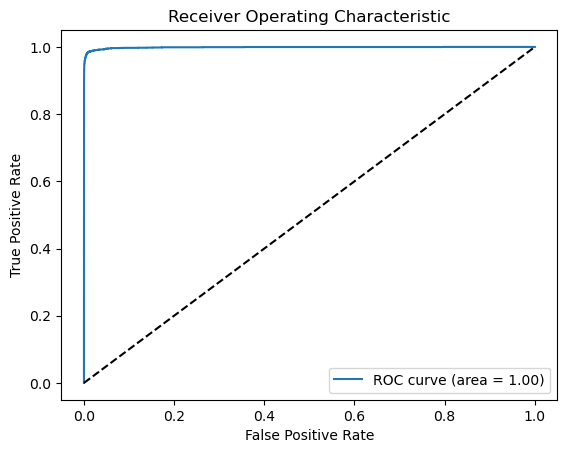

In [164]:
# Evaluating the XGBoost model using test data

evaluate_model(xgboost_best, X_test, y_test)

In [165]:
# Retrieving feature importances from the best estimator of the XGBoost model

xgboost_best.feature_importances_

array([0.00066647, 0.10162459, 0.00395343, 0.00152916, 0.00240841,
       0.00126715, 0.00301937, 0.00356893, 0.00971412, 0.00817723,
       0.0014168 , 0.00357888, 0.01603208, 0.00312621, 0.45153245,
       0.03014725, 0.06569874, 0.01327434, 0.04453701, 0.01231609,
       0.00959019, 0.01711609, 0.00737832, 0.01442831, 0.02398844,
       0.00584535, 0.00689723, 0.01173958, 0.0053175 , 0.00382486,
       0.00256231, 0.00381946, 0.00133177, 0.00464004, 0.00313141,
       0.00541454, 0.00512999, 0.00647866, 0.01012364, 0.00804451,
       0.01780654, 0.01065539, 0.00758828, 0.00332676, 0.00460885,
       0.00059627, 0.0015168 , 0.00379849, 0.00111911, 0.00314637,
       0.00570104, 0.00189426, 0.00151072, 0.00071297, 0.00162732],
      dtype=float32)

In [166]:
# Creating a DataFrame to store variable names and their corresponding importances

imp_df = pd.DataFrame({
    "Varname": X_resampled_smt.columns,
    "Imp": xgboost_best.feature_importances_
})

In [167]:
# Sorting the DataFrame by feature importances in descending order

imp_features_xgboost= imp_df.sort_values(by="Imp", ascending=False)

# Displaying first 15 rows of dataframe

imp_features_xgboost.head(15)

Varname       Imp
14  hist_trans_avg_amt_24h  0.451532
1                      amt  0.101625
16      catg_gas_transport  0.065699
18        catg_grocery_pos  0.044537
15        catg_food_dining  0.030147
24      catg_personal_care  0.023988
40            day_Thursday  0.017807
21          catg_kids_pets  0.017116
12          hist_trans_24h  0.016032
23           catg_misc_pos  0.014428
17        catg_grocery_net  0.013274
19     catg_health_fitness  0.012316
27             catg_travel  0.011740
41             day_Tuesday  0.010655
38            day_Saturday  0.010124

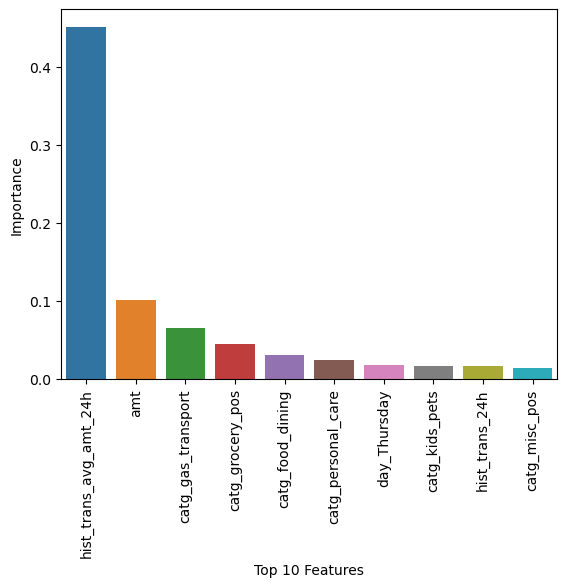

In [168]:
# Creating a bar plot to visualize the top 10 features and their importances

ax = sns.barplot(x='Varname', y= 'Imp', data=imp_features_xgboost[0:10])
ax.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
plt.xticks(rotation=90)
plt.show()

<pre>
Observation:
    
"hist_trans_avg_amt_24h" stands out as the most influential feature, significantly impacting the model's predictions. Additionally, "amt", "catg_gas_transport" are noteworthy, although less so. Other features have lower importance scores, indicating their minimal impact on the model's decisions.
</pre>

In [169]:
# chosen hyperparameters for XGBoostClassifier

# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 20,
          'n_estimators':50,
          'subsample':0.6,
         'objective':'binary:logistic'}

# Creating an XGBoostClassifier instance with chosen hyperparameters

xgboost_best = XGBClassifier(params = params)

# Fitting the model on the training data

xgboost_best.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 50,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

In [170]:
# Making predictions on the training data using the best XGBoost model

pred_train = xgboost_best.predict(X_train)

# Printing the confusion matrix

print('\n Confussion Matrix:\n', confusion_matrix(y_train, pred_train))

# Printing the classification report

print(classification_report(y_train, pred_train))


 Confussion Matrix:
 [[1289907      12]
 [     85    6671]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      0.99      0.99      6756

    accuracy                           1.00   1296675
   macro avg       1.00      0.99      1.00   1296675
weighted avg       1.00      1.00      1.00   1296675



#### Final Conclusion on basis of Best Model (XGBOOST (Hyperparameter Tuning) for SMOTE data)

In [171]:
# Displaying first 15 rows of dataframe

imp_features_xgboost.head(15)

Varname       Imp
14  hist_trans_avg_amt_24h  0.451532
1                      amt  0.101625
16      catg_gas_transport  0.065699
18        catg_grocery_pos  0.044537
15        catg_food_dining  0.030147
24      catg_personal_care  0.023988
40            day_Thursday  0.017807
21          catg_kids_pets  0.017116
12          hist_trans_24h  0.016032
23           catg_misc_pos  0.014428
17        catg_grocery_net  0.013274
19     catg_health_fitness  0.012316
27             catg_travel  0.011740
41             day_Tuesday  0.010655
38            day_Saturday  0.010124

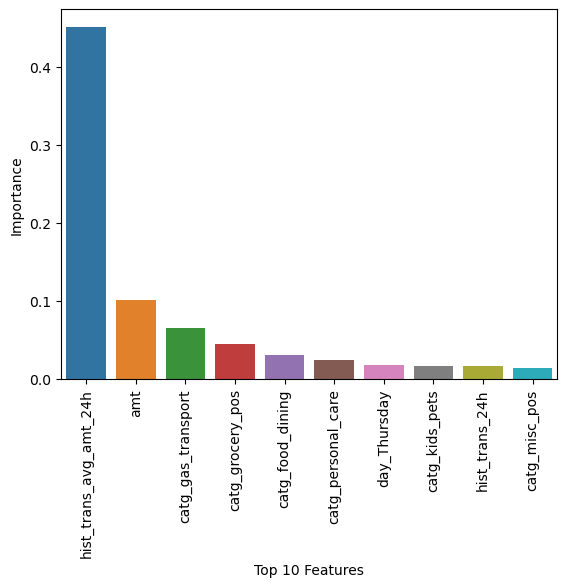

In [172]:
# Creating a bar plot to visualize the top 10 features and their importancesM

ax = sns.barplot(x='Varname', y= 'Imp', data=imp_features_xgboost[0:10])
ax.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
plt.xticks(rotation=90)
plt.show()

<pre>
Observation:
    
"hist_trans_avg_amt_24h" stands out as the most influential feature, significantly impacting the model's predictions. Additionally, "amt", "catg_gas_transport" are noteworthy, although less so. Other features have lower importance scores, indicating their minimal impact on the model's decisions.
</pre>

### Step 8: Cost Benefit Analysis after building the model

In [173]:
# Calculating confusion matrix for XGBoostClassifier predictions on train data

train_confusion_xgb_hp= confusion_matrix(y_train, pred_train)

# Extracting true negatives, true positives, false positives, and false negatives

train_TN = train_confusion_xgb_hp[0,0] # true negatives 
train_TP = train_confusion_xgb_hp[1,1] # true positives
train_FP = train_confusion_xgb_hp[0,1] # false positives
train_FN = train_confusion_xgb_hp[1,0] # false negatives

# Printing the metrics for train data

print('The metrics for train data')
print('\nTrue_Negatives:', train_TN)
print('True_Positives:', train_TP)
print('False_Positives:', train_FP)
print('False_Negatives:', train_FN)

print('\n')
print('*'*20)

# Calculating confusion matrix for XGBoostClassifier predictions on test data

test_confusion_xgb_hp = confusion_matrix(y_test, y_test_pred_xgb_hp)

# Extracting true negatives, true positives, false positives, and false negatives

test_TN = test_confusion_xgb_hp[0,0] # true negatives 
test_TP = test_confusion_xgb_hp[1,1] # true positives
test_FP = test_confusion_xgb_hp[0,1] # false positives
test_FN = test_confusion_xgb_hp[1,0] # false negatives

# Printing the metrics for test data

print('\nThe metrics for test data')
print('\nTrue_Negatives:', test_TN)
print('True_Positives:', test_TP)
print('False_Positives:', test_FP)
print('False_Negatives:', test_FN)

The metrics for train data

True_Negatives: 1289907
True_Positives: 6671
False_Positives: 12
False_Negatives: 85


********************

The metrics for test data

True_Negatives: 552600
True_Positives: 2664
False_Positives: 224
False_Negatives: 231


In [182]:
# Average number of transactions per month detected as fraudulent by the model (TF)= TP+FP/24

TF = round((train_TP + test_TP + train_FP + test_FP)/df1.shape[0])
TF

399

In [183]:
# Total cost of providing customer support per month for fraudulent transactions detected by the model(TF*$1.5)

cost_customer_support = round(TF * 1.5)
cost_customer_support

598

In [185]:
# Average number of transactions per month that are fraudulent but not detected by the model (FN)

FN = round((train_FN + test_FN)/df1.shape[0])
FN

13

In [186]:
# Cost incurred due to fraudulent transactions left undetected by the model (FN*c). 
C = 530.661412288881

cost_fraud_trans = round(FN * C)
cost_fraud_trans

6899

In [187]:
# Cost incurred per month before the model was deployed (b*c)

cost_incurred_before = round(avg_num_of_fraud_trans_per_month * avg_amt_per_fraud_trans)
cost_incurred_before

213392

In [188]:
# Cost incurred per month after the model is built and deployed (4+6) 

cost_incurred_after = round(cost_customer_support + cost_fraud_trans)
cost_incurred_after

7497

In [189]:
# Final savings = Cost incurred before - Cost incurred after(1-7)	204161.28

final_savings = round(cost_incurred_before - cost_incurred_after)
final_savings

205895

In [190]:
# Creating report-like view

report_view = """
Fraud Detection Report (Cost Benefit Analysis after builing model)
--------------------------------------------------------------------

Metrics:

- Average number of transactions per month detected as fraudulent by the model (TF): {:.2f}
- Total cost of providing customer support per month for fraudulent transactions detected by the model: ${:.2f}
- Average number of transactions per month that are fraudulent but not detected by the model (FN): {:.2f}
- Cost incurred due to fraudulent transactions left undetected by the model: ${:.2f}
- Cost incurred per month before the model was deployed: ${:.2f}
- Cost incurred per month after the model is built and deployed: ${:.2f}
- Final savings: ${:.2f}
""".format(TF, cost_customer_support, FN, cost_fraud_trans, cost_incurred_before, cost_incurred_after, final_savings)

# Print report
print(report_view)


Fraud Detection Report (Cost Benefit Analysis after builing model)
--------------------------------------------------------------------

Metrics:

- Average number of transactions per month detected as fraudulent by the model (TF): 399.00
- Total cost of providing customer support per month for fraudulent transactions detected by the model: $598.00
- Average number of transactions per month that are fraudulent but not detected by the model (FN): 13.00
- Cost incurred due to fraudulent transactions left undetected by the model: $6899.00
- Cost incurred per month before the model was deployed: $213392.00
- Cost incurred per month after the model is built and deployed: $7497.00
- Final savings: $205895.00

